### Environment Setup

In [1]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

### Parameters Setup

In [2]:
# Date range
start = '2013-01-01'
end = '2024-09-30'

benchmark_symbol = 'SPY'

# Tickers of assets
stocks_1 = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
industry_1 =  ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health Care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']
stocks_2 = [
            'AMAT', 'AMD','AVGO',  
            'BAC','BKR','BMY','BSX',
            'C','CMCSA',
            'CSCO','CSX','CVS','CVX',
            'DIS','DVN',
            'FCX','FNF','GEN','GILD',
            'GM','HAL','HPQ','INTC',
            'IPG','JNJ','KDP',
            'KKR','KMI','KO',
            'MDLZ','MO','MRK','MRO',
            'MRVL','MSFT','MU','NEM',
]

industry_2 = [
        'Technology','Technology','Technology',
        'Financial Services','Energy','Healthcare','Healthcare',
        'Financial Services','Communication Services',
        'Technology','Industrials','Healthcare','Energy',
        'Communication Services','Energy',
        'Basic Materials','Financial Services','Technology','Healthcare',
        'Consumer Cyclical','Energy','Technology','Technology',
        'Communication Services','Healthcare','Consumer Defensive',
        'Financial Services','Energy','Consumer Defensive',
        'Consumer Defensive','Consumer Defensive','Healthcare','Energy',
        'Technology','Technology','Technology','Basic Materials',
]

ETF_BOND = ['HYG','LQD','TLT',
           ]
industry_BOND = ['Bond','Bond','Bond',
                ]

ETF_COMM = [
    'DBA','GLD','SLV','XLE','XME','XOP',
]

industry_COMM=[
    'Commodity','Commodity','Commodity','Commodity','Commodity','Commodity',
]

ETF_list = ['HYG','LQD','TLT',
           'DBA',
           'GLD','SLV','XLE','XME','XOP','XBI','EFA',
            'EWW','EWZ','VNQ','XHB',
            'IWM','QQQ']
industry_etf =  ['Bond','Bond','Bond',
               'Commodity',
               'Commodity','Commodity','Commodity','Commodity','Commodity',
               'Healthcare',
               'International','International','International',
               'Real Estate','Real Estate',
               'US Major','US Major',
               ]

assets = stocks_2 + ETF_BOND + [benchmark_symbol]

asset_classes_dict = {'Assets': stocks_2 + ETF_BOND, 
                 'Industry': industry_2+industry_BOND}


assets.sort()

### Download Data
Full data download from yfinance to **prices** dataframe

In [3]:
# Downloading data
prices = yf.download(assets, start=start, end=end)
prices = prices.dropna()

[*********************100%***********************]  41 of 41 completed


In [4]:
display(prices)

Price                       Adj Close                                     \
Ticker                           AMAT         AMD        AVGO        BAC   
Date                                                                       
2013-01-02 00:00:00+00:00    9.993253    2.530000    2.395675   9.721240   
2013-01-03 00:00:00+00:00    9.967930    2.490000    2.408191   9.664674   
2013-01-04 00:00:00+00:00    9.967930    2.590000    2.392731   9.785886   
2013-01-07 00:00:00+00:00    9.849769    2.670000    2.379479   9.769724   
2013-01-08 00:00:00+00:00    9.714725    2.670000    2.363281   9.680836   
...                               ...         ...         ...        ...   
2024-09-23 00:00:00+00:00  194.039993  156.750000  172.940002  39.869999   
2024-09-24 00:00:00+00:00  196.779999  158.320007  174.839996  39.450001   
2024-09-25 00:00:00+00:00  197.309998  162.020004  175.520004  39.250000   
2024-09-26 00:00:00+00:00  209.610001  167.490005  178.089996  39.520000   
2024-09-27 00:00:00+00:00  204.919998  164.350006  172.690002  39.400002   

Price                                                                  \
Ticker                           BKR        BMY        BSX          C   
Date                                                                    
2013-01-02 00:00:00+00:00  22.552687  22.751957   5.890000  31.802662   
2013-01-03 00:00:00+00:00  22.777508  23.120605   5.950000  31.910591   
2013-01-04 00:00:00+00:00  23.302120  23.197111   5.920000  32.712418   
2013-01-07 00:00:00+00:00  23.023754  23.231895   5.980000  32.743252   
2013-01-08 00:00:00+00:00  22.675800  23.294497   6.120000  32.735542   
...                              ...        ...        ...        ...   
2024-09-23 00:00:00+00:00  36.450001  49.456383  84.000000  62.580002   
2024-09-24 00:00:00+00:00  36.340000  50.376087  83.510002  61.369999   
2024-09-25 00:00:00+00:00  36.049999  49.397049  83.500000  60.380001   
2024-09-26 00:00:00+00:00  34.770000  49.565163  83.080002  61.709999   
2024-09-27 00:00:00+00:00  36.180000  50.346420  83.349998  61.869999   

Price                                            ...    Volume            \
Ticker                         CMCSA       CSCO  ...      MDLZ        MO   
Date                                             ...                       
2013-01-02 00:00:00+00:00  15.049651  14.095158  ...  17862400  13536600   
2013-01-03 00:00:00+00:00  14.881654  14.171382  ...   9075500  11243400   
2013-01-04 00:00:00+00:00  14.873840  14.192174  ...   7696000   7117400   
2013-01-07 00:00:00+00:00  14.807420  14.060510  ...   7576200   7399000   
2013-01-08 00:00:00+00:00  14.909009  14.074371  ...  14360800   8112400   
...                              ...        ...  ...       ...       ...   
2024-09-23 00:00:00+00:00  40.427212  51.794170  ...   5274000  10945000   
2024-09-24 00:00:00+00:00  41.042599  52.121670  ...   8149600   7712700   
2024-09-25 00:00:00+00:00  40.288250  52.250683  ...   4949700   7148000   
2024-09-26 00:00:00+00:00  40.715054  52.449162  ...   3961500   6264500   
2024-09-27 00:00:00+00:00  41.330444  52.617874  ...   4697000   4602400   

Price                                                                        \
Ticker                          MRK      MRO      MRVL      MSFT         MU   
Date                                                                          
2013-01-02 00:00:00+00:00  16722831  5297800  18853200  52899300   29556500   
2013-01-03 00:00:00+00:00  24673483  3656200  14383500  48294400   39091500   
2013-01-04 00:00:00+00:00  16169068  3450400  17510700  52521100   18802700   
2013-01-07 00:00:00+00:00  12055773  4781000  11854900  37110400   31133300   
2013-01-08 00:00:00+00:00  15458943  3447900  14706300  44703100   30791800   
...                             ...      ...       ...       ...        ...   
2024-09-23 00:00:00+00:00   6665300  6502600  14430600  15128900   23394100   
2024-09-24 00:00:00+00:00   9840400  3960200   7702100  1

In [5]:
#  all test is from the 1004th day and finish at the last testdata day.
#
start_test = 1004
end_test = prices.shape[0] - 1
test_size = 1000
print(f" Testing data from {start_test} to {end_test}")

 Testing data from 1004 to 2954


### Building the Backtest Function with Backtrader

In [6]:
############################################################
# Defining the backtest function 
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    print(datas)
    print('strategy=',strategy)
    print(f"start={start} - end={end}")
    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.005) # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.005, # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    for data in datas:
        cerebro.adddata(data)

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.TimeReturn, timeframe=bt.TimeFrame.Days)
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        print(f"backtest.plot: {start}-{end}")
        cerebro.plot(iplot=False, start=start, end=end)
    return results[0]


### Building Data Feeds for Backtesting
**asset_prices** = list of all asset except 'SPY' in the bt.feeds of *OHLC + Volume*    
**benchmark**  = 'SPY' *OHLC+Volume* in bt.feeds

In [7]:
############################################################
# Create objects that contain the prices of assets
############################################################

# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    if i != benchmark_symbol:
        prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
        prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        print(f"{i}: \n", prices_)
        assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))
        
print(assets_prices)

# Creating Benchmark bt.feeds        
prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), benchmark_symbol)].dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
display(benchmark_symbol)
display(prices_)
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)

display(prices_.head())

AMAT: 
                                 Close        High         Low        Open  \
Date                                                                        
2013-01-02 00:00:00+00:00   11.840000   11.840000   11.610000   11.640000   
2013-01-03 00:00:00+00:00   11.810000   11.900000   11.700000   11.840000   
2013-01-04 00:00:00+00:00   11.810000   11.870000   11.710000   11.820000   
2013-01-07 00:00:00+00:00   11.670000   11.710000   11.390000   11.470000   
2013-01-08 00:00:00+00:00   11.510000   11.650000   11.480000   11.580000   
...                               ...         ...         ...         ...   
2024-09-23 00:00:00+00:00  194.039993  195.639999  192.690002  194.419998   
2024-09-24 00:00:00+00:00  196.779999  197.850006  193.759995  196.509995   
2024-09-25 00:00:00+00:00  197.309998  200.289993  195.289993  195.289993   
2024-09-26 00:00:00+00:00  209.610001  212.149994  202.500000  210.820007   
2024-09-27 00:00:00+00:00  204.919998  211.330002  204.000000  211.0

'SPY'

Close        High         Low        Open  \
Date                                                                        
2013-01-02 00:00:00+00:00  146.059998  146.149994  144.729996  145.110001   
2013-01-03 00:00:00+00:00  145.729996  146.369995  145.339996  145.990005   
2013-01-04 00:00:00+00:00  146.369995  146.610001  145.669998  145.970001   
2013-01-07 00:00:00+00:00  145.970001  146.110001  145.429993  145.850006   
2013-01-08 00:00:00+00:00  145.550003  145.910004  144.979996  145.710007   
...                               ...         ...         ...         ...   
2024-09-23 00:00:00+00:00  569.669983  570.330017  568.099976  569.340027   
2024-09-24 00:00:00+00:00  571.299988  571.359985  567.599976  570.479980   
2024-09-25 00:00:00+00:00  570.039978  571.890015  568.909973  571.140015   
2024-09-26 00:00:00+00:00  572.299988  574.710022  569.900024  574.380005   
2024-09-27 00:00:00+00:00  571.469971  574.219971  570.419983  573.390015   

                              Volume  
Date                                  
2013-01-02 00:00:00+00:00  192059000  
2013-01-03 00:00:00+00:00  144761800  
2013-01-04 00:00:00+00:00  116817700  
2013-01-07 00:00:00+00:00  110002500  
2013-01-08 00:00:00+00:00  121265100  
...                              ...  
2024-09-23 00:00:00+00:00   44116900  
2024-09-24 00:00:00+00:00   46805700  
2024-09-25 00:00:00+00:00   38428600  
2024-09-26 00:00:00+00:00   48336000  
2024-09-27 00:00:00+00:00   42100900  

[2955 rows x 5 columns]

Close        High         Low        Open  \
Date                                                                        
2013-01-02 00:00:00+00:00  146.059998  146.149994  144.729996  145.110001   
2013-01-03 00:00:00+00:00  145.729996  146.369995  145.339996  145.990005   
2013-01-04 00:00:00+00:00  146.369995  146.610001  145.669998  145.970001   
2013-01-07 00:00:00+00:00  145.970001  146.110001  145.429993  145.850006   
2013-01-08 00:00:00+00:00  145.550003  145.910004  144.979996  145.710007   

                              Volume  
Date                                  
2013-01-02 00:00:00+00:00  192059000  
2013-01-03 00:00:00+00:00  144761800  
2013-01-04 00:00:00+00:00  116817700  
2013-01-07 00:00:00+00:00  110002500  
2013-01-08 00:00:00+00:00  121265100

In [8]:
(slice(None), benchmark_symbol)

(slice(None, None, None), 'SPY')

In [9]:
tt = prices.drop(columns='Adj Close').loc[:, (slice(None), benchmark_symbol)].dropna()
display(tt.columns)
display(prices_)

MultiIndex([( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])

Close        High         Low        Open  \
Date                                                                        
2013-01-02 00:00:00+00:00  146.059998  146.149994  144.729996  145.110001   
2013-01-03 00:00:00+00:00  145.729996  146.369995  145.339996  145.990005   
2013-01-04 00:00:00+00:00  146.369995  146.610001  145.669998  145.970001   
2013-01-07 00:00:00+00:00  145.970001  146.110001  145.429993  145.850006   
2013-01-08 00:00:00+00:00  145.550003  145.910004  144.979996  145.710007   
...                               ...         ...         ...         ...   
2024-09-23 00:00:00+00:00  569.669983  570.330017  568.099976  569.340027   
2024-09-24 00:00:00+00:00  571.299988  571.359985  567.599976  570.479980   
2024-09-25 00:00:00+00:00  570.039978  571.890015  568.909973  571.140015   
2024-09-26 00:00:00+00:00  572.299988  574.710022  569.900024  574.380005   
2024-09-27 00:00:00+00:00  571.469971  574.219971  570.419983  573.390015   

                              Volume  
Date                                  
2013-01-02 00:00:00+00:00  192059000  
2013-01-03 00:00:00+00:00  144761800  
2013-01-04 00:00:00+00:00  116817700  
2013-01-07 00:00:00+00:00  110002500  
2013-01-08 00:00:00+00:00  121265100  
...                              ...  
2024-09-23 00:00:00+00:00   44116900  
2024-09-24 00:00:00+00:00   46805700  
2024-09-25 00:00:00+00:00   38428600  
2024-09-26 00:00:00+00:00   48336000  
2024-09-27 00:00:00+00:00   42100900  

[2955 rows x 5 columns]

### Buy and Hold for the BenchMark 

In [10]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= start_test:
            if self.getposition(self.data).size == 0:
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1 

In [11]:
print(start_test, end_test,benchmark )

1004 2954 <backtrader.feeds.pandafeed.PandasData object at 0x7feb0073ce10>


strategy= <class '__main__.BuyAndHold'>
start=1004 - end=2954
backtest.plot: 1004-2954


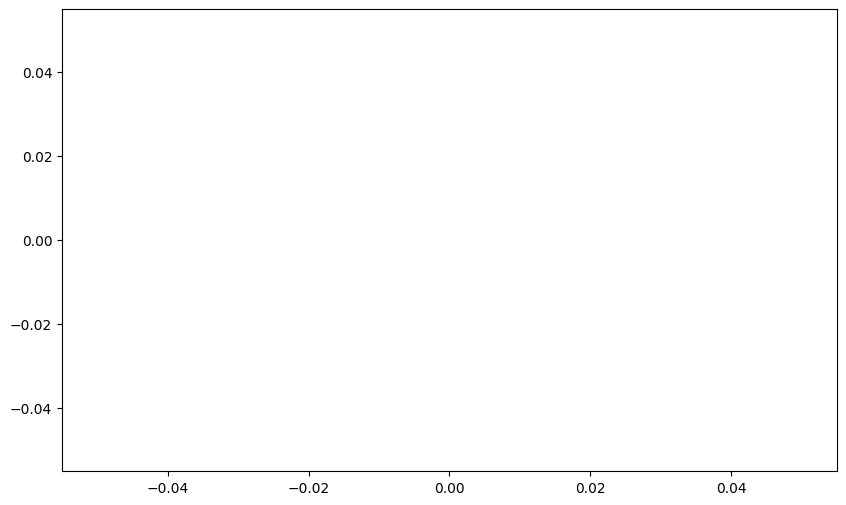

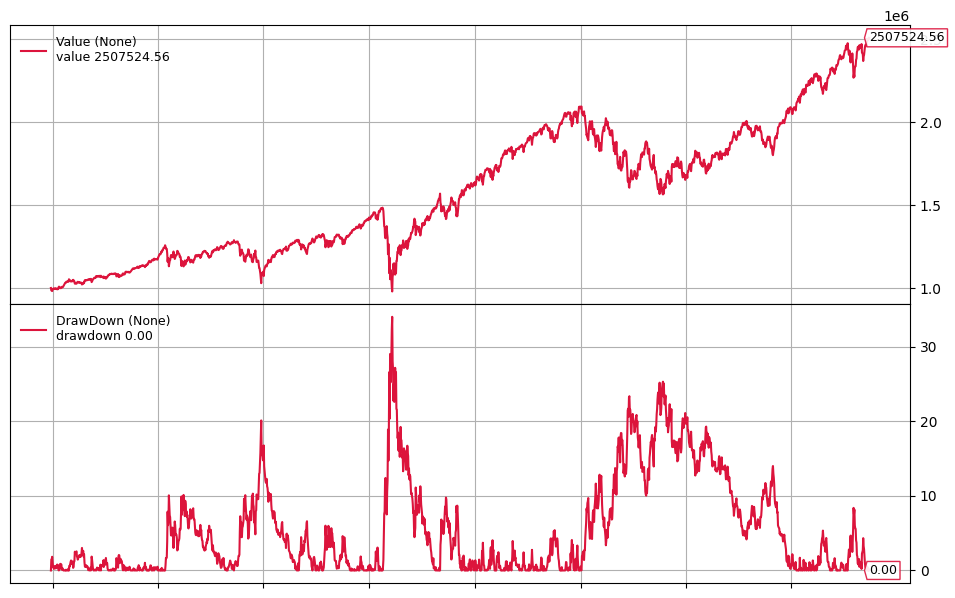

In [12]:
############################################################
# Run the backtest for the bench mark
############################################################
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
plt.plot() # We need to do this to avoid errors in inline plot

# dd, cagr, sharpe = backtest([benchmark],
benchmark0 = backtest([benchmark],
                            BuyAndHold,
                            start=start_test,
                            end=end_test,
                            plot=True)

In [13]:
def RetreiveStats(bt_result, s_name):
    dd = bt_result.analyzers.drawdown.get_analysis()['max']['drawdown']
    cagr= bt_result.analyzers.returns.get_analysis()['rnorm100']
    sharpe =bt_result.analyzers.sharperatio.get_analysis()['sharperatio']

    return {'Strategy':s_name,'Max DrawDown':dd/100.0, 'CAGR': cagr/100.0, 'Sharpe Ratio':sharpe}

In [14]:

metric_list = []

metric_list.append(RetreiveStats(benchmark0, benchmark_symbol))
display(metric_list)

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343}]

In [15]:
#
# Retreive Daily Return from bt
#
def RetreiveDailyReturn(bt_result, s_name):
    tret_analyzer = bt_result.analyzers.getbyname('timereturn')
    ret_ = tret_analyzer.get_analysis()
    return pd.DataFrame(ret_.items(), columns=['Date', s_name])


In [16]:
BM_ret = RetreiveDailyReturn(benchmark0, benchmark_symbol)
print(BM_ret)
BM_ret.to_csv(f"{benchmark_symbol}_ret.csv", index=False)

           Date       SPY
0    2013-01-02  0.000000
1    2013-01-03  0.000000
2    2013-01-04  0.000000
3    2013-01-07  0.000000
4    2013-01-08  0.000000
...         ...       ...
2950 2024-09-23  0.002495
2951 2024-09-24  0.002857
2952 2024-09-25 -0.002202
2953 2024-09-26  0.003959
2954 2024-09-27 -0.001448

[2955 rows x 2 columns]


### Rebalancing Quarterly using Riskfolio-Lib

In [17]:
############################################################
# Calculate assets returns
############################################################

pd.options.display.float_format = '{:.4%}'.format

data = prices.loc[:, ('Adj Close', slice(None))]
data.columns = assets
data = data.drop(columns=[benchmark_symbol]).dropna()
returns = data.pct_change().dropna()
display(returns.index[0], returns.index[-1])

Timestamp('2013-01-03 00:00:00+0000', tz='UTC')

Timestamp('2024-09-27 00:00:00+0000', tz='UTC')

In [18]:
############################################################
# Selecting Dates for Rebalancing
############################################################

def SelectIndex(price_in, mode="Q"):
    # Selecting last day of month of available data
    index_Month = price_in.groupby([price_in.index.year, price_in.index.month]).tail(1).index
    print("Monthly: ", index_Month)
    index_daily = price_in.index
    print("Daily: ", index_daily)

    # Quarterly Dates
    index_Quater = [x for x in index_Month if float(x.month) % 3.0 == 0 ] 
    print("Quarterly: ", index_Quater)

    # Semi-Annually Dates
    index_Semi = [x for x in index_Month if float(x.month) % 6.0 == 0 ] 
    print("Semi-Annually: ", index_Semi)

    match mode:
        case "Q": index=index_Quater
        case "M": index = index_Month
        case "D": index = index_daily
        case "S": index = index_Semi
    # Dates where the strategy will be backtested
    index_ = [index_daily.get_loc(x) for x in index if index_daily.get_loc(x) >= start_test]
    return index_

In [19]:
dt_index = SelectIndex(returns, mode="M")

Monthly:  DatetimeIndex(['2013-01-31 00:00:00+00:00', '2013-02-28 00:00:00+00:00',
               '2013-03-28 00:00:00+00:00', '2013-04-30 00:00:00+00:00',
               '2013-05-31 00:00:00+00:00', '2013-06-28 00:00:00+00:00',
               '2013-07-31 00:00:00+00:00', '2013-08-30 00:00:00+00:00',
               '2013-09-30 00:00:00+00:00', '2013-10-31 00:00:00+00:00',
               ...
               '2023-12-29 00:00:00+00:00', '2024-01-31 00:00:00+00:00',
               '2024-02-29 00:00:00+00:00', '2024-03-28 00:00:00+00:00',
               '2024-04-30 00:00:00+00:00', '2024-05-31 00:00:00+00:00',
               '2024-06-28 00:00:00+00:00', '2024-07-31 00:00:00+00:00',
               '2024-08-30 00:00:00+00:00', '2024-09-27 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=141, freq=None)
Daily:  DatetimeIndex(['2013-01-03 00:00:00+00:00', '2013-01-04 00:00:00+00:00',
               '2013-01-07 00:00:00+00:00', '2013-01-08 00:00:00+00:00',
       

In [20]:
print(dt_index)

[1006, 1026, 1045, 1068, 1087, 1109, 1131, 1151, 1174, 1194, 1216, 1237, 1257, 1278, 1297, 1318, 1339, 1361, 1382, 1403, 1426, 1445, 1468, 1489, 1508, 1529, 1548, 1569, 1590, 1612, 1632, 1654, 1676, 1696, 1719, 1739, 1760, 1781, 1800, 1822, 1843, 1863, 1885, 1907, 1928, 1949, 1971, 1991, 2013, 2032, 2051, 2074, 2095, 2115, 2137, 2158, 2180, 2201, 2222, 2243, 2265, 2285, 2304, 2327, 2347, 2368, 2389, 2409, 2432, 2453, 2474, 2495, 2516, 2536, 2555, 2578, 2597, 2619, 2640, 2660, 2683, 2703, 2725, 2746, 2766, 2787, 2807, 2827, 2849, 2871, 2890, 2912, 2934, 2953]


In [37]:
ret = returns.reset_index()
display(ret.iloc[dt_index])

Date     AMAT      AMD     AVGO      BAC      BKR  \
1006 2016-12-30 00:00:00+00:00 -1.1941% -2.1570% -1.7235%  0.4546%  0.3863%   
1026 2017-01-31 00:00:00+00:00 -0.2621% -2.2620% -1.8306% -1.3507%  2.0382%   
1045 2017-02-28 00:00:00+00:00 -0.5765% -4.8684% -1.1018%  0.4477%  0.0498%   
1068 2017-03-31 00:00:00+00:00  0.0257%  3.5587% -0.4908% -1.1730%  0.8599%   
1087 2017-04-28 00:00:00+00:00 -1.7421% -2.3495% -1.0220% -1.3108% -0.4694%   
...                        ...      ...      ...      ...      ...      ...   
2871 2024-05-31 00:00:00+00:00 -0.6742%  0.0900% -2.6047%  3.5206%  3.0788%   
2890 2024-06-28 00:00:00+00:00  1.4880%  1.7182%  1.1893%  1.3248%  2.1790%   
2912 2024-07-31 00:00:00+00:00  7.8581%  4.3629% 11.9565% -2.3498%  1.2552%   
2934 2024-08-30 00:00:00+00:00  2.2178%  2.1101%  3.7533%  1.4439% -0.2552%   
2953 2024-09-27 00:00:00+00:00 -2.2375% -1.8747% -3.0322% -0.3036%  4.0552%   

          BMY      BSX        C    CMCSA  ...      LQD     MDLZ       MO  \
1006 -0.7810% -0.3226%  0.0842% -1.0957%  ...  0.1538% -1.1374% -0.3390%   
1026  0.9653%  0.8805% -1.3779%  0.1062%  ...  0.1793% -0.3376% -0.1683%   
1045  0.2652% -1.0480% -0.3499% -0.2930%  ...  0.0675%  0.3427%  0.4424%   
1068 -1.7703%  1.7178% -1.1403%  0.2133%  ...  0.1019% -0.4621% -0.8744%   
1087  0.6826%  0.7639% -0.4546% -1.0104%  ...  0.1178%  0.0667%  0.3495%   
...       ...      ...      ...      ...  ...      ...      ...      ...   
2871  2.0870%  0.7600%  0.6136%  2.9843%  ...  0.4416%  0.9427%  1.7826%   
2890  0.0482%  0.0130%  3.1032%  2.2989%  ... -0.6400% -1.1107%  0.1980%   
2912 -3.0377% -0.2026% -1.5030%  1.1272%  ...  0.5784%  1.9388% -3.0465%   
2934  0.4626%  1.3884%  1.2282%  0.2788%  ... -0.2780%  1.5269%  0.7684%   
2953  1.5762%  0.3250%  0.2593%  1.5115%  ...  0.3989% -0.1615% -0.0783%   

          MRK      MRO      MRVL     MSFT       MU      NEM      TLT  
1006 -0.2879% -1.4798%  -1.7009% -1.2083% -1.5716% -3.4023%  0.1514%  
1026  0.9116%  1.3309%  -0.2682% -0.7370% -0.2895%  3.7461%  0.6959%  
1045  0.0304%  0.9464%  -2.6217% -0.3892% -1.3468%  0.7948%  0.3710%  
1068  0.1418% -0.3155%  -1.8650%  0.2283% -0.2416%  0.0911%  0.2908%  
1087 -0.3995% -0.0672%  -0.4639%  0.2783%  0.1448%  2.7347%  0.2211%  
...       ...      ...       ...      ...      ...      ...      ...  
2871  0.8111%  2.6586% -10.4619%  0.1109% -1.0215%  0.1194%  0.6790%  
2890 -4.6372%  0.3149%   1.7023% -1.3029% -0.5294%  0.0717% -1.8606%  
2912 -1.8395%  1.4834%   6.6561% -1.0806%  7.0788%  3.5014%  1.0229%  
2934  0.8428% -0.6932%   9.1638%  0.9731%  0.7011%  0.3949% -1.0663%  
2953  0.5306%  2.3579%  -3.3492% -0.7628% -2.1660% -2.9353%  0.5201%  

[94 rows x 41 columns]

In [21]:
###########################################################
# Building Constraints
############################################################



asset_classes = pd.DataFrame(asset_classes_dict)
asset_classes = asset_classes.sort_values(by=['Assets'])
print(asset_classes)
print(asset_classes['Industry'].unique())

constraints = {'Disabled': [False, False, True],
               'Type': ['All Assets', 'All Classes', 'All Classes'],
               'Set': ['', 'Industry', 'Industry'],
               'Position': ['', '', ''],
               'Sign': ['<=', '<=', '>='],
               'Weight': [0.10, 0.20, 0.03],
               'Type Relative': ['', '', ''],
               'Relative Set': ['', '', ''],
               'Relative': ['', '', ''],
               'Factor': ['', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

   Assets                Industry
0    AMAT              Technology
1     AMD              Technology
2    AVGO              Technology
3     BAC      Financial Services
4     BKR                  Energy
5     BMY              Healthcare
6     BSX              Healthcare
7       C      Financial Services
8   CMCSA  Communication Services
9    CSCO              Technology
10    CSX             Industrials
11    CVS              Healthcare
12    CVX                  Energy
13    DIS  Communication Services
14    DVN                  Energy
15    FCX         Basic Materials
16    FNF      Financial Services
17    GEN              Technology
18   GILD              Healthcare
19     GM       Consumer Cyclical
20    HAL                  Energy
21    HPQ              Technology
37    HYG                    Bond
22   INTC              Technology
23    IPG  Communication Services
24    JNJ              Healthcare
25    KDP      Consumer Defensive
26    KKR      Financial Services
27    KMI     

Disabled         Type       Set Position Sign   Weight Type Relative  \
0     False   All Assets                      <= 10.0000%                 
1     False  All Classes  Industry            <= 20.0000%                 
2      True  All Classes  Industry            >=  3.0000%                 

  Relative Set Relative Factor  
0                               
1                               
2

In [22]:
############################################################
# Building constraint matrixes for Riskfolio Lib
############################################################

import riskfolio as rp

A, B = rp.assets_constraints(constraints, asset_classes)

In [23]:
Y = returns.iloc[start_test-test_size:start_test,:]
print(Y.index[0], Y.index[-1])
print(Y.columns)

2013-01-09 00:00:00+00:00 2016-12-27 00:00:00+00:00
Index(['AMAT', 'AMD', 'AVGO', 'BAC', 'BKR', 'BMY', 'BSX', 'C', 'CMCSA', 'CSCO',
       'CSX', 'CVS', 'CVX', 'DIS', 'DVN', 'FCX', 'FNF', 'GEN', 'GILD', 'GM',
       'HAL', 'HPQ', 'HYG', 'INTC', 'IPG', 'JNJ', 'KDP', 'KKR', 'KMI', 'KO',
       'LQD', 'MDLZ', 'MO', 'MRK', 'MRO', 'MRVL', 'MSFT', 'MU', 'NEM', 'TLT'],
      dtype='object')


* The optimization is based on the returns of previous 1000 days from last date of each quarter, which is about 4 years

In [24]:
%%time
############################################################
# Building a loop that estimate optimal portfolios on
# rebalancing dates
############################################################

models = {}

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

# rms = ['MV', 'CVaR', 'WR', 'CDaR']

for j in rms:
    
    weights = pd.DataFrame([])

    for i in dt_index:
        Y = returns.iloc[i-test_size:i,:] # taking last 4 years (250 trading days per year)
#         print("from ", Y.index[0], " to ", Y.index[-1])
#         print(Y)
        # Building the portfolio object
        port = rp.Portfolio(returns=Y)
        
        # Add portfolio constraints
        port.ainequality = A
        port.binequality = B
        
        # Calculating optimum portfolio

        # Select method and estimate input parameters:

        method_mu='hist' # Method to estimate expected returns based on historical data.
        method_cov='hist' # Method to estimate covariance matrix based on historical data.

        port.assets_stats(method_mu=method_mu, method_cov=method_cov)
        
        # Estimate optimal portfolio:
        
#         port.solvers = ['MOSEK']
        port.alpha = 0.05
        model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
        rm = j # Risk measure used, this time will be variance
        obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
        hist = True # Use historical scenarios for risk measures that depend on scenarios
        rf = 0 # Risk free rate
        l = 0 # Risk aversion factor, only useful when obj is 'Utility'

#         print(f"Optm(model={model}, rm={rm}, obj={obj}, solvers={port.solvers})")
        w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

        if w is None:
            w = weights.tail(1).T
        display(w)
        weights = pd.concat([weights, w.T], axis = 0)
    
    models[j] = weights.copy()
    models[j].index = dt_index

weights
AMAT   0.6123%
AMD    3.6730%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    1.1841%
BSX   10.0000%
C      0.0000%
CMCSA  3.7583%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS   10.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.2563%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.9777%
HYG    0.0000%
INTC   0.0000%
IPG    1.9854%
JNJ    8.8159%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.7369%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.5099%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.2819%
CSCO   0.0000%
CSX    5.2660%
CVS    0.0000%
CVX    0.0000%
DIS    6.3711%
DVN    0.0000%
FCX    0.0000%
FNF    3.9430%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.3716%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.9588%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.1792%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.1185%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.8737%
AVGO  10.0000%
BAC    1.1036%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.3338%
CSCO   0.0000%
CSX    4.1007%
CVS    0.0000%
CVX    0.0000%
DIS    2.6313%
DVN    0.0000%
FCX    0.0000%
FNF    8.8306%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.1263%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   1.1930%
AMD    4.6862%
AVGO  10.0000%
BAC    0.9601%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  4.0843%
CSCO   0.0000%
CSX    2.8180%
CVS    0.0000%
CVX    0.0000%
DIS    3.3089%
DVN    0.0000%
FCX    0.0000%
FNF    8.8287%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.1208%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   3.4121%
AMD    2.8448%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  8.2472%
CSCO   0.0000%
CSX    4.2603%
CVS    0.0000%
CVX    0.0000%
DIS    0.5248%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    1.2907%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.9678%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.4524%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   5.5749%
AMD    1.7516%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    9.0412%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    4.7018%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    1.1962%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.2570%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.4773%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   1.6086%
AMD    2.3190%
AVGO  10.0000%
BAC    0.8419%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  4.7577%
CSCO   0.0000%
CSX    7.0056%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.1794%
MU     0.0000%
NEM    1.2878%
TLT   10.0000%

weights
AMAT   3.0772%
AMD    2.9440%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    6.2240%
C      0.0000%
CMCSA  5.7741%
CSCO   0.0000%
CSX    3.9784%
CVS    0.0000%
CVX    0.0000%
DIS    2.5862%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.0831%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.9788%
MU     0.0000%
NEM    2.3542%
TLT   10.0000%

weights
AMAT   2.4314%
AMD    2.5494%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0568%
BSX    4.7093%
C      0.0000%
CMCSA  9.7496%
CSCO   0.0000%
CSX    3.3677%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0711%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.9481%
MU     0.0000%
NEM    2.1166%
TLT   10.0000%

weights
AMAT   2.6478%
AMD    2.6564%
AVGO  10.0000%
BAC    2.7866%
BKR    0.0000%
BMY    0.0000%
BSX    6.2503%
C      0.0000%
CMCSA  2.6521%
CSCO   0.0000%
CSX    5.0185%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.6958%
MU     0.0000%
NEM    3.2925%
TLT   10.0000%

weights
AMAT   4.5045%
AMD    2.1660%
AVGO  10.0000%
BAC    6.2119%
BKR    0.0000%
BMY    0.0000%
BSX    6.9461%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.2968%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.3295%
MU     0.0000%
NEM    3.5452%
TLT   10.0000%

weights
AMAT   5.1360%
AMD    1.6928%
AVGO  10.0000%
BAC    5.4833%
BKR    0.0000%
BMY    0.0000%
BSX    5.8313%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.8480%
CVS    0.0000%
CVX    0.0000%
DIS    0.2656%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.1712%
MU     0.0000%
NEM    4.5717%
TLT   10.0000%

weights
AMAT   2.8384%
AMD    1.2755%
AVGO  10.0000%
BAC    5.8493%
BKR    0.0000%
BMY    0.0000%
BSX    2.6196%
C      0.0000%
CMCSA  2.1891%
CSCO   0.0000%
CSX    4.1600%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.8861%
MU     0.0000%
NEM    5.1820%
TLT   10.0000%

weights
AMAT   2.8436%
AMD    2.2229%
AVGO   7.5523%
BAC    6.0536%
BKR    0.0000%
BMY    0.0000%
BSX    3.5217%
C      0.0000%
CMCSA  0.7232%
CSCO   0.0000%
CSX    4.3358%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.3813%
MU     0.0000%
NEM    5.3658%
TLT   10.0000%

weights
AMAT   1.5267%
AMD    2.3081%
AVGO   8.2740%
BAC    7.2843%
BKR    0.0000%
BMY    0.0000%
BSX    4.0461%
C      0.0000%
CMCSA  0.0000%
CSCO   2.1198%
CSX    3.3538%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.7714%
MU     0.0000%
NEM    5.3159%
TLT   10.0000%

weights
AMAT   2.1071%
AMD    1.7247%
AVGO  10.0000%
BAC    7.0157%
BKR    0.0000%
BMY    0.9219%
BSX    5.8945%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0530%
CSX    5.0539%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.4579%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.1152%
MU     0.0000%
NEM    5.6561%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.3793%
AVGO   8.3407%
BAC    9.3657%
BKR    0.0000%
BMY    0.0000%
BSX    8.5321%
C      0.0000%
CMCSA  0.0000%
CSCO   1.3441%
CSX    5.8969%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     9.8322%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.9360%
MU     0.0000%
NEM    6.3730%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.0835%
AVGO   8.6252%
BAC    7.1763%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.4684%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.8186%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.2913%
MU     0.0000%
NEM    6.5368%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.5096%
AVGO   8.5131%
BAC    7.9281%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.8729%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.9773%
MU     0.0000%
NEM    5.1991%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.3624%
AVGO   6.2422%
BAC    7.8456%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.0897%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.3955%
MU     0.0000%
NEM    4.0648%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.0330%
AVGO   1.9221%
BAC    6.0086%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   2.0449%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.9944%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.9969%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.2739%
AVGO   4.0663%
BAC    3.4860%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.9335%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.0009%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.3228%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.6598%
MU     0.0000%
NEM    3.2568%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.6447%
AVGO   5.3144%
BAC    3.5602%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  1.0009%
CSCO   0.0000%
CSX    5.2657%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.0565%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.0409%
MU     0.0000%
NEM    7.1166%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.9783%
AVGO   2.0217%
BAC    3.6167%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  1.4314%
CSCO   0.0000%
CSX    7.7470%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.1945%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.3744%
LQD   10.0000%
MDLZ   0.0000%
MO     2.4190%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.2171%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.0919%
AVGO   5.3409%
BAC    3.8167%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.1067%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.3470%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.0051%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.0542%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    2.6703%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.5672%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.0391%
AVGO   3.7077%
BAC    9.0217%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.6370%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.4008%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.6917%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.8108%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.2533%
MU     0.0000%
NEM    6.4379%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.3219%
AVGO   1.6781%
BAC    8.7356%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.7321%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.2066%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.1062%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    3.8938%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    8.3257%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.8173%
AVGO   2.1827%
BAC    5.7685%
BKR    0.0000%
BMY    0.0000%
BSX    5.8783%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.2592%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.0833%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.7065%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     1.7130%
MRK    5.4152%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    8.1760%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.1888%
AVGO   1.8112%
BAC    6.5980%
BKR    0.0000%
BMY    0.0000%
BSX    5.2333%
C      0.0000%
CMCSA  3.7500%
CSCO   0.0000%
CSX    7.4397%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.0626%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.4851%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    4.4313%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.9619%
AVGO   0.0000%
BAC    0.0131%
BKR    0.0000%
BMY    0.0000%
BSX    7.5567%
C      0.0000%
CMCSA  2.6651%
CSCO   1.0381%
CSX    9.3946%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.1305%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.5040%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     7.9560%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.5103%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.2697%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.7814%
AVGO   0.0000%
BAC    2.4757%
BKR    0.0000%
BMY    0.0000%
BSX    7.3939%
C      0.0000%
CMCSA  0.0000%
CSCO   1.2186%
CSX    8.7403%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.4445%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.4851%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.0101%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    2.7049%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.7454%
TLT   10.0000%

weights
AMAT   0.2545%
AMD    8.8505%
AVGO   0.8950%
BAC    2.9114%
BKR    0.0000%
BMY    0.0000%
BSX    8.5215%
C      0.0000%
CMCSA  1.7152%
CSCO   0.0000%
CSX    7.5156%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.9843%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.5560%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     7.7546%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    3.0413%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.0108%
AMD    7.0737%
AVGO   0.0000%
BAC    1.1273%
BKR    0.0000%
BMY    0.0000%
BSX    5.9415%
C      0.0000%
CMCSA  0.3211%
CSCO   0.0000%
CSX    6.8344%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.7111%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.9800%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.5703%
AMD    7.3171%
AVGO   0.7894%
BAC    3.1132%
BKR    0.0000%
BMY    0.0000%
BSX    4.3369%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.3129%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.9607%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.5994%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.6794%
AMD    7.1661%
AVGO   0.7586%
BAC    2.3395%
BKR    0.0000%
BMY    0.0000%
BSX    2.1337%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.5268%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.3960%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.7423%
AVGO   0.0000%
BAC    4.2182%
BKR    0.0000%
BMY    0.0000%
BSX    1.8041%
C      0.0000%
CMCSA  0.0475%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.6148%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.3154%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   3.2577%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.5843%
AVGO   0.0000%
BAC    6.9709%
BKR    0.0000%
BMY    0.0000%
BSX    1.5434%
C      0.0000%
CMCSA  0.3140%
CSCO   0.0000%
CSX    9.5605%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.4682%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.0469%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.5118%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.4917%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.5820%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.0186%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.0248%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.2594%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.4728%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.3612%
NEM    9.7895%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.1483%
AVGO   0.0000%
BAC    9.5264%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    1.5787%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.7614%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.3354%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    7.4764%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     1.1734%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    3.6783%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    2.3210%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    6.3217%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.3389%
MU     1.3402%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    2.0318%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  1.9458%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    4.1795%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    5.7531%
KMI    0.0000%
KO     0.2693%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2722%
MU     1.5483%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    1.0703%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.8120%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    2.9830%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    8.1178%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.0170%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    1.5437%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.4563%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.7045%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    8.8364%
KMI    0.0000%
KO     0.4592%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  1.1925%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.0346%
KDP   10.0000%
KKR    9.7729%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.8072%
BSX    0.0000%
C      0.0000%
CMCSA  2.2684%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.9243%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  1.8508%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.6854%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.1597%
KDP   10.0000%
KKR    5.7895%
KMI    0.0000%
KO     4.5864%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    7.9282%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.2953%
DVN    0.0000%
FCX    0.0000%
FNF    3.4122%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.3813%
KDP   10.0000%
KKR    3.9142%
KMI    0.0000%
KO     6.8917%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    6.1052%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.9870%
BSX    0.0000%
C      0.0000%
CMCSA  1.3262%
CSCO   0.0000%
CSX    2.2556%
CVS    0.0000%
CVX    0.0000%
DIS    3.2823%
DVN    0.0000%
FCX    0.0000%
FNF    3.0042%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    7.5468%
KMI    0.0000%
KO     3.7537%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    3.8444%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.0057%
CVS    0.0000%
CVX    0.0000%
DIS    6.1149%
DVN    0.0000%
FCX    3.7681%
FNF    1.0223%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     6.0891%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.8295%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.5585%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.8788%
CVS    0.0000%
CVX    0.0000%
DIS    1.6601%
DVN    0.0000%
FCX    0.0000%
FNF    1.0192%
GEN    0.0000%
GILD   0.0000%
GM     2.9291%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     6.2803%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.6740%
MRO    0.0000%
MRVL   0.1705%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.1191%
BSX    0.0000%
C      0.0000%
CMCSA  1.1495%
CSCO   0.0000%
CSX    0.2890%
CVS    0.0000%
CVX    0.0000%
DIS    0.6666%
DVN    0.0000%
FCX    4.8102%
FNF    4.0534%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     8.9124%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.9661%
BKR    0.0000%
BMY    4.8730%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.1154%
DVN    0.0000%
FCX    6.6658%
FNF    0.7863%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     4.5934%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.3338%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.2253%
BSX    0.0000%
C      0.0000%
CMCSA  0.3552%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.9931%
DVN    0.0000%
FCX    3.4237%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.1992%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.6282%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     2.0628%
LQD   10.0000%
MDLZ   4.9957%
MO     0.0000%
MRK    8.1168%
MRO    0.0000%
MRVL   0.6662%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.8585%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.4911%
DVN    0.0000%
FCX    0.4320%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.7660%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     3.2745%
LQD   10.0000%
MDLZ   2.8728%
MO     0.0000%
MRK    6.3052%
MRO    0.0000%
MRVL   0.4774%
MSFT   9.5226%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    3.9070%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.4955%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   8.1509%
MO     0.0000%
MRK    1.4466%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.6259%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    9.2264%
JNJ    7.3224%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   6.5690%
MO     0.0000%
MRK    4.2562%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.8692%
CVS    0.2452%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   6.8856%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.1586%
CVS    3.0741%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.5247%
JNJ    1.1380%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     1.4760%
LQD   10.0000%
MDLZ   6.6286%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    2.0374%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.7306%
JNJ    0.2320%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     1.0218%
LQD   10.0000%
MDLZ   8.9782%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.7210%
MSFT   9.2790%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    6.2160%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.9086%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.9799%
JNJ    3.7840%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     9.0201%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.0914%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    8.5188%
CVX    0.0000%
DIS    0.0000%
DVN    0.2927%
FCX    0.3050%
FNF    0.0000%
GEN    3.4988%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.8835%
MRVL   0.0000%
MSFT   6.5012%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    7.3990%
CVX    0.0000%
DIS    0.0000%
DVN    1.3782%
FCX    0.5312%
FNF    0.0000%
GEN    2.7248%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.6010%
KDP   10.0000%
KKR    8.6924%
KMI    0.0000%
KO     9.3983%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.2752%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    3.1535%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    4.7119%
CVX    0.0000%
DIS    0.0000%
DVN    0.8814%
FCX    3.3047%
FNF    0.0000%
GEN    1.9562%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.1225%
JNJ    2.6069%
KDP   10.0000%
KKR    5.6914%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.5277%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.0438%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.4193%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.4612%
FCX    0.0000%
FNF    0.0000%
GEN    8.8901%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.5807%
KDP   10.0000%
KKR    6.5388%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.1099%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    3.7625%
BSX    0.0000%
C      0.0000%
CMCSA  0.8380%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.6410%
FCX    0.0000%
FNF    0.0000%
GEN    6.5553%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.2375%
KDP   10.0000%
KKR    5.5210%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.4447%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    4.3031%
CVX    0.0000%
DIS    0.0000%
DVN    3.3350%
FCX    0.0481%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.6969%
KDP   10.0000%
KKR    6.6169%
KMI    0.0000%
KO     9.8487%
LQD   10.0000%
MDLZ   0.1513%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.6653%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    4.0172%
CVX    0.0000%
DIS    0.0000%
DVN    6.5503%
FCX    3.1197%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.4009%
KDP   10.0000%
KKR    1.9120%
KMI    0.0000%
KO     9.7716%
LQD   10.0000%
MDLZ   0.2284%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.7291%
MSFT   2.6056%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.5775%
AMD    4.4431%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.7798%
CVX    0.0000%
DIS    0.0000%
DVN    6.8065%
FCX    5.0859%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.9089%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     6.5138%
LQD    9.4189%
MDLZ   3.4862%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   3.9510%
MSFT   1.0285%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.1279%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    5.8282%
FNF    0.0000%
GEN    9.9657%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    2.0240%
KMI    0.0000%
KO     0.0000%
LQD    2.1478%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.9063%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    9.5531%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.4224%
FCX    8.4267%
FNF    0.0000%
GEN    9.6384%
GILD   2.3498%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    3.1324%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   9.0185%
MO     0.0000%
MRK    8.0970%
MRO    0.0000%
MRVL   0.3616%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    9.5502%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.0317%
FCX    8.8939%
FNF    0.0000%
GEN   10.0000%
GILD   0.4498%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    5.9756%
KKR    2.0744%
KMI    0.0000%
KO     4.0244%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.6583%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    7.8246%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.8290%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   2.9188%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    2.6581%
KKR    4.8524%
KMI    0.0000%
KO     0.0000%
LQD    7.5539%
MDLZ   5.1066%
MO     0.0000%
MRK    9.2566%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.3417%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.6593%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0125%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    4.1592%
CVX    0.0000%
DIS    0.0000%
DVN    6.9917%
FCX   10.0000%
FNF    0.0000%
GEN    8.3407%
GILD   5.8284%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.2208%
KKR    8.4129%
KMI    0.0000%
KO     7.8357%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    9.5389%
TLT   10.0000%

weights
AMAT   1.0186%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.4761%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   3.1985%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.7156%
JNJ    0.0000%
KDP    5.1094%
KKR    4.5955%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   2.1034%
MO     0.0000%
MRK    6.8015%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.9814%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    5.9583%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.7103%
FCX   10.0000%
FNF    0.0000%
GEN    1.1790%
GILD   4.0417%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    3.3093%
KMI    0.0000%
KO    10.0000%
LQD    0.9805%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.8210%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   9.2885%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.5243%
FCX   10.0000%
FNF    0.0000%
GEN    0.7115%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    9.9007%
JNJ    0.0000%
KDP    0.0000%
KKR    4.5971%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   9.8035%
MO     0.0000%
MRK   10.0000%
MRO    2.2136%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    8.9608%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.9810%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.1838%
JNJ    0.0000%
KDP    0.0000%
KKR    7.2101%
KMI    0.0000%
KO     0.0000%
LQD    0.9737%
MDLZ  10.0000%
MO     0.5012%
MRK   10.0000%
MRO    4.1059%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    8.0444%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    3.3816%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.3044%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   5.4324%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.0423%
KDP    4.4120%
KKR    8.1190%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     2.5102%
MRK    6.1437%
MRO    5.7165%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    4.9379%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.5426%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.9025%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   5.3644%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0930%
KDP    8.0855%
KKR    6.9572%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   5.7501%
MO     6.1644%
MRK   10.0000%
MRO    5.9972%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    3.1431%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.4259%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    4.5216%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   7.4332%
MO     8.0451%
MRK   10.0000%
MRO    9.8991%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    2.3390%
TLT    3.3359%

weights
AMAT   0.0000%
AMD    8.5948%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.2541%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    9.8221%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.9238%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   1.4052%
MU     0.0000%
NEM   10.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.3830%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.5684%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    8.7736%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    6.0294%
TLT    9.2456%

weights
AMAT   0.0000%
AMD    9.3476%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.8391%
FCX   10.0000%
FNF    0.0000%
GEN    0.6524%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.4697%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    1.0824%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    6.4602%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    2.1485%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    1.7135%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    4.6863%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    3.6836%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    9.9166%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.2357%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    8.8989%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.7643%
KDP    8.3582%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    3.6144%
MDLZ   7.6906%
MO     1.4379%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    4.0427%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    4.1186%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.7011%
FCX   10.0000%
FNF    3.3206%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.8814%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   6.3401%
MO     3.6382%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   5.9573%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   3.4086%
AMD    1.1583%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    9.6761%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.8741%
FCX   10.0000%
FNF    6.2281%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    4.7775%
KKR    9.6478%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   7.2482%
MO     7.9743%
MRK   10.0000%
MRO    6.5738%
MRVL   0.0000%
MSFT   5.4331%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   3.2499%
AMD    0.9710%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.8393%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    4.3049%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.7111%
KKR   10.0000%
KMI    0.0000%
KO     2.5400%
LQD    0.0000%
MDLZ   4.2703%
MO     5.4786%
MRK   10.0000%
MRO    6.8558%
MRVL   0.0000%
MSFT   5.7792%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   1.8623%
AMD    1.1860%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    2.7918%
FNF    3.4250%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    4.7793%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.4823%
MO     9.5177%
MRK   10.0000%
MRO    9.0039%
MRVL   0.0000%
MSFT   6.9517%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   1.1344%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0534%
FNF    6.5312%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    3.4153%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   8.8656%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   1.5006%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    6.7213%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    9.2117%
GEN    0.0000%
GILD   3.2787%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.7883%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   8.4994%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.6521%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    3.4418%
BMY    0.0000%
BSX    7.0763%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.4808%
FCX    0.0000%
FNF    7.9110%
GEN    0.0154%
GILD   2.9237%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    1.6397%
KKR   10.0000%
KMI    3.0774%
KO     8.9696%
LQD    2.0890%
MDLZ   0.0000%
MO     9.3907%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   9.3324%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.6902%
AMD    2.2537%
AVGO  10.0000%
BAC    2.3765%
BKR    0.0000%
BMY    1.1227%
BSX   10.0000%
C      0.0000%
CMCSA  4.0145%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    8.2221%
DVN    0.0000%
FCX    0.0000%
FNF    5.3870%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.4743%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.8773%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.5818%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.3528%
AVGO  10.0000%
BAC    2.7264%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  6.0218%
CSCO   0.0000%
CSX    2.1029%
CVS    0.0000%
CVX    0.0000%
DIS    5.1432%
DVN    0.0000%
FCX    0.0000%
FNF    4.0057%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.2319%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.4153%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.9460%
AVGO  10.0000%
BAC    3.2825%
BKR    0.0000%
BMY    0.6053%
BSX    9.3947%
C      0.0000%
CMCSA  3.1393%
CSCO   0.0000%
CSX    1.4874%
CVS    0.0000%
CVX    0.0000%
DIS    3.7601%
DVN    0.0000%
FCX    0.0000%
FNF    8.3307%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.0540%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.1017%
AMD    4.7566%
AVGO  10.0000%
BAC    3.0648%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.8136%
CSCO   0.0000%
CSX    1.3092%
CVS    0.0000%
CVX    0.0000%
DIS    3.7692%
DVN    0.0000%
FCX    0.0000%
FNF    8.0431%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.1417%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   3.5890%
AMD    1.8863%
AVGO  10.0000%
BAC    1.8376%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  4.8458%
CSCO   0.0000%
CSX    1.1434%
CVS    0.0000%
CVX    0.0000%
DIS    2.9072%
DVN    0.0000%
FCX    0.0000%
FNF    9.6976%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.6831%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.2485%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.8417%
MU     0.0000%
NEM    0.3199%
TLT   10.0000%

weights
AMAT   4.3217%
AMD    1.0023%
AVGO  10.0000%
BAC    1.0229%
BKR    0.0000%
BMY    0.0000%
BSX    8.8828%
C      0.0000%
CMCSA  7.9258%
CSCO   0.0000%
CSX    1.6260%
CVS    0.0000%
CVX    0.0000%
DIS    0.5425%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.9389%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.7371%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   1.7849%
AMD    1.2504%
AVGO  10.0000%
BAC    4.4928%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.6255%
CSCO   0.0000%
CSX    3.7592%
CVS    0.0000%
CVX    0.0000%
DIS    0.4317%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.7350%
MU     0.0000%
NEM    0.9205%
TLT   10.0000%

weights
AMAT   2.0581%
AMD    1.7694%
AVGO  10.0000%
BAC    2.2826%
BKR    0.0000%
BMY    0.0000%
BSX    6.0491%
C      0.0000%
CMCSA  2.3428%
CSCO   0.0000%
CSX    1.4385%
CVS    1.0444%
CVX    0.0000%
DIS    4.7897%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.1616%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.1725%
MU     0.0000%
NEM    1.8913%
TLT   10.0000%

weights
AMAT   1.2634%
AMD    1.2303%
AVGO  10.0000%
BAC    3.7458%
BKR    0.0000%
BMY    1.2137%
BSX    3.5718%
C      0.0000%
CMCSA  7.3171%
CSCO   0.0000%
CSX    1.2515%
CVS    0.0000%
CVX    0.0000%
DIS    0.7530%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.3022%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.5063%
MU     0.0000%
NEM    1.8449%
TLT   10.0000%

weights
AMAT   1.4268%
AMD    1.1870%
AVGO  10.0000%
BAC    5.8409%
BKR    0.0000%
BMY    1.0578%
BSX    5.4570%
C      0.0000%
CMCSA  2.5890%
CSCO   0.0000%
CSX    1.3870%
CVS    0.9945%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.3861%
MU     0.0000%
NEM    2.6738%
TLT   10.0000%

weights
AMAT   3.0889%
AMD    0.7923%
AVGO  10.0000%
BAC    8.7705%
BKR    0.0000%
BMY    0.0000%
BSX    6.4235%
C      0.0000%
CMCSA  0.2989%
CSCO   0.0000%
CSX    1.3951%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.1188%
MU     0.0000%
NEM    3.1120%
TLT   10.0000%

weights
AMAT   3.2697%
AMD    0.7804%
AVGO  10.0000%
BAC    7.9882%
BKR    0.0000%
BMY    0.0433%
BSX    5.1830%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.4512%
CVS    0.0000%
CVX    0.0000%
DIS    1.7122%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.9498%
MU     0.0000%
NEM    3.6221%
TLT   10.0000%

weights
AMAT   1.7072%
AMD    0.4137%
AVGO  10.0000%
BAC    8.0315%
BKR    0.0000%
BMY    0.0000%
BSX    1.8646%
C      0.0000%
CMCSA  0.8119%
CSCO   0.0000%
CSX    1.8190%
CVS    0.0000%
CVX    0.0000%
DIS    2.7935%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.8791%
MU     0.0000%
NEM    4.6794%
TLT   10.0000%

weights
AMAT   1.0741%
AMD    1.3804%
AVGO   7.7710%
BAC    9.0788%
BKR    0.0000%
BMY    0.6647%
BSX    2.5174%
C      0.0000%
CMCSA  1.5216%
CSCO   0.0000%
CSX    1.6170%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.7746%
MU     0.0000%
NEM    4.6005%
TLT   10.0000%

weights
AMAT   0.0787%
AMD    1.1633%
AVGO   7.5007%
BAC    9.5963%
BKR    0.0000%
BMY    1.0212%
BSX    3.1817%
C      0.0000%
CMCSA  0.2412%
CSCO   2.9245%
CSX    1.5766%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.3327%
MU     0.0000%
NEM    4.3830%
TLT   10.0000%

weights
AMAT   1.2499%
AMD    0.8045%
AVGO  10.0000%
BAC    9.1687%
BKR    0.0000%
BMY    1.6273%
BSX    4.8609%
C      0.0000%
CMCSA  0.0000%
CSCO   0.4643%
CSX    2.1782%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.0127%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.4814%
MU     0.0000%
NEM    4.1522%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.2029%
AVGO   6.6619%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    8.4598%
C      0.0000%
CMCSA  0.0000%
CSCO   2.1352%
CSX    4.1737%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.7463%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.2979%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.3224%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.4603%
AVGO   8.5397%
BAC   10.0000%
BKR    0.0000%
BMY    0.3751%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.9003%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.1311%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.5936%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.2018%
AVGO   7.7982%
BAC   10.0000%
BKR    0.0000%
BMY    0.8677%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.3762%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     9.5069%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    4.2492%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.4955%
AVGO   6.2047%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.0839%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.1078%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.8753%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.2328%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.0010%
AVGO   2.0603%
BAC    9.3617%
BKR    0.0000%
BMY    0.3274%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   2.9387%
CSX    6.2412%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.7833%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     9.2415%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.0450%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.5324%
AVGO   3.9938%
BAC    7.2717%
BKR    0.0000%
BMY    1.8066%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.5617%
CVS    0.0000%
CVX    0.0000%
DIS    0.1074%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.3295%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     6.2540%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.4738%
MU     0.0000%
NEM    2.6691%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.7322%
AVGO   4.3886%
BAC    6.3540%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.5824%
CSCO   0.0000%
CSX    1.9172%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.6943%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.0416%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.6452%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.8792%
MU     0.0000%
NEM    5.7653%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.2022%
AVGO   1.7978%
BAC    8.4549%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  2.3942%
CSCO   0.0000%
CSX    4.6342%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.2631%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.4946%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.5482%
LQD   10.0000%
MDLZ   0.0000%
MO     3.4744%
MRK    2.5054%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    6.2311%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.5956%
AVGO   4.9355%
BAC    7.5989%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.7148%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.0575%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.0896%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.7001%
LQD   10.0000%
MDLZ   0.0000%
MO     1.0181%
MRK    5.9104%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.4689%
MU     0.0000%
NEM    8.9106%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.0483%
AVGO   3.9517%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.0650%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.1454%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.0906%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     6.5220%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.9094%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    4.2676%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.2029%
AVGO   1.6717%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    9.3073%
C      0.0000%
CMCSA  0.0000%
CSCO   0.1254%
CSX    7.8953%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.3661%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.8236%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.5743%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    4.8691%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    6.1643%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.2782%
AVGO   2.7218%
BAC    9.0023%
BKR    0.0000%
BMY    0.0000%
BSX    5.1104%
C      0.0000%
CMCSA  1.1368%
CSCO   0.0000%
CSX    6.6534%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.3310%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.6428%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     2.7994%
MRK    7.2468%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    6.0772%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.9384%
AVGO   2.0616%
BAC    9.0620%
BKR    0.0000%
BMY    0.0000%
BSX    4.0668%
C      0.0000%
CMCSA  5.5479%
CSCO   0.0000%
CSX    5.4053%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.7517%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.7955%
LQD   10.0000%
MDLZ   0.0000%
MO     0.7409%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.6299%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.5971%
AVGO   0.0000%
BAC    4.8531%
BKR    0.0000%
BMY    0.0000%
BSX    4.7156%
C      0.0000%
CMCSA  4.4220%
CSCO   1.4029%
CSX    6.0991%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.0347%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.2746%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.3253%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.7885%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.4872%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.7514%
AVGO   0.0000%
BAC    6.7632%
BKR    0.0000%
BMY    0.0000%
BSX    4.7095%
C      0.0000%
CMCSA  0.0000%
CSCO   1.2486%
CSX    6.1478%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.5937%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.6255%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.6453%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    3.6058%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.9093%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.3872%
AVGO   0.6128%
BAC    5.4121%
BKR    0.0000%
BMY    0.0000%
BSX    5.6259%
C      0.0000%
CMCSA  2.6186%
CSCO   0.0000%
CSX    4.9239%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.5697%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.9993%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.9619%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    4.8887%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.6043%
AMD    7.4002%
AVGO   0.0000%
BAC    4.0194%
BKR    0.0000%
BMY    0.0000%
BSX    4.3053%
C      0.0000%
CMCSA  0.6491%
CSCO   0.0000%
CSX    5.4862%
CVS    0.0000%
CVX    0.1646%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.4965%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.0339%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    7.8405%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.6062%
AMD    8.2448%
AVGO   0.1490%
BAC    6.0359%
BKR    0.0000%
BMY    0.0000%
BSX    4.4096%
C      0.0000%
CMCSA  0.0580%
CSCO   0.0000%
CSX    6.0682%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.3137%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     3.3250%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.1586%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    8.6310%
TLT   10.0000%

weights
AMAT   1.7063%
AMD    8.2015%
AVGO   0.0000%
BAC    4.8854%
BKR    0.0000%
BMY    0.0000%
BSX    2.7930%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.7614%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.8292%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     3.5988%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.1323%
MRO    0.0000%
MRVL   0.2196%
MSFT   9.8726%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.0878%
AVGO   0.0000%
BAC    6.6203%
BKR    0.0000%
BMY    0.0000%
BSX    1.2522%
C      0.0000%
CMCSA  0.7214%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.1265%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.1249%
MRO    0.0000%
MRVL   2.3242%
MSFT  10.0000%
MU     0.0000%
NEM    8.7427%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.1436%
AVGO   0.0000%
BAC    9.7279%
BKR    0.0000%
BMY    0.0000%
BSX    0.7490%
C      0.0000%
CMCSA  0.6148%
CSCO   0.0000%
CSX    8.0586%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.9281%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    7.1606%
MRO    0.0000%
MRVL   1.2350%
MSFT   9.3823%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.0556%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0909%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.2836%
CVS    0.0000%
CVX    0.0000%
DIS    1.5106%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.4976%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.5273%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.7859%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    5.6819%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.6225%
NEM    7.9441%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.8022%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.4523%
CSCO   0.0000%
CSX    9.7966%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.7185%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.3277%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    4.9741%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     1.1703%
NEM    8.7583%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.5277%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.4248%
KDP   10.0000%
KKR    1.5752%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.6806%
MU     0.7916%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.5375%
AVGO   0.0000%
BAC    8.5304%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.5511%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    1.1054%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.9185%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.8475%
MU     1.5096%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.0440%
AVGO   0.0000%
BAC    8.1229%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.1878%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    1.7353%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    3.1449%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.5443%
MRO    0.0000%
MRVL   0.2207%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.7161%
AVGO   0.0000%
BAC    7.2232%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.7742%
KDP   10.0000%
KKR    9.8571%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    7.1454%
MRO    0.0000%
MRVL   2.1384%
MSFT  10.0000%
MU     0.1455%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.9904%
AVGO   0.0000%
BAC    6.0044%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.3990%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0096%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.4559%
KDP   10.0000%
KKR    5.9226%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.0483%
MO     0.0000%
MRK    5.1698%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    5.0794%
BKR    0.0000%
BMY    0.3966%
BSX    0.0000%
C      0.0000%
CMCSA  0.8172%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    1.5182%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.5809%
KDP   10.0000%
KKR    3.3299%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   3.3319%
MO     0.0000%
MRK    5.9460%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    2.2329%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  1.8169%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.3578%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.2052%
KDP   10.0000%
KKR    6.7568%
KMI    0.0000%
KO     0.1792%
LQD   10.0000%
MDLZ   4.1957%
MO     0.0000%
MRK    5.2555%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.5422%
BSX    0.0000%
C      0.0000%
CMCSA  2.4336%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.6873%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.9545%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.7648%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    7.6175%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.8159%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  2.2877%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.9976%
DVN    0.0000%
FCX    0.0000%
FNF    5.8941%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.0383%
KDP   10.0000%
KKR    3.4783%
KMI    0.0000%
KO     2.0410%
LQD   10.0000%
MDLZ   3.3009%
MO     0.0000%
MRK    3.9621%
MRO    0.0000%
MRVL   0.8879%
MSFT  10.0000%
MU     0.2962%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.3738%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    5.8399%
DVN    0.0000%
FCX    0.0000%
FNF    5.0659%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.0249%
KDP   10.0000%
KKR    1.2933%
KMI    0.0000%
KO     7.1112%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    3.6649%
MRO    0.0000%
MRVL   1.8523%
MSFT  10.0000%
MU     0.7739%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.7801%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.4303%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.3942%
CVS    0.0000%
CVX    0.0000%
DIS    6.9135%
DVN    0.0000%
FCX    0.0000%
FNF    4.0325%
GEN    0.0000%
GILD   0.0000%
GM     4.7219%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    3.4918%
KMI    0.0000%
KO     2.0196%
LQD   10.0000%
MDLZ   2.3535%
MO     0.0000%
MRK    2.6427%
MRO    0.0000%
MRVL   2.8415%
MSFT  10.0000%
MU     0.3784%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.1858%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.8122%
CVS    0.0000%
CVX    0.0000%
DIS    8.8071%
DVN    0.0000%
FCX    1.5656%
FNF    4.7898%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    6.4577%
KMI    0.0000%
KO     2.5676%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   1.3069%
MSFT  10.0000%
MU     1.5073%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.3336%
AMD    6.5361%
AVGO   0.0000%
BAC    2.3555%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.4004%
CVS    0.0000%
CVX    0.0000%
DIS    4.5288%
DVN    0.0000%
FCX    0.0000%
FNF    0.9213%
GEN    0.0000%
GILD   0.0000%
GM     5.1386%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    7.8344%
KMI    0.0000%
KO     2.2083%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.6126%
MRO    0.0000%
MRVL   2.1303%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0525%
AMD    9.9475%
AVGO   0.0000%
BAC    3.2853%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.5498%
CVS    0.0000%
CVX    0.0000%
DIS    2.8253%
DVN    0.0000%
FCX    1.8105%
FNF    4.0459%
GEN    0.0000%
GILD   0.0000%
GM     3.0015%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.4648%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     1.5545%
LQD   10.0000%
MDLZ   2.4625%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.0615%
AVGO   0.0000%
BAC    6.3973%
BKR    0.0000%
BMY    0.4018%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.5381%
DVN    0.0000%
FCX    2.0625%
FNF    1.4433%
GEN    1.9385%
GILD   0.0000%
GM     2.1305%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.5605%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   3.4660%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.7745%
AVGO   0.0000%
BAC    3.4447%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    3.5471%
DVN    0.0000%
FCX    0.5336%
FNF    0.0000%
GEN    0.3998%
GILD   0.0000%
GM     3.0563%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.1452%
JNJ    4.7786%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.2474%
MO     0.0000%
MRK    4.2470%
MRO    0.0000%
MRVL   2.8257%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.4029%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.1542%
CVS    0.0000%
CVX    0.0000%
DIS    1.5875%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.5941%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.0654%
JNJ    7.3261%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.1522%
MO     0.0000%
MRK    2.1204%
MRO    0.0000%
MRVL   2.5971%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.1689%
AVGO   0.0000%
BAC    2.5159%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.4731%
CVS    0.0000%
CVX    0.0000%
DIS    2.9451%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.5524%
JNJ    7.1787%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    0.9644%
MRO    0.0000%
MRVL   0.8311%
MSFT  10.0000%
MU     0.0000%
NEM    9.3704%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.7655%
AVGO   0.0000%
BAC    1.6960%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.6013%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    8.3355%
JNJ    5.3686%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    2.3940%
MRO    0.0000%
MRVL   0.2345%
MSFT  10.0000%
MU     0.0000%
NEM    9.6047%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.4639%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.5781%
CVS    0.0000%
CVX    0.0000%
DIS    0.1532%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    9.4233%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   7.3814%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.3721%
CVS    1.7488%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.3753%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   8.6401%
MO     0.0000%
MRK    9.8637%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.4853%
CVS    1.4699%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    8.9820%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    9.0627%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.0087%
CVS    4.7242%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.1813%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.0581%
JNJ    0.9789%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.6521%
LQD   10.0000%
MDLZ   7.7210%
MO     0.0000%
MRK    8.8570%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.8187%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0584%
CVS    5.5279%
CVX    0.0000%
DIS    0.0000%
DVN    1.6160%
FCX    0.0000%
FNF    0.0000%
GEN    1.5987%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.9622%
JNJ    0.0000%
KDP   10.0000%
KKR    7.6578%
KMI    0.0000%
KO     5.6719%
LQD   10.0000%
MDLZ   4.3281%
MO     0.0000%
MRK    9.6234%
MRO    0.5542%
MRVL   0.0000%
MSFT   8.4013%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.4464%
CVS    6.0511%
CVX    0.0000%
DIS    0.0000%
DVN    1.8463%
FCX    0.0000%
FNF    0.0000%
GEN    0.8229%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.4295%
JNJ    5.1768%
KDP   10.0000%
KKR    5.7047%
KMI    0.0000%
KO     5.4228%
LQD   10.0000%
MDLZ   0.1502%
MO     0.0000%
MRK    8.7721%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.1771%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.7377%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.7106%
CVS    5.1957%
CVX    0.0000%
DIS    0.0000%
DVN    1.9559%
FCX    0.8929%
FNF    0.0000%
GEN    0.5921%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.1273%
JNJ    7.1202%
KDP   10.0000%
KKR    2.3133%
KMI    0.0000%
KO     5.6917%
LQD   10.0000%
MDLZ   4.3083%
MO     0.0000%
MRK    4.9465%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.4079%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.4700%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    3.5054%
CVX    1.1013%
DIS    0.0000%
DVN    3.4865%
FCX    0.0000%
FNF    0.0000%
GEN    5.3513%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.8851%
JNJ    8.0247%
KDP   10.0000%
KKR    3.5270%
KMI    0.0000%
KO     3.4601%
LQD   10.0000%
MDLZ   6.5399%
MO     0.0000%
MRK    6.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.6487%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.0064%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    3.3277%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.8953%
CVX    2.2963%
DIS    0.0000%
DVN    2.9453%
FCX    0.0000%
FNF    0.0000%
GEN    2.8707%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.3535%
JNJ    5.7770%
KDP   10.0000%
KKR    1.4049%
KMI    0.0000%
KO     5.4594%
LQD   10.0000%
MDLZ   4.5406%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.1229%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.5901%
AVGO   2.1648%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    6.0032%
CVX    0.0000%
DIS    0.0000%
DVN    3.2352%
FCX    0.0000%
FNF    0.0000%
GEN    6.9531%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.4769%
JNJ    5.8711%
KDP   10.0000%
KKR    4.3934%
KMI    0.0000%
KO     3.6061%
LQD   10.0000%
MDLZ   6.3939%
MO     0.0000%
MRK    8.1257%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.2920%
MU     0.0000%
NEM    9.8944%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.2523%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    5.3172%
CVX    2.2680%
DIS    0.0000%
DVN    5.3429%
FCX    1.1811%
FNF    0.0000%
GEN    6.2069%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.6641%
KDP   10.0000%
KKR    3.2268%
KMI    0.0000%
KO     4.1057%
LQD   10.0000%
MDLZ   5.8943%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.5569%
MSFT   8.9839%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   3.6517%
AMD    3.0042%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.8889%
FCX    3.1111%
FNF    0.0000%
GEN    5.2283%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0636%
LQD   10.0000%
MDLZ   9.9364%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.9265%
MSFT   7.1893%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   2.0631%
AMD    7.1188%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    2.2856%
FNF    0.0000%
GEN    5.1731%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    2.1540%
KMI    0.0000%
KO     0.0000%
LQD    5.5604%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.6450%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.9371%
AMD    9.4390%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.5873%
FCX    5.4679%
FNF    0.0000%
GEN    6.3363%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    3.2821%
KMI    0.0000%
KO     0.0000%
LQD    2.0705%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.2877%
MU     0.0000%
NEM    9.5922%
TLT   10.0000%

weights
AMAT   0.8319%
AMD    6.6717%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.8776%
FCX    6.0888%
FNF    0.0000%
GEN    6.8168%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.3733%
JNJ    0.0000%
KDP    1.9968%
KKR    2.2993%
KMI    0.0000%
KO     8.0032%
LQD    3.6879%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.6796%
MU     0.0000%
NEM    9.6731%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.8264%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.0690%
FCX    8.2851%
FNF    0.0000%
GEN    5.3740%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.7856%
JNJ    0.0000%
KDP    1.3214%
KKR    3.3844%
KMI    0.0000%
KO     0.0000%
LQD    7.1544%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.7996%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.6781%
AMD    9.6451%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.9906%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    4.6868%
CVX    0.0000%
DIS    0.0000%
DVN    7.0832%
FCX    7.0264%
FNF    0.0000%
GEN    3.2470%
GILD   0.3227%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.2169%
JNJ    0.0000%
KDP    1.9424%
KKR    4.3252%
KMI    0.0000%
KO     8.0576%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.4297%
MU     0.0000%
NEM    9.3482%
TLT   10.0000%

weights
AMAT   0.9035%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.3083%
CVX    0.0000%
DIS    0.0000%
DVN    4.4741%
FCX    7.6042%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.8395%
JNJ    0.0000%
KDP    0.0000%
KKR    1.0823%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    9.6917%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.0965%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.2390%
AMD    8.3280%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    9.9138%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.4460%
FCX    9.4808%
FNF    0.0000%
GEN    0.4330%
GILD   0.0862%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.7340%
JNJ    0.0000%
KDP    0.0000%
KKR    1.9536%
KMI    0.0000%
KO    10.0000%
LQD    2.3857%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.2884%
AVGO   8.8567%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.0791%
FCX    8.6628%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    1.3270%
KMI    0.0000%
KO     3.2491%
LQD    4.7230%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.8549%
MU     0.0000%
NEM    5.9590%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.7973%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.7460%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.9559%
JNJ    0.0000%
KDP    0.0000%
KKR    3.9593%
KMI    0.0000%
KO     1.0449%
LQD    8.7514%
MDLZ  10.0000%
MO     0.5232%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2027%
MU     0.0000%
NEM    5.0193%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.9193%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.2249%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.8834%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0083%
JNJ   10.0000%
KDP    8.9514%
KKR    6.8426%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     1.0486%
MRK    7.7751%
MRO    0.1951%
MRVL   0.0000%
MSFT   1.0807%
MU     0.0000%
NEM    5.0707%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.3664%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.0867%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.7182%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.3668%
JNJ    5.9133%
KDP    9.0962%
KKR    6.7921%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.9038%
MRK   10.0000%
MRO    2.1978%
MRVL   0.0000%
MSFT   1.6336%
MU     0.0000%
NEM    3.9251%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.2517%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   9.3194%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.6806%
KDP    8.3016%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    1.3507%
MDLZ  10.0000%
MO     1.6984%
MRK   10.0000%
MRO    6.0617%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    5.3359%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    1.7510%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.4856%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    4.4183%
KKR    5.8924%
KMI    0.0000%
KO     3.6062%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   8.2490%
MU     0.0000%
NEM    9.5975%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    4.6294%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.3617%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   9.6288%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.3712%
KDP    8.8982%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    4.2780%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    4.9218%
MRVL   0.0000%
MSFT   5.3706%
MU     0.0000%
NEM    4.4004%
TLT    0.1399%

weights
AMAT   0.0000%
AMD    5.0736%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.7393%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    3.0564%
MRVL   0.0000%
MSFT   4.9264%
MU     0.0000%
NEM    2.2043%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.0082%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.5204%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    4.9952%
MRVL   0.0000%
MSFT   0.9918%
MU     0.0000%
NEM    0.0000%
TLT    0.4844%

weights
AMAT   0.0000%
AMD    4.4049%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    5.0818%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    3.9086%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.9182%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    6.0914%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   5.5951%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    1.3577%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    6.1923%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    2.1231%
CVX    0.0000%
DIS    0.0000%
DVN    5.8558%
FCX    6.4899%
FNF    8.1111%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    6.1319%
INTC   0.0000%
IPG    0.0000%
JNJ    1.6846%
KDP    5.4466%
KKR    7.6685%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.2962%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   8.6423%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   2.5859%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    9.8266%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.8848%
FCX    9.8246%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    7.5352%
KMI    0.0000%
KO     2.6881%
LQD    0.0000%
MDLZ  10.0000%
MO     7.3119%
MRK   10.0000%
MRO    9.9288%
MRVL   0.0000%
MSFT   7.4141%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   3.1730%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.5642%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    7.2934%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.7988%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   5.7056%
MO     3.4956%
MRK   10.0000%
MRO    8.1423%
MRVL   0.0000%
MSFT   6.8270%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.5791%
FCX    1.0606%
FNF    4.2936%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    7.6457%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    8.4209%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   3.5778%
MO     6.4222%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.2238%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.7762%
FCX    0.0000%
FNF    6.3671%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    3.6329%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.4101%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.1191%
BMY    0.0000%
BSX    8.3177%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.8809%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   1.6823%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    1.0279%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    8.9721%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   9.5899%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    4.1820%
BMY    0.0000%
BSX    8.2126%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    1.6194%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   1.7874%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    2.8936%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    7.8281%
KMI    3.4769%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    3.6041%
AVGO  10.0000%
BAC    1.2441%
BKR    0.0000%
BMY    1.7235%
BSX   10.0000%
C      0.0000%
CMCSA  5.5360%
CSCO   0.0000%
CSX    0.7600%
CVS    0.0000%
CVX    0.0000%
DIS    8.9016%
DVN    0.0000%
FCX    0.0000%
FNF    3.5583%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.2765%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.3959%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.1517%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.5176%
CSCO   0.0000%
CSX    6.9956%
CVS    0.0000%
CVX    0.0000%
DIS    4.2025%
DVN    0.0000%
FCX    0.0000%
FNF    2.4922%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.6221%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    2.1700%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.8483%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.3265%
AVGO  10.0000%
BAC    2.2004%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.9199%
CSCO   0.0000%
CSX    5.4789%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.4007%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.6472%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    1.3528%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.6735%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.2544%
AVGO  10.0000%
BAC    2.4609%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  5.1993%
CSCO   0.0000%
CSX    3.8363%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.5036%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.7456%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   2.4301%
AMD    2.6168%
AVGO  10.0000%
BAC    0.3004%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  8.0484%
CSCO   0.0000%
CSX    5.9029%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.9172%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.7483%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.0359%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   4.0211%
AMD    1.0091%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    6.8253%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.8120%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.5316%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.8008%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.4179%
AVGO  10.0000%
BAC    2.0153%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.5389%
CSCO   0.0000%
CSX    9.3158%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.3908%
MU     0.0000%
NEM    1.3213%
TLT   10.0000%

weights
AMAT   1.3023%
AMD    2.4365%
AVGO  10.0000%
BAC    1.2357%
BKR    0.0000%
BMY    0.0000%
BSX    6.3631%
C      0.0000%
CMCSA  5.9790%
CSCO   0.0000%
CSX    5.2533%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.8817%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.2612%
MU     0.0000%
NEM    2.2872%
TLT   10.0000%

weights
AMAT   0.7304%
AMD    1.9583%
AVGO  10.0000%
BAC    0.9575%
BKR    0.0000%
BMY    0.6358%
BSX    4.1810%
C      0.0000%
CMCSA  8.3760%
CSCO   0.0000%
CSX    3.8959%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.3113%
MU     0.0000%
NEM    1.9539%
TLT   10.0000%

weights
AMAT   0.6909%
AMD    2.0049%
AVGO  10.0000%
BAC    3.7377%
BKR    0.0000%
BMY    0.0000%
BSX    6.4457%
C      0.0000%
CMCSA  1.2435%
CSCO   0.0000%
CSX    5.7300%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.1232%
MU     0.0000%
NEM    3.0240%
TLT   10.0000%

weights
AMAT   3.1157%
AMD    1.1747%
AVGO  10.0000%
BAC    6.6969%
BKR    0.0000%
BMY    0.0000%
BSX    6.9729%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.0690%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.2049%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.5047%
MU     0.0000%
NEM    3.2611%
TLT   10.0000%

weights
AMAT   4.0080%
AMD    0.6242%
AVGO  10.0000%
BAC    6.0087%
BKR    0.0000%
BMY    0.0000%
BSX    5.8086%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.9538%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.3678%
MU     0.0000%
NEM    4.2289%
TLT   10.0000%

weights
AMAT   1.3072%
AMD    0.3727%
AVGO  10.0000%
BAC    6.7346%
BKR    0.0000%
BMY    0.0000%
BSX    2.1112%
C      0.0000%
CMCSA  1.2286%
CSCO   0.0000%
CSX    4.8948%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.3201%
MU     0.0000%
NEM    5.0308%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.1396%
AVGO   9.7252%
BAC    6.7333%
BKR    0.0000%
BMY    0.0000%
BSX    3.1363%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.9795%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.1352%
MU     0.0000%
NEM    5.1508%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.1495%
AVGO  10.0000%
BAC    8.0518%
BKR    0.0000%
BMY    0.1531%
BSX    4.2804%
C      0.0000%
CMCSA  0.0000%
CSCO   0.9156%
CSX    3.2771%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.0648%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.9349%
MU     0.0000%
NEM    5.1727%
TLT   10.0000%

weights
AMAT   0.2050%
AMD    0.5501%
AVGO  10.0000%
BAC    7.2266%
BKR    0.0000%
BMY    2.3932%
BSX    7.6842%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0965%
CSX    6.2259%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.9231%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.1484%
MU     0.0000%
NEM    5.5470%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.8826%
AVGO   9.7596%
BAC    9.2975%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.7217%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     7.6285%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.3578%
MU     0.0000%
NEM    6.3523%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.6511%
AVGO   9.6513%
BAC    7.2643%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.9389%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     7.3858%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.6976%
MU     0.0000%
NEM    6.4111%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.3599%
AVGO   9.5125%
BAC    8.0795%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.2539%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.4569%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.1276%
MU     0.0000%
NEM    5.2096%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.6554%
AVGO   6.6401%
BAC    7.3421%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.8548%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.8834%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.7045%
MU     0.0000%
NEM    3.9197%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.5848%
AVGO   2.9097%
BAC    6.1225%
BKR    0.0000%
BMY    0.8042%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.5055%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.0733%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.5559%
AVGO   4.0547%
BAC    3.8895%
BKR    0.0000%
BMY    1.7019%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.2437%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     9.0365%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.3894%
MU     0.0000%
NEM    3.1284%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.4768%
AVGO   5.2259%
BAC    4.1692%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.6343%
CSCO   0.0000%
CSX    7.1543%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.7965%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.2974%
MU     0.0000%
NEM    7.2457%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.0478%
AVGO   1.7438%
BAC    2.9244%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.3717%
CSCO   0.0000%
CSX    9.5835%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.1051%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.7958%
LQD   10.0000%
MDLZ   0.0000%
MO     1.4481%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.2084%
MU     0.0000%
NEM    6.7715%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.4111%
AVGO   5.7450%
BAC    3.6363%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.7099%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.4758%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.9509%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.9165%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    2.3107%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.8440%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.8476%
AVGO   3.7115%
BAC    8.7652%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.0089%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.0229%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.0205%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     7.8821%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.4409%
MU     0.0000%
NEM    6.3003%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.4302%
AVGO   0.5698%
BAC    6.7002%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.8651%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.7803%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2718%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    5.7282%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.6543%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.9073%
AVGO   1.0927%
BAC    4.1765%
BKR    0.0000%
BMY    0.0000%
BSX    6.7481%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.9408%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.9446%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     2.0939%
MRK    6.5154%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.5807%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.7534%
AVGO   0.3408%
BAC    5.0954%
BKR    0.0000%
BMY    0.0000%
BSX    5.6347%
C      0.0000%
CMCSA  3.5282%
CSCO   0.0000%
CSX    8.5018%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.0462%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.4699%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.5567%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.9058%
MU     0.0000%
NEM    4.1670%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    7.4495%
C      0.0000%
CMCSA  2.5879%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.1721%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.8509%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.7088%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.2309%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    1.7054%
BKR    0.0000%
BMY    0.0000%
BSX    7.3568%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.9980%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.3018%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.6124%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.8161%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    2.7959%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.4136%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    2.5211%
BKR    0.0000%
BMY    0.0000%
BSX    8.7213%
C      0.0000%
CMCSA  1.1365%
CSCO   0.0000%
CSX    8.3457%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.7398%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.2441%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    2.2913%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.9670%
AVGO   0.0000%
BAC    1.1127%
BKR    0.0000%
BMY    0.0000%
BSX    4.6745%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.9786%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.4355%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.8317%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0823%
AMD    8.4006%
AVGO   0.2934%
BAC    3.3489%
BKR    0.0000%
BMY    0.0000%
BSX    3.6980%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.8852%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.2916%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.1211%
AMD    8.5966%
AVGO   0.1141%
BAC    2.0617%
BKR    0.0000%
BMY    0.0000%
BSX    1.0418%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     6.8965%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.1683%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.6484%
AVGO   0.0000%
BAC    4.1330%
BKR    0.0000%
BMY    0.0000%
BSX    1.2041%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.6629%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.3516%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.3542%
AVGO   0.0000%
BAC    7.2756%
BKR    0.0000%
BMY    0.0000%
BSX    0.6787%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.3495%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.3419%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.4388%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0689%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.6618%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.6919%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    9.1386%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.5710%
AVGO   0.0000%
BAC    9.2998%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    1.5273%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.5139%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.1862%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.9017%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    3.8477%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    4.0071%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    5.3327%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.8196%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.3049%
MU     0.6880%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    2.8999%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.9889%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    5.1561%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    6.1111%
KMI    0.0000%
KO     0.0001%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.5865%
MU     0.2574%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    1.6938%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    3.7095%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    8.3061%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.2905%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    7.9577%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.0423%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.4409%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    5.9390%
KMI    0.0000%
KO     3.6202%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    3.7826%
KMI    0.0000%
KO     6.3538%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.8636%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.1448%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.2519%
CVS    0.0000%
CVX    0.0000%
DIS    3.7586%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    9.0954%
KMI    0.0000%
KO     2.5759%
LQD   10.0000%
MDLZ   2.3182%
MO     0.0000%
MRK    5.8552%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.9559%
CVS    0.0000%
CVX    0.0000%
DIS    9.4186%
DVN    0.0000%
FCX    3.2119%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     2.3471%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.0665%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.8725%
CVS    0.0000%
CVX    0.0000%
DIS    2.4422%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.8717%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     3.7664%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    5.0473%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.1957%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.8978%
CVS    0.0000%
CVX    0.0000%
DIS    2.6536%
DVN    0.0000%
FCX    4.5305%
FNF    0.1105%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     3.3973%
LQD   10.0000%
MDLZ   6.6027%
MO     0.0000%
MRK    0.6119%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    1.1481%
BKR    0.0000%
BMY    4.0356%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.7467%
DVN    0.0000%
FCX    6.3161%
FNF    0.0000%
GEN    0.0000%
GILD   0.9490%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.8045%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    1.8696%
DVN    0.0000%
FCX    2.2312%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    5.8992%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.5130%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.4683%
MO     0.0000%
MRK    6.0187%
MRO    0.0000%
MRVL   0.5763%
MSFT   9.4237%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    3.3352%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.1550%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    1.5098%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.3732%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.9897%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    1.6371%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.1315%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    8.6639%
JNJ    1.1466%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.0580%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.6973%
JNJ    5.3027%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.6877%
JNJ    4.3123%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.6184%
MSFT   9.3816%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    2.9008%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    1.7049%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.0992%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     4.1399%
LQD   10.0000%
MDLZ   5.8601%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.2951%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    5.9959%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    4.6690%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.0041%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     7.6202%
LQD   10.0000%
MDLZ   2.3798%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.3310%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.4168%
CVS    4.1905%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.1536%
FNF    0.0000%
GEN    3.7818%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.9701%
KDP   10.0000%
KKR    9.6167%
KMI    0.0000%
KO     7.4676%
LQD   10.0000%
MDLZ   2.3452%
MO     0.0000%
MRK    9.8394%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.2182%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.2581%
CVS    1.2335%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    3.0604%
FNF    0.0000%
GEN    2.9099%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.0599%
KDP   10.0000%
KKR    6.6815%
KMI    0.0000%
KO     5.4806%
LQD   10.0000%
MDLZ   4.5194%
MO     0.0000%
MRK    9.7067%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.0901%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    1.2645%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    8.7355%
KMI    0.0000%
KO     3.8787%
LQD   10.0000%
MDLZ   6.1213%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.8995%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    1.4117%
FCX    0.0000%
FNF    0.0000%
GEN    9.1708%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    7.6888%
KMI    0.0000%
KO     7.7467%
LQD   10.0000%
MDLZ   2.2533%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.8292%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.6220%
CVX    0.0000%
DIS    0.0000%
DVN    1.3535%
FCX    0.1502%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.3780%
KDP   10.0000%
KKR    8.4963%
KMI    0.0000%
KO     4.5696%
LQD   10.0000%
MDLZ   5.4304%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.5053%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.5343%
CVX    0.0000%
DIS    0.0000%
DVN    5.2032%
FCX    3.3820%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.0925%
KDP   10.0000%
KKR    1.7881%
KMI    0.0000%
KO     4.4096%
LQD   10.0000%
MDLZ   5.5904%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.4946%
MSFT   0.0001%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.7696%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.6053%
FCX    6.6212%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD    7.7735%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   5.2304%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.1524%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    7.3588%
FNF    0.0000%
GEN    9.7977%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    2.3045%
KMI    0.0000%
KO     0.0000%
LQD    0.3367%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.0499%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.9901%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.5382%
FCX   10.0000%
FNF    0.0000%
GEN    9.1482%
GILD   5.0828%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    9.7939%
KKR    2.8058%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   9.8620%
MO     0.0000%
MRK    9.9271%
MRO    0.0000%
MRVL   0.8518%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    7.2916%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.1953%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   2.7084%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    4.8093%
KKR    3.1012%
KMI    0.0000%
KO     4.1778%
LQD    0.7164%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.9784%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.8778%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   5.0216%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    6.3434%
KMI    0.0000%
KO     0.0000%
LQD    5.6480%
MDLZ   9.1308%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.7156%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.7886%
FCX   10.0000%
FNF    0.0000%
GEN    8.2844%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    3.2172%
KKR   10.0000%
KMI    0.0000%
KO     0.9942%
LQD    0.0000%
MDLZ   9.9999%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.4170%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.2761%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   4.1555%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.4473%
JNJ    0.0000%
KDP    0.0000%
KKR    7.5171%
KMI    0.0000%
KO     5.7596%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    5.8445%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.5830%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    3.1614%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.3193%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   6.8386%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    5.1232%
KMI    0.0000%
KO     9.4339%
LQD    2.1235%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   9.8138%
BAC    0.0000%
BKR    0.0000%
BMY    7.5492%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.4839%
FCX   10.0000%
FNF    0.0000%
GEN    0.1862%
GILD   2.4508%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    6.0939%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   9.3047%
MO     0.0000%
MRK   10.0000%
MRO    0.4117%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    9.7059%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    9.2376%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.4807%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.7624%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.7011%
JNJ    0.0000%
KDP    0.0000%
KKR    9.3197%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    2.5456%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    8.9529%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.7807%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   7.2378%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.4803%
KDP    0.0316%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     4.0397%
MRK    3.2819%
MRO    4.2385%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    6.9095%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.8521%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   7.0198%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.9802%
KDP    2.5761%
KKR    9.3967%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   9.9016%
MO     5.0965%
MRK   10.0000%
MRO    4.2378%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    3.9392%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.7182%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     7.4848%
MRK   10.0000%
MRO    9.0347%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    1.1120%
TLT    7.6503%

weights
AMAT   0.0000%
AMD    8.4302%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.4168%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   1.5698%
MU     0.0000%
NEM   10.0000%
TLT    1.5833%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.7035%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    7.5994%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    6.6971%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.5511%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    5.3860%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    2.2349%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    4.6737%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    4.1543%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.3381%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    8.0507%
MDLZ  10.0000%
MO     0.7694%
MRK   10.0000%
MRO    8.8417%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    9.1942%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    3.9788%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    9.0127%
MDLZ   7.2980%
MO     0.5162%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   3.2874%
AMD    1.9488%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    5.1671%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.7473%
FCX   10.0000%
FNF    3.0235%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.8329%
KDP    6.5938%
KKR    9.9999%
KMI    0.0000%
KO     0.0000%
LQD    5.3124%
MDLZ   5.5379%
MO     0.7851%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   4.7638%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   7.7893%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.1802%
FCX   10.0000%
FNF    6.5781%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    3.0147%
KKR    7.5826%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     6.9853%
MRK   10.0000%
MRO    9.6591%
MRVL   0.0000%
MSFT   2.2106%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   7.2817%
AMD    0.3681%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.4583%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.3074%
KKR   10.0000%
KMI    0.0000%
KO     4.0400%
LQD    2.8206%
MDLZ   6.3006%
MO     3.3519%
MRK   10.0000%
MRO    8.7211%
MRVL   0.0000%
MSFT   2.3502%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   4.5438%
AMD    0.2935%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    1.4623%
FNF    2.2694%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    6.2683%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   2.4993%
MO     7.5007%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   4.4896%
MU     0.6730%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   2.8404%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    3.3946%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.7918%
HYG    2.9802%
INTC   0.0000%
IPG    3.6251%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   6.3678%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   3.7569%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    6.4932%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    6.1579%
GEN    0.0000%
GILD   3.5068%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.1755%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    3.6666%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   6.2431%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   2.2103%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    4.2869%
BMY    0.0000%
BSX    6.5246%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.5449%
FCX    0.0000%
FNF    5.6561%
GEN    0.0000%
GILD   3.4754%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.7948%
KKR    9.6773%
KMI    1.0630%
KO    10.0000%
LQD    4.7717%
MDLZ   0.0000%
MO     9.2052%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   7.7897%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    2.7180%
AVGO  10.0000%
BAC    2.1427%
BKR    0.0000%
BMY    1.2586%
BSX   10.0000%
C      0.0000%
CMCSA  3.0719%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    9.9941%
DVN    0.0000%
FCX    0.0000%
FNF    4.7532%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.4541%
HYG    0.0000%
INTC   0.0000%
IPG    0.0381%
JNJ    8.7414%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.8279%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.2695%
AVGO  10.0000%
BAC    2.2929%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  4.2274%
CSCO   0.0000%
CSX    2.2740%
CVS    0.0000%
CVX    0.0000%
DIS    7.1612%
DVN    0.0000%
FCX    0.0000%
FNF    4.0445%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.3589%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.8524%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    1.1476%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.3716%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.4311%
AVGO  10.0000%
BAC    2.8450%
BKR    0.0000%
BMY    0.0119%
BSX   10.0000%
C      0.0000%
CMCSA  1.7447%
CSCO   0.0000%
CSX    1.1360%
CVS    0.5781%
CVX    0.0000%
DIS    4.4053%
DVN    0.0000%
FCX    0.0000%
FNF    9.7856%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.3079%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.1021%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.5689%
MU     0.0000%
NEM    0.0833%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.1607%
AVGO  10.0000%
BAC    2.3803%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  2.8221%
CSCO   0.0000%
CSX    1.0729%
CVS    0.0000%
CVX    0.0000%
DIS    5.2962%
DVN    0.0000%
FCX    0.0000%
FNF    8.4285%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.8393%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   3.7915%
AMD    1.7195%
AVGO  10.0000%
BAC    2.3308%
BKR    0.0000%
BMY    0.2254%
BSX   10.0000%
C      0.0000%
CMCSA  4.9447%
CSCO   0.0000%
CSX    1.1251%
CVS    0.0000%
CVX    0.0000%
DIS    1.5842%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.3536%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.7746%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.1355%
MU     0.0000%
NEM    0.0152%
TLT   10.0000%

weights
AMAT   4.0947%
AMD    0.9951%
AVGO  10.0000%
BAC    0.4308%
BKR    0.0000%
BMY    0.0000%
BSX    8.9359%
C      0.0000%
CMCSA  8.8499%
CSCO   0.0000%
CSX    1.7835%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.6796%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2306%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   1.0396%
AMD    1.1772%
AVGO  10.0000%
BAC    4.5500%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  2.9807%
CSCO   0.0000%
CSX    4.5128%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.4433%
MU     0.0000%
NEM    1.2963%
TLT   10.0000%

weights
AMAT   1.4104%
AMD    1.6125%
AVGO  10.0000%
BAC    3.4322%
BKR    0.0000%
BMY    0.0000%
BSX    4.9804%
C      0.0000%
CMCSA  2.6552%
CSCO   0.0000%
CSX    1.1176%
CVS    0.0362%
CVX    0.0000%
DIS    4.8005%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.8047%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.9771%
MU     0.0000%
NEM    2.1730%
TLT   10.0000%

weights
AMAT   0.8253%
AMD    1.1347%
AVGO  10.0000%
BAC    4.1127%
BKR    0.0000%
BMY    1.6387%
BSX    4.2351%
C      0.0000%
CMCSA  6.4615%
CSCO   0.0000%
CSX    0.9257%
CVS    0.0000%
CVX    0.0000%
DIS    0.4711%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.1570%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.0400%
MU     0.0000%
NEM    1.9981%
TLT   10.0000%

weights
AMAT   1.1343%
AMD    1.4064%
AVGO  10.0000%
BAC    6.3188%
BKR    0.0000%
BMY    1.9197%
BSX    4.3902%
C      0.0000%
CMCSA  2.9333%
CSCO   0.0000%
CSX    1.0613%
CVS    0.8172%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.4593%
MU     0.0000%
NEM    2.5595%
TLT   10.0000%

weights
AMAT   2.3807%
AMD    0.7161%
AVGO  10.0000%
BAC    8.1005%
BKR    0.0000%
BMY    0.0000%
BSX    7.0317%
C      0.0000%
CMCSA  1.2675%
CSCO   0.0000%
CSX    0.9981%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.9033%
MU     0.0000%
NEM    2.6023%
TLT   10.0000%

weights
AMAT   3.3786%
AMD    0.6897%
AVGO  10.0000%
BAC    7.1611%
BKR    0.0000%
BMY    0.4693%
BSX    4.9553%
C      0.0000%
CMCSA  1.6407%
CSCO   0.1605%
CSX    1.0333%
CVS    0.0000%
CVX    0.0000%
DIS    1.5731%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.7712%
MU     0.0000%
NEM    3.1672%
TLT   10.0000%

weights
AMAT   0.9973%
AMD    0.7143%
AVGO  10.0000%
BAC    7.8001%
BKR    0.0000%
BMY    0.0000%
BSX    2.6861%
C      0.0000%
CMCSA  1.2712%
CSCO   0.0000%
CSX    1.6765%
CVS    0.0000%
CVX    0.0000%
DIS    2.4700%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.2883%
MU     0.0000%
NEM    4.0960%
TLT   10.0000%

weights
AMAT   1.0875%
AMD    1.2547%
AVGO   7.8242%
BAC    8.3006%
BKR    0.0000%
BMY    1.0784%
BSX    3.3649%
C      0.0000%
CMCSA  1.1509%
CSCO   0.0000%
CSX    1.3326%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.8336%
MU     0.0000%
NEM    4.7726%
TLT   10.0000%

weights
AMAT   0.2121%
AMD    0.9520%
AVGO   7.6831%
BAC    9.0945%
BKR    0.0000%
BMY    1.7112%
BSX    3.3401%
C      0.0000%
CMCSA  0.6571%
CSCO   3.2523%
CSX    1.2258%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.9006%
MU     0.0000%
NEM    3.9712%
TLT   10.0000%

weights
AMAT   0.8013%
AMD    0.7285%
AVGO  10.0000%
BAC    8.8152%
BKR    0.0000%
BMY    2.4088%
BSX    4.7781%
C      0.0000%
CMCSA  0.0000%
CSCO   0.6743%
CSX    1.9604%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.3271%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.7959%
MU     0.0000%
NEM    4.7104%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.9718%
AVGO   6.0387%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   3.1776%
CSX    4.5395%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.8329%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.3719%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.8119%
MU     0.0000%
NEM    5.2557%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.8796%
AVGO   8.1204%
BAC    9.7225%
BKR    0.0000%
BMY    1.7839%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.6760%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     7.3481%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.4695%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.3659%
AVGO   7.6341%
BAC   10.0000%
BKR    0.0000%
BMY    2.3470%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.9630%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.6329%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    4.0571%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.4640%
AVGO   6.2720%
BAC   10.0000%
BKR    0.0000%
BMY    1.7646%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.0067%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.8955%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.5298%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.0673%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.3567%
AVGO   2.2959%
BAC    7.5479%
BKR    0.0000%
BMY    0.6388%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   2.3474%
CSX    8.0519%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.5076%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     9.1053%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.1485%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.2173%
AVGO   3.9600%
BAC    5.9619%
BKR    0.0000%
BMY    1.3338%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.1349%
CVS    0.0000%
CVX    0.0000%
DIS    0.9874%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.2435%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     7.0614%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.8227%
MU     0.0000%
NEM    2.2769%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.1599%
AVGO   4.0456%
BAC    7.5442%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  1.4128%
CSCO   0.0000%
CSX    1.5934%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.0430%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.4694%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0737%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.7945%
MU     0.0000%
NEM    5.8634%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.7095%
AVGO   2.2905%
BAC    7.5231%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.4767%
CSCO   0.0000%
CSX    6.2613%
CVS    0.0000%
CVX    0.0000%
DIS    0.3446%
DVN    0.0000%
FCX    0.0000%
FNF    4.3259%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.0191%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.7100%
LQD   10.0000%
MDLZ   0.0000%
MO     3.9418%
MRK    2.9809%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.4164%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.1878%
AVGO   5.3300%
BAC    7.1237%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.1999%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    3.7047%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.2875%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.9495%
LQD   10.0000%
MDLZ   0.0000%
MO     0.7086%
MRK    4.7125%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.4822%
MU     0.0000%
NEM    8.3136%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.8334%
AVGO   4.1666%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.2440%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.3004%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.5637%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     6.6152%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.4363%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.8404%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.8372%
AVGO   0.9317%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   1.2311%
CSX    7.6751%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.0417%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2384%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.4805%
LQD   10.0000%
MDLZ   0.0000%
MO     0.4239%
MRK    5.7616%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.3789%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.3703%
AVGO   2.6297%
BAC    7.8160%
BKR    0.0000%
BMY    0.0000%
BSX    4.8975%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.8477%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.9329%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.7741%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.6317%
LQD   10.0000%
MDLZ   0.0000%
MO     3.2683%
MRK    6.3284%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.5035%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.0306%
AVGO   1.9694%
BAC    8.5187%
BKR    0.0000%
BMY    0.0000%
BSX    4.8141%
C      0.0000%
CMCSA  5.4254%
CSCO   0.0000%
CSX    5.0544%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.6858%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.0687%
LQD   10.0000%
MDLZ   0.0000%
MO     0.8487%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.5842%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.5295%
AVGO   0.0000%
BAC    3.4985%
BKR    0.0000%
BMY    0.0000%
BSX    4.8020%
C      0.0000%
CMCSA  5.7712%
CSCO   0.4705%
CSX    7.3576%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.7509%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.6300%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.6468%
LQD   10.0000%
MDLZ   0.0000%
MO     0.9357%
MRK    2.3862%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.2212%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.1446%
AVGO   0.0000%
BAC    5.8130%
BKR    0.0000%
BMY    0.0000%
BSX    5.6984%
C      0.0000%
CMCSA  0.0000%
CSCO   1.8554%
CSX    7.1555%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.6184%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.3272%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.1997%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    3.9411%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.2468%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.3886%
AVGO   0.6114%
BAC    5.6810%
BKR    0.0000%
BMY    0.0000%
BSX    5.6285%
C      0.0000%
CMCSA  2.5811%
CSCO   0.0000%
CSX    5.9369%
CVS    0.0000%
CVX    0.6840%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.7927%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.1093%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.8763%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    3.7102%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.5032%
AVGO   0.0000%
BAC    4.0022%
BKR    0.0000%
BMY    0.0000%
BSX    5.1064%
C      0.0000%
CMCSA  0.9219%
CSCO   0.0000%
CSX    5.0395%
CVS    0.0000%
CVX    0.1864%
DIS    0.0002%
DVN    0.0000%
FCX    0.0000%
FNF    7.7148%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.5242%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.0013%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.2464%
AMD    8.3594%
AVGO   0.0000%
BAC    6.7755%
BKR    0.0000%
BMY    0.0000%
BSX    4.3039%
C      0.0000%
CMCSA  0.6867%
CSCO   0.0000%
CSX    7.2784%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.3059%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     3.1290%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.2765%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    8.6383%
TLT   10.0000%

weights
AMAT   1.0250%
AMD    8.4517%
AVGO   0.0000%
BAC    4.8660%
BKR    0.0000%
BMY    0.0000%
BSX    2.4967%
C      0.0000%
CMCSA  0.4794%
CSCO   0.0000%
CSX    8.9248%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.2834%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.0297%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.1791%
MRO    0.0000%
MRVL   0.4580%
MSFT  10.0000%
MU     0.0000%
NEM    9.8061%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.5483%
AVGO   0.0000%
BAC    7.5082%
BKR    0.0000%
BMY    0.0000%
BSX    1.6171%
C      0.0000%
CMCSA  1.1729%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.9266%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.9992%
MRO    0.0000%
MRVL   2.4517%
MSFT  10.0000%
MU     0.0000%
NEM    7.7760%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.7858%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    1.2130%
C      0.0000%
CMCSA  1.0427%
CSCO   0.0000%
CSX    9.0161%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.3344%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.4921%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    7.3149%
MRO    0.0000%
MRVL   0.4675%
MSFT  10.0000%
MU     0.0000%
NEM    9.3335%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.6147%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    1.0808%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.0880%
CVS    0.0000%
CVX    0.0000%
DIS    0.8158%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.6925%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.2870%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.2966%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    6.6298%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.1548%
NEM    7.3400%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.5510%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.1852%
C      0.0000%
CMCSA  0.2030%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    1.7590%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.2675%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.7383%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    5.3642%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.6899%
NEM    8.2419%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    9.3328%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.7481%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.1815%
KDP   10.0000%
KKR    2.3609%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.6109%
MO     0.0000%
MRK    9.5139%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.4018%
MU     0.8501%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.2278%
AVGO   0.0000%
BAC    8.1375%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.8794%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    2.2791%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.5834%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.5629%
MU     1.3298%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.8827%
AVGO   0.0000%
BAC    6.8947%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    1.1173%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    4.1340%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.9713%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.6424%
AVGO   0.0000%
BAC    7.0449%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.5287%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.4265%
MRO    0.0000%
MRVL   1.0423%
MSFT  10.0000%
MU     0.3154%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    5.9693%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.7510%
KDP   10.0000%
KKR    7.1233%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   3.8682%
MO     0.0000%
MRK    5.2882%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    4.6255%
BKR    0.0000%
BMY    0.5905%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.9636%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    4.0435%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   3.0308%
MO     0.0000%
MRK    4.7462%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.6912%
BKR    0.0000%
BMY    0.6859%
BSX    0.0000%
C      0.0000%
CMCSA  1.4846%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    1.4001%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.4681%
KDP   10.0000%
KKR    8.0356%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.8337%
MO     0.0000%
MRK    5.4007%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.4520%
BSX    0.0000%
C      0.0000%
CMCSA  2.5381%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.1696%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.7319%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.1084%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.1726%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  2.4514%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.3063%
DVN    0.0000%
FCX    0.0000%
FNF    3.6075%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.8712%
KDP   10.0000%
KKR    4.1628%
KMI    0.0000%
KO     2.3745%
LQD   10.0000%
MDLZ   2.8322%
MO     0.0000%
MRK    3.3942%
MRO    0.0000%
MRVL   0.6054%
MSFT  10.0000%
MU     0.2220%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.8731%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.6504%
CVS    0.0000%
CVX    0.0000%
DIS    6.9400%
DVN    0.0000%
FCX    0.0000%
FNF    4.6650%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.6807%
KDP   10.0000%
KKR    2.3404%
KMI    0.0000%
KO     4.1633%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    2.5603%
MRO    0.0000%
MRVL   2.1269%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.3615%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    1.0004%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.0997%
CVS    0.0000%
CVX    0.0000%
DIS    7.9416%
DVN    0.0000%
FCX    0.0000%
FNF    5.4847%
GEN    0.0000%
GILD   0.0000%
GM     3.7585%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    3.3877%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.1333%
MO     0.0000%
MRK    2.1942%
MRO    0.0000%
MRVL   2.6385%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.6396%
AMD    7.8729%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.1973%
CVS    0.0000%
CVX    0.0000%
DIS    9.7062%
DVN    0.0000%
FCX    2.1553%
FNF    3.9221%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    6.8498%
KMI    0.0000%
KO     1.2418%
LQD   10.0000%
MDLZ   0.6583%
MO     0.0000%
MRK    0.2692%
MRO    0.0000%
MRVL   0.4550%
MSFT  10.0000%
MU     1.0326%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.9651%
AMD    6.7335%
AVGO   0.0000%
BAC    1.6860%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.1605%
CVS    0.0000%
CVX    0.0000%
DIS    5.0934%
DVN    0.0000%
FCX    0.0000%
FNF    0.2381%
GEN    0.0000%
GILD   0.0000%
GM     4.1881%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    9.3497%
KMI    0.0000%
KO     2.6477%
LQD   10.0000%
MDLZ   0.6293%
MO     0.0000%
MRK    1.0073%
MRO    0.0000%
MRVL   2.3014%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    2.8308%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.5950%
CVS    0.0000%
CVX    0.0000%
DIS    4.4286%
DVN    0.0000%
FCX    0.8084%
FNF    2.3772%
GEN    0.0000%
GILD   0.0000%
GM     2.5924%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.2594%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.3784%
LQD   10.0000%
MDLZ   3.7296%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.3566%
AVGO   0.0000%
BAC    5.1732%
BKR    0.0000%
BMY    1.0991%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.6666%
CVS    0.0000%
CVX    0.0000%
DIS    3.5929%
DVN    0.0000%
FCX    1.2895%
FNF    0.5841%
GEN    1.6434%
GILD   0.0000%
GM     2.5354%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.8181%
JNJ    8.0966%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   5.1445%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.4599%
AVGO   0.0000%
BAC    2.9480%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    4.6395%
DVN    0.0000%
FCX    0.4809%
FNF    0.0000%
GEN    1.1388%
GILD   0.0000%
GM     2.7534%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.6202%
JNJ    5.8218%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.9322%
MO     0.0000%
MRK    2.8039%
MRO    0.0000%
MRVL   2.4013%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.2799%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.6636%
CVS    0.0000%
CVX    0.0000%
DIS    2.1752%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.6415%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.2090%
JNJ    8.9772%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   7.9500%
MO     0.0000%
MRK    1.3836%
MRO    0.0000%
MRVL   1.7201%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.5316%
AVGO   0.0000%
BAC    1.0034%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.1164%
CVS    0.0000%
CVX    0.0000%
DIS    3.3187%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.0092%
JNJ    7.5523%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.4684%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.4872%
AVGO   0.0000%
BAC    1.4116%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    3.2944%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    9.5931%
JNJ    5.6299%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    0.0710%
MRO    0.0000%
MRVL   0.5128%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    1.6705%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.2022%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   6.1273%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.1857%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.9213%
CVS    0.2325%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.9562%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   8.7044%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0875%
CVS    1.5364%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    9.4839%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    8.8922%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.9746%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.7718%
CVS    4.3177%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.5354%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.7863%
JNJ    1.8843%
KDP   10.0000%
KKR    9.9992%
KMI    0.0000%
KO     1.6349%
LQD   10.0000%
MDLZ   5.1580%
MO     0.0000%
MRK    9.4477%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.4899%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.4392%
CVS    6.5303%
CVX    0.0000%
DIS    0.0000%
DVN    1.8001%
FCX    0.0000%
FNF    0.0000%
GEN    0.7060%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.5776%
JNJ    0.0000%
KDP   10.0000%
KKR    7.0105%
KMI    0.0000%
KO     5.5489%
LQD   10.0000%
MDLZ   4.4511%
MO     0.0000%
MRK    9.2018%
MRO    0.4403%
MRVL   0.0000%
MSFT   9.2940%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.2729%
CVS    5.7955%
CVX    0.4551%
DIS    0.0000%
DVN    1.9401%
FCX    0.0000%
FNF    0.0000%
GEN    0.9352%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.5363%
JNJ    6.2829%
KDP   10.0000%
KKR    5.1750%
KMI    0.0000%
KO     3.2443%
LQD   10.0000%
MDLZ   3.1938%
MO     0.0000%
MRK    7.9217%
MRO    0.1824%
MRVL   0.0000%
MSFT   9.0648%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.6097%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    3.9155%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.8682%
CVS    4.4951%
CVX    1.7500%
DIS    0.0000%
DVN    1.1897%
FCX    0.9709%
FNF    0.0000%
GEN    0.9741%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.8440%
JNJ    6.3082%
KDP   10.0000%
KKR    1.3772%
KMI    0.0000%
KO     3.6238%
LQD   10.0000%
MDLZ   6.3762%
MO     0.0000%
MRK    5.2812%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.4162%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.7936%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.3804%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    2.4228%
CVX    1.4062%
DIS    0.0000%
DVN    3.2762%
FCX    0.0000%
FNF    0.0000%
GEN    4.7974%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.9797%
JNJ    8.0868%
KDP   10.0000%
KKR    3.3379%
KMI    0.0000%
KO     5.6481%
LQD   10.0000%
MDLZ   4.3519%
MO     0.0000%
MRK    7.1099%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.4090%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.8758%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.6255%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    1.2193%
CVX    2.5038%
DIS    0.0000%
DVN    2.6219%
FCX    0.0000%
FNF    0.0000%
GEN    3.4075%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.0807%
JNJ    6.1552%
KDP   10.0000%
KKR    1.7936%
KMI    0.0000%
KO     7.3381%
LQD   10.0000%
MDLZ   2.6619%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.7167%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.1384%
AVGO   2.5196%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    4.6898%
CVX    0.0000%
DIS    0.0000%
DVN    3.2012%
FCX    0.0000%
FNF    0.0000%
GEN    7.2178%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.1631%
JNJ    6.0116%
KDP   10.0000%
KKR    3.6357%
KMI    0.0000%
KO     4.0550%
LQD   10.0000%
MDLZ   5.9450%
MO     0.0000%
MRK    9.2985%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.1243%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.5562%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    4.3264%
CVX    3.3626%
DIS    0.0000%
DVN    5.0417%
FCX    0.8961%
FNF    0.0000%
GEN    6.3416%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.8378%
KDP   10.0000%
KKR    3.5354%
KMI    0.0000%
KO     4.0967%
LQD   10.0000%
MDLZ   5.9033%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.6751%
MSFT   8.4271%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   3.5033%
AMD    2.3332%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.3090%
CVX    0.0000%
DIS    0.0000%
DVN    7.0574%
FCX    3.1056%
FNF    0.0000%
GEN    5.9339%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.6910%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD    9.8370%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.8270%
MSFT   5.4027%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   3.4240%
AMD    6.5200%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    2.3741%
FNF    0.0000%
GEN    6.1775%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    1.3038%
KMI    0.0000%
KO     0.0000%
LQD    6.3221%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.1637%
MSFT   3.7148%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   2.5243%
AMD    9.4460%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.8327%
FCX    5.4867%
FNF    0.0000%
GEN    6.8969%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    3.1093%
KMI    0.0000%
KO     0.0000%
LQD    3.5375%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.1328%
MU     0.0000%
NEM    9.0339%
TLT   10.0000%

weights
AMAT   0.4663%
AMD    7.2599%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    9.9206%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.5996%
FCX    6.2829%
FNF    0.0000%
GEN    7.6835%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0794%
KDP    1.6257%
KKR    2.8703%
KMI    0.0000%
KO     8.3743%
LQD    4.1583%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.5902%
MU     0.0000%
NEM    9.0889%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.4812%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.2162%
FCX    8.3478%
FNF    0.0000%
GEN    6.8053%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.0468%
JNJ    0.0000%
KDP    0.0513%
KKR    3.0600%
KMI    0.0000%
KO     0.0000%
LQD    9.2778%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.7135%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.0400%
AMD    9.6386%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.3416%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    4.4222%
CVX    0.0000%
DIS    0.0000%
DVN    7.4084%
FCX    7.2518%
FNF    0.0000%
GEN    2.8053%
GILD   1.2362%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.3970%
JNJ    0.0000%
KDP    2.7618%
KKR    3.9609%
KMI    0.0000%
KO     7.2382%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.5162%
MU     0.0000%
NEM    7.9820%
TLT   10.0000%

weights
AMAT   1.0228%
AMD    9.3556%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.9292%
CVX    0.0000%
DIS    0.0000%
DVN    4.3454%
FCX    7.1413%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.8271%
JNJ    0.0000%
KDP    0.0000%
KKR    1.6863%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    9.0708%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.6216%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.1388%
AMD    8.1968%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.2383%
FCX    9.5876%
FNF    0.0000%
GEN    0.6644%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.7481%
JNJ    0.0000%
KDP    0.0000%
KKR    2.2350%
KMI    0.0000%
KO    10.0000%
LQD    2.1910%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.0162%
AVGO   8.8992%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.5276%
FCX    8.1143%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    1.1874%
KMI    0.0000%
KO     2.5150%
LQD    6.7476%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.0846%
MU     0.0000%
NEM    5.9081%
TLT   10.0000%

weights
AMAT   0.2802%
AMD    4.9942%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.3103%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.5124%
JNJ    0.0000%
KDP    0.0000%
KKR    3.5822%
KMI    0.0000%
KO     1.1050%
LQD    9.3661%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.7256%
MU     0.0000%
NEM    4.1239%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.4343%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    1.3844%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.8204%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.8521%
JNJ    9.3874%
KDP    9.7028%
KKR    5.5594%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.2972%
MRK    9.2282%
MRO    0.2661%
MRVL   0.0000%
MSFT   1.5657%
MU     0.0000%
NEM    5.5020%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.2071%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    3.3280%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.0228%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.1698%
JNJ    6.6720%
KDP   10.0000%
KKR    5.9140%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    2.4762%
MRVL   0.0000%
MSFT   2.7929%
MU     0.0000%
NEM    4.4173%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.9763%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   8.8480%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.1520%
KDP    9.9438%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    1.5560%
MDLZ  10.0000%
MO     0.0562%
MRK   10.0000%
MRO    9.0801%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    4.3876%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    2.3588%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.7966%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    2.8545%
KKR    5.7345%
KMI    0.0000%
KO     5.4016%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   7.6412%
MU     0.0000%
NEM    9.2128%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    3.8641%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.3276%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   7.1015%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.8985%
KDP    9.0759%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.8907%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    4.1681%
MRVL   0.0000%
MSFT   6.1359%
MU     0.0000%
NEM    4.5792%
TLT    3.9585%

weights
AMAT   0.0000%
AMD    4.9336%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.6799%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    1.8144%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    2.4302%
MRVL   0.0000%
MSFT   5.0664%
MU     0.0000%
NEM    1.0756%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.0389%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.6280%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    6.4476%
MRVL   0.0000%
MSFT   0.9611%
MU     0.0000%
NEM    0.0000%
TLT    0.9244%

weights
AMAT   0.0000%
AMD    4.3769%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    2.3951%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    3.5463%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.6049%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    6.4537%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   5.6231%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.6815%
AMD    1.1062%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    6.3937%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.9779%
FCX    7.3902%
FNF    6.1823%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    3.3727%
INTC   0.0000%
IPG    0.0000%
JNJ    3.6063%
KDP    2.8737%
KKR    8.5897%
KMI    0.0000%
KO     2.6899%
LQD    0.0000%
MDLZ  10.0000%
MO     2.9236%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   8.2123%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   3.6144%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.0230%
FCX   10.0000%
FNF    8.5837%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    8.3932%
KMI    0.0000%
KO     3.0950%
LQD    0.0000%
MDLZ  10.0000%
MO     6.9050%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   6.3856%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   3.7529%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.7298%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    4.2702%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    1.5549%
KKR   10.0000%
KMI    0.0000%
KO     8.4451%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   6.2471%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   1.6449%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.6495%
FCX    0.1918%
FNF    3.2953%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG   10.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    7.8634%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   3.2264%
MO     6.7736%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   8.3551%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.5472%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.7925%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.1680%
FCX    0.0000%
FNF    3.4975%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    6.5420%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   9.4528%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.7185%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    8.7655%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.9415%
FCX    0.0000%
FNF    6.4442%
GEN    0.0000%
GILD   1.2345%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    6.4410%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    8.1734%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   9.2815%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.6789%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    3.0503%
BMY    0.0000%
BSX    8.2324%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    1.5616%
FCX    0.0000%
FNF    8.7159%
GEN    0.0000%
GILD   1.7676%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    4.7452%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    6.5390%
KMI    5.3881%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   9.3211%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    3.7269%
AVGO  10.0000%
BAC    0.9615%
BKR    0.0000%
BMY    1.8424%
BSX   10.0000%
C      0.0000%
CMCSA  5.8002%
CSCO   0.0000%
CSX    1.1366%
CVS    0.0000%
CVX    0.0000%
DIS    8.8601%
DVN    0.0000%
FCX    0.0000%
FNF    3.2415%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.1576%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.2731%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.1926%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.9257%
CSCO   0.0000%
CSX    7.3945%
CVS    0.0000%
CVX    0.0000%
DIS    4.0159%
DVN    0.0000%
FCX    0.0000%
FNF    2.3303%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.0827%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    2.2509%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.8074%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.4008%
AVGO  10.0000%
BAC    1.8631%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.8307%
CSCO   0.0000%
CSX    6.0162%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.2900%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.3299%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    1.6701%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.5992%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.3586%
AVGO  10.0000%
BAC    2.1764%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  5.1378%
CSCO   0.0000%
CSX    4.3185%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.3673%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.6414%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   2.4580%
AMD    2.6935%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  8.4370%
CSCO   0.0000%
CSX    6.5186%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.8966%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.0444%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.9519%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   4.2076%
AMD    0.9573%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    7.4887%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.8079%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.0754%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.4631%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.3468%
AVGO  10.0000%
BAC    1.7457%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.6468%
CSCO   0.0000%
CSX    9.7921%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.1067%
MU     0.0000%
NEM    1.3619%
TLT   10.0000%

weights
AMAT   1.2711%
AMD    2.4831%
AVGO  10.0000%
BAC    0.8259%
BKR    0.0000%
BMY    0.0000%
BSX    6.5232%
C      0.0000%
CMCSA  6.4048%
CSCO   0.0000%
CSX    5.9020%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.0138%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.2458%
MU     0.0000%
NEM    2.3303%
TLT   10.0000%

weights
AMAT   0.7497%
AMD    2.0318%
AVGO  10.0000%
BAC    0.4933%
BKR    0.0000%
BMY    0.3525%
BSX    4.1772%
C      0.0000%
CMCSA  8.5593%
CSCO   0.0000%
CSX    4.4852%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.2186%
MU     0.0000%
NEM    1.9325%
TLT   10.0000%

weights
AMAT   0.4774%
AMD    2.0335%
AVGO  10.0000%
BAC    3.4252%
BKR    0.0000%
BMY    0.0000%
BSX    6.6982%
C      0.0000%
CMCSA  1.1869%
CSCO   0.0000%
CSX    6.3445%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.8005%
MU     0.0000%
NEM    3.0338%
TLT   10.0000%

weights
AMAT   3.1626%
AMD    1.2296%
AVGO  10.0000%
BAC    6.3563%
BKR    0.0000%
BMY    0.0000%
BSX    6.9435%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.4412%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.1843%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.4235%
MU     0.0000%
NEM    3.2590%
TLT   10.0000%

weights
AMAT   4.1890%
AMD    0.5704%
AVGO  10.0000%
BAC    5.6121%
BKR    0.0000%
BMY    0.0000%
BSX    5.7182%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.4302%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.2406%
MU     0.0000%
NEM    4.2395%
TLT   10.0000%

weights
AMAT   1.3474%
AMD    0.3162%
AVGO  10.0000%
BAC    6.4670%
BKR    0.0000%
BMY    0.0000%
BSX    2.1144%
C      0.0000%
CMCSA  0.9963%
CSCO   0.0000%
CSX    5.3216%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.3364%
MU     0.0000%
NEM    5.1006%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.0896%
AVGO   9.8657%
BAC    6.3596%
BKR    0.0000%
BMY    0.0000%
BSX    3.0508%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.4326%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.0448%
MU     0.0000%
NEM    5.1570%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.2032%
AVGO  10.0000%
BAC    7.8097%
BKR    0.0000%
BMY    0.0891%
BSX    4.6066%
C      0.0000%
CMCSA  0.0000%
CSCO   0.8680%
CSX    3.7699%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.4780%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.9288%
MU     0.0000%
NEM    5.2467%
TLT   10.0000%

weights
AMAT   0.1271%
AMD    0.4846%
AVGO  10.0000%
BAC    6.9450%
BKR    0.0000%
BMY    2.4773%
BSX    8.1728%
C      0.0000%
CMCSA  0.0000%
CSCO   0.1805%
CSX    6.7455%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.2077%
MU     0.0000%
NEM    5.6594%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.8259%
AVGO   9.9873%
BAC    9.0074%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.9620%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     7.6178%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.1868%
MU     0.0000%
NEM    6.4128%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.6781%
AVGO   9.8167%
BAC    6.9409%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.2513%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     7.3311%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.5053%
MU     0.0000%
NEM    6.4767%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.3811%
AVGO   9.7022%
BAC    7.7768%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.5271%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.4278%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.9167%
MU     0.0000%
NEM    5.2683%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.7150%
AVGO   6.7643%
BAC    7.0872%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.8821%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.5207%
MU     0.0000%
NEM    4.0307%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.7113%
AVGO   2.9842%
BAC    5.9142%
BKR    0.0000%
BMY    0.9180%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.3045%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.1678%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.6795%
AVGO   4.0463%
BAC    3.7440%
BKR    0.0000%
BMY    1.9232%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.7851%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     9.3188%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.2742%
MU     0.0000%
NEM    3.2290%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.5628%
AVGO   5.2285%
BAC    3.7950%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.7395%
CSCO   0.0000%
CSX    7.6710%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.4101%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.2087%
MU     0.0000%
NEM    7.3845%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.1307%
AVGO   1.6692%
BAC    2.4514%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.2556%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.2609%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.7774%
LQD   10.0000%
MDLZ   0.0000%
MO     1.4074%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.2001%
MU     0.0000%
NEM    6.8472%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.4523%
AVGO   5.7820%
BAC    3.3156%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.7355%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.6417%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     6.2571%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    2.0501%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.7657%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.9691%
AVGO   3.6321%
BAC    8.4288%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.3227%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.3566%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.3387%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.0890%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.3988%
MU     0.0000%
NEM    6.4642%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.5234%
AVGO   0.4766%
BAC    6.1986%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.9852%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2338%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    5.7662%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.8162%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.0176%
AVGO   0.9824%
BAC    3.8147%
BKR    0.0000%
BMY    0.0000%
BSX    7.2179%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.1586%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.5735%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     2.1464%
MRK    6.3256%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.7633%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.9058%
AVGO   0.3430%
BAC    4.5524%
BKR    0.0000%
BMY    0.0000%
BSX    5.9177%
C      0.0000%
CMCSA  3.2654%
CSCO   0.0000%
CSX    9.0046%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.1833%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.0570%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.7489%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.7512%
MU     0.0000%
NEM    4.2706%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    7.9779%
C      0.0000%
CMCSA  2.4017%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.4263%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     9.1765%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.5304%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.4873%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    1.4677%
BKR    0.0000%
BMY    0.0000%
BSX    7.9377%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.4701%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.9597%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     9.0184%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    2.5806%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.5659%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    2.1181%
BKR    0.0000%
BMY    0.0000%
BSX    9.1631%
C      0.0000%
CMCSA  0.8750%
CSCO   0.0000%
CSX    8.9021%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.9676%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.2493%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.7249%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.9936%
AVGO   0.0000%
BAC    0.5918%
BKR    0.0000%
BMY    0.0000%
BSX    4.5488%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.1571%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.7088%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.4027%
AVGO   0.3544%
BAC    3.0686%
BKR    0.0000%
BMY    0.0000%
BSX    3.4466%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.2497%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.4779%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.9357%
AMD    8.6417%
AVGO   0.2184%
BAC    1.8726%
BKR    0.0000%
BMY    0.0000%
BSX    0.8767%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     7.2507%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.2043%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.6385%
AVGO   0.0000%
BAC    3.9013%
BKR    0.0000%
BMY    0.0000%
BSX    1.0109%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.0877%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.3615%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.4154%
AVGO   0.0000%
BAC    7.0530%
BKR    0.0000%
BMY    0.0000%
BSX    0.6092%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.9224%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.4340%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.6264%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.5644%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    9.3753%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.6449%
AVGO   0.0000%
BAC    8.8055%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    1.6774%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.6359%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.5586%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.6777%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    3.1884%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    4.3856%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    5.7742%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   1.0374%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.0160%
MU     0.5984%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    2.1759%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  1.0206%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    5.5433%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    6.6536%
KMI    0.0000%
KO     0.1499%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.3766%
MU     0.0801%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    1.0766%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    4.0607%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    8.9234%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.9393%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    8.0872%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   1.9128%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.1556%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    5.9887%
KMI    0.0000%
KO     3.8557%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    3.6808%
KMI    0.0000%
KO     6.3192%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.1172%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.9706%
CVS    0.0000%
CVX    0.0000%
DIS    3.2877%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    9.5110%
KMI    0.0000%
KO     2.8224%
LQD   10.0000%
MDLZ   2.4083%
MO     0.0000%
MRK    5.8828%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.6698%
CVS    0.0000%
CVX    0.0000%
DIS    9.3670%
DVN    0.0000%
FCX    3.3169%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     2.3951%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.2513%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.1301%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.9885%
CVS    0.0000%
CVX    0.0000%
DIS    2.1395%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.3275%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     3.8796%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    5.5348%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.3497%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.5141%
CVS    0.0000%
CVX    0.0000%
DIS    2.4364%
DVN    0.0000%
FCX    4.6846%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     3.6055%
LQD   10.0000%
MDLZ   6.3945%
MO     0.0000%
MRK    1.0152%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.4321%
BKR    0.0000%
BMY    4.0932%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.5871%
DVN    0.0000%
FCX    6.6851%
FNF    0.0000%
GEN    0.0000%
GILD   1.8181%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.3844%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    1.2796%
DVN    0.0000%
FCX    2.2231%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    6.4973%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.0320%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.1827%
MO     0.0000%
MRK    6.7853%
MRO    0.0000%
MRVL   0.7735%
MSFT   9.2265%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    3.3054%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.7774%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    1.9172%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0270%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.9068%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    2.0663%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.7845%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    8.4378%
JNJ    1.7008%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.0768%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.3890%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.0460%
JNJ    5.7416%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.8234%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.1683%
JNJ    4.8317%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.7225%
MSFT   9.2775%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    2.5589%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    1.8671%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.4411%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     4.0482%
LQD   10.0000%
MDLZ   5.9518%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.1329%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    5.8094%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    4.8473%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.1906%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     7.5796%
LQD   10.0000%
MDLZ   2.4204%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.1527%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0278%
CVS    3.8220%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0551%
FNF    0.0000%
GEN    3.9337%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.1974%
KDP   10.0000%
KKR    9.9170%
KMI    0.0000%
KO     7.5579%
LQD   10.0000%
MDLZ   2.4421%
MO     0.0000%
MRK    9.9805%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.0663%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0002%
CVS    0.6586%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    3.0635%
FNF    0.0000%
GEN    3.0997%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.3762%
KDP   10.0000%
KKR    6.9364%
KMI    0.0000%
KO     5.4636%
LQD   10.0000%
MDLZ   4.5364%
MO     0.0000%
MRK    9.9652%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.9003%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.9956%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    9.0044%
KMI    0.0000%
KO     3.9981%
LQD   10.0000%
MDLZ   6.0019%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.9572%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    1.1712%
FCX    0.0000%
FNF    0.0000%
GEN    9.6463%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    7.8716%
KMI    0.0000%
KO     7.8113%
LQD   10.0000%
MDLZ   2.1887%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.3537%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.2127%
CVX    0.0000%
DIS    0.0000%
DVN    1.1643%
FCX    0.1538%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.7873%
KDP   10.0000%
KKR    8.6818%
KMI    0.0000%
KO     4.7434%
LQD   10.0000%
MDLZ   5.2566%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.6804%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.3344%
CVX    0.0000%
DIS    0.0000%
DVN    5.1357%
FCX    3.5061%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.2911%
KDP   10.0000%
KKR    1.7327%
KMI    0.0000%
KO     4.2509%
LQD   10.0000%
MDLZ   5.7491%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.3196%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.8581%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.5594%
FCX    6.7884%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD    7.6522%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   5.1419%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.2102%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    7.7147%
FNF    0.0000%
GEN    9.8895%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    2.1884%
KMI    0.0000%
KO     0.0000%
LQD    0.0969%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.9003%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.6801%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.4862%
FCX   10.0000%
FNF    0.0000%
GEN    9.2042%
GILD   5.5305%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    9.9532%
KKR    3.0381%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   9.5224%
MO     0.0000%
MRK    9.7894%
MRO    0.0000%
MRVL   0.7958%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    6.9072%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.2103%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   3.0928%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    4.7391%
KKR    3.1723%
KMI    0.0000%
KO     3.8114%
LQD    1.0670%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.5638%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.8659%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   5.4362%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    6.5961%
KMI    0.0000%
KO     0.0000%
LQD    5.9235%
MDLZ   8.6144%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   1.5834%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.7589%
FCX   10.0000%
FNF    0.0000%
GEN    8.4166%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    3.3744%
KKR   10.0000%
KMI    0.0000%
KO     0.8668%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.4792%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.1964%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   4.5580%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.2695%
JNJ    0.0000%
KDP    0.0000%
KKR    7.9544%
KMI    0.0000%
KO     5.5797%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    5.4420%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.5208%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.6122%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.2084%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   7.3878%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    5.3121%
KMI    0.0000%
KO     8.8185%
LQD    2.6610%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   9.6677%
BAC    0.0000%
BKR    0.0000%
BMY    7.2468%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.2654%
FCX   10.0000%
FNF    0.0000%
GEN    0.3323%
GILD   2.7532%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    6.4372%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   8.7195%
MO     0.0000%
MRK   10.0000%
MRO    0.6024%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    9.9756%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    8.8411%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.2201%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   1.1589%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.5213%
JNJ    0.0000%
KDP    0.0000%
KKR    9.4482%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    2.7537%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    9.0566%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.7099%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   7.9087%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.4421%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     3.9055%
MRK    2.6492%
MRO    4.3778%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    7.0068%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.8057%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   7.4257%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.5743%
KDP    2.0033%
KKR    9.8583%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   9.6677%
MO     5.2078%
MRK   10.0000%
MRO    4.4093%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    4.0479%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.7441%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     7.0874%
MRK   10.0000%
MRO    9.1553%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.8868%
TLT    8.1265%

weights
AMAT   0.0000%
AMD    8.8711%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.4645%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   1.1289%
MU     0.0000%
NEM   10.0000%
TLT    1.5355%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.5884%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    7.7406%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    6.6710%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.3559%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    4.8525%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    2.6785%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    4.8667%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    4.2464%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.2511%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    8.0697%
MDLZ  10.0000%
MO     0.6786%
MRK   10.0000%
MRO    9.0005%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    9.5610%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    3.7342%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   5.7324%
MO     0.9725%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   3.5697%
AMD    1.9645%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    4.7459%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.0059%
FCX   10.0000%
FNF    2.6404%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.2541%
KDP    7.0453%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    6.2228%
MDLZ   4.3578%
MO     0.7279%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   4.4658%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   8.2695%
AMD    0.0928%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.5368%
FCX   10.0000%
FNF    6.4131%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    3.1740%
KKR    7.4679%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     6.8260%
MRK   10.0000%
MRO    9.5822%
MRVL   0.0000%
MSFT   1.6378%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   7.6056%
AMD    0.4313%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.7304%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.7090%
KKR   10.0000%
KMI    0.0000%
KO     3.9566%
LQD    2.6734%
MDLZ   5.8998%
MO     3.4346%
MRK   10.0000%
MRO    8.5962%
MRVL   0.0000%
MSFT   1.9631%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   4.6087%
AMD    0.3018%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    1.6371%
FNF    2.0795%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    6.2834%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   2.4951%
MO     7.5049%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   3.8851%
MU     1.2043%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   2.9749%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    3.0358%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    1.1520%
HYG    2.8766%
INTC   0.0000%
IPG    4.0877%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   5.8731%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   4.1001%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    6.1403%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    5.6276%
GEN    0.0000%
GILD   3.8597%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.3119%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    4.0606%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   5.8999%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   2.3350%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    4.2077%
BMY    0.0000%
BSX    6.2766%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    4.7179%
FCX    0.0000%
FNF    5.2129%
GEN    0.0000%
GILD   3.7234%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.9535%
KKR    9.7783%
KMI    0.6775%
KO    10.0000%
LQD    5.6475%
MDLZ   0.0000%
MO     9.0465%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   7.4230%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    4.7790%
AVGO  10.0000%
BAC    0.0000%
BKR    0.1907%
BMY    1.7664%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    2.7405%
CVS    3.8741%
CVX    0.0000%
DIS    2.6936%
DVN    0.0000%
FCX    0.0000%
FNF    4.3752%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    1.8470%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.3595%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.3739%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.2064%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    7.7925%
CVS    5.2275%
CVX    0.0000%
DIS    1.8309%
DVN    0.0000%
FCX    0.0000%
FNF    3.2220%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    1.9270%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.3150%
MU     0.4786%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.6931%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.1469%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    4.4038%
CVS    6.3660%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.5962%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.4821%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0051%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.3069%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.1092%
AVGO  10.0000%
BAC    0.4991%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    4.8202%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.9186%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.7621%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.8908%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   2.5271%
AMD    3.1067%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    1.3353%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    8.7071%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    1.3714%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    2.7670%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.1854%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   3.2972%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    5.2402%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.4625%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   2.3610%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.8154%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.8236%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   3.1362%
AMD    3.0688%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    8.2402%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    7.2339%
CVS    2.7844%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.7690%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.5583%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.6479%
MU     0.0000%
NEM    1.5614%
TLT   10.0000%

weights
AMAT   2.0293%
AMD    1.9952%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    8.8769%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    5.5628%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    2.2838%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.8766%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.7027%
MU     0.0000%
NEM    0.6726%
TLT   10.0000%

weights
AMAT   3.2453%
AMD    0.9853%
AVGO  10.0000%
BAC    0.2797%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.4467%
CSCO   0.0000%
CSX   10.0000%
CVS    1.4383%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.5676%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.4430%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.1068%
MU     0.0000%
NEM    1.4873%
TLT   10.0000%

weights
AMAT   4.2660%
AMD    0.0000%
AVGO  10.0000%
BAC    2.4595%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.5741%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    1.5188%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.1594%
MU     0.0000%
NEM    3.0222%
TLT   10.0000%

weights
AMAT   5.6042%
AMD    0.0000%
AVGO  10.0000%
BAC    3.2327%
BKR    0.0000%
BMY    0.0000%
BSX    9.8581%
C      0.0000%
CMCSA  0.1458%
CSCO   0.0000%
CSX    3.6597%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.6068%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.3958%
MU     0.0000%
NEM    5.4969%
TLT   10.0000%

weights
AMAT   1.5155%
AMD    0.0000%
AVGO  10.0000%
BAC    2.7779%
BKR    0.0000%
BMY    0.0000%
BSX    0.0162%
C      0.0000%
CMCSA  4.2505%
CSCO   0.0000%
CSX    4.5437%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.6545%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.4845%
MU     0.0000%
NEM    8.7572%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    4.2534%
BKR    0.0000%
BMY    0.0000%
BSX    2.3978%
C      0.0000%
CMCSA  0.3199%
CSCO   0.0000%
CSX    6.0594%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.0548%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.9148%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.2200%
AVGO  10.0000%
BAC    8.2926%
BKR    0.0000%
BMY    1.7804%
BSX    6.2357%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.6435%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.7800%
MU     0.0000%
NEM    8.0477%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    3.0213%
BKR    0.0000%
BMY    3.1387%
BSX    9.7273%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.9810%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.2647%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.9718%
MU     0.0000%
NEM    7.8951%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    6.1372%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.3276%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    3.0012%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     7.6611%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.9988%
MU     0.0000%
NEM    8.8741%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.3120%
AVGO  10.0000%
BAC    3.4190%
BKR    0.0000%
BMY    1.1169%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     6.7084%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.6880%
MU     0.0000%
NEM    8.7558%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.0251%
AVGO  10.0000%
BAC    5.0733%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     7.3185%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.9749%
MU     0.0000%
NEM    7.6082%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.9534%
AVGO   6.9809%
BAC    4.2229%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.0658%
MU     0.0000%
NEM    5.7771%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.8941%
AVGO   3.1059%
BAC    5.5254%
BKR    0.0000%
BMY    1.3581%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.1165%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.0144%
AVGO   0.9856%
BAC    1.3116%
BKR    0.0000%
BMY    3.1447%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.5437%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.6218%
AVGO   1.7822%
BAC    0.3753%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.7085%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.5960%
MU     0.0000%
NEM    8.9162%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.8014%
AVGO   0.1986%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  2.2102%
CSCO   0.0000%
CSX    9.7891%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.7930%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     1.2616%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.9461%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   8.2722%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.3180%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.5630%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.1190%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.7278%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.7975%
AVGO   5.1665%
BAC    7.4694%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.5841%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.5816%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.3828%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.0360%
MU     0.0000%
NEM    9.9821%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    3.4594%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.1307%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.6153%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    4.7946%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.1565%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    4.8435%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    4.9581%
C      0.0000%
CMCSA  5.8039%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2639%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     7.9421%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    7.0320%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.4107%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.2182%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    9.3711%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.8139%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.1861%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.6641%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    3.5441%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.3765%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.4153%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.9088%
AMD    7.5257%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.4683%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.0972%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.2134%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.7866%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.3706%
AVGO   0.0000%
BAC    0.8481%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     9.1519%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   6.4860%
MSFT   7.1433%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.3128%
AVGO   0.0000%
BAC    5.0699%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.6792%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.9381%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.1545%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     6.2064%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    8.3338%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    9.3053%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    7.3031%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.8056%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     7.0420%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    5.6549%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.1944%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    4.5253%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    4.9475%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    5.2677%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.2070%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.1625%
MU     1.8901%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    4.9682%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    5.0791%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    4.5988%
KMI    0.0000%
KO     0.4331%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.9227%
MU     0.9982%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    2.7095%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    4.9880%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    7.0595%
KMI    0.0000%
KO     0.2310%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.0120%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.8877%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.1123%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    7.9817%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.0183%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    9.1161%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.8839%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    5.4278%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.5722%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    1.5424%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.0219%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.4576%
KDP   10.0000%
KKR    4.0564%
KMI    0.0000%
KO     1.7203%
LQD   10.0000%
MDLZ   3.2013%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.5559%
MSFT   9.4441%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.8318%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    3.9911%
KMI    0.0000%
KO     4.1771%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.6179%
MSFT   9.3821%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.8237%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    7.0494%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    2.8424%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   7.1576%
MO     0.0000%
MRK    2.9506%
MRO    0.0000%
MRVL   0.1763%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    4.0192%
DVN    0.0000%
FCX    5.5733%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.4075%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.9603%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.4375%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.5845%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   3.7548%
MO     0.0000%
MRK    5.2231%
MRO    0.0000%
MRVL   3.0397%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.8757%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    5.9969%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    0.1273%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    1.7453%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    7.3596%
FNF    0.0000%
GEN    2.0073%
GILD   0.3804%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   8.5303%
MO     0.0000%
MRK    1.9845%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.9927%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    4.8376%
FNF    0.0000%
GEN    0.0000%
GILD   0.2531%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.9092%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    5.6630%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.3370%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0619%
MSFT   9.9381%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    3.2099%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.3043%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    5.4857%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.8353%
JNJ    3.1647%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.3110%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.6890%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.1027%
CVS    7.6658%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   1.2315%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.3869%
CVS    8.1755%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.4376%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.2947%
MSFT   9.7053%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    8.2938%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.7062%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS   10.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.4219%
FNF    0.0000%
GEN    5.1949%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    9.5781%
KMI    0.0000%
KO     7.5385%
LQD   10.0000%
MDLZ   2.4615%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.8051%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    7.4000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.8346%
FNF    0.0000%
GEN    5.0476%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.6000%
KDP   10.0000%
KKR    9.1654%
KMI    0.0000%
KO     5.4007%
LQD   10.0000%
MDLZ   4.5993%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.0642%
MSFT   3.8882%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    1.7127%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.1115%
CVS    4.2079%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    2.6693%
FNF    0.0000%
GEN    2.6661%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.0794%
KDP   10.0000%
KKR    3.2192%
KMI    0.0000%
KO     0.7810%
LQD   10.0000%
MDLZ   9.2190%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.3339%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    1.2760%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    8.7240%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.5629%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.6084%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.4371%
KDP   10.0000%
KKR    7.3916%
KMI    0.0000%
KO     8.6445%
LQD   10.0000%
MDLZ   1.3555%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    1.9051%
CVX    0.0000%
DIS    0.0000%
DVN    1.5862%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.0949%
KDP   10.0000%
KKR    8.4138%
KMI    0.0000%
KO     4.9666%
LQD   10.0000%
MDLZ   5.0334%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.0752%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    1.2337%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.0107%
FCX    5.7402%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.0154%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     3.1706%
LQD   10.0000%
MDLZ   6.8294%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.9248%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.8741%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.0803%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.2308%
FCX    9.6641%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.0249%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   4.1259%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.5084%
AMD    9.4916%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0001%
MDLZ   9.9999%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.0610%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   5.9390%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD    1.1750%
MDLZ   8.8250%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    7.9729%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.1415%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD    4.8856%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    4.6566%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   5.3434%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    4.0329%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   5.9671%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.1196%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX   10.0000%
FNF    0.0000%
GEN    9.8804%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    5.2997%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    4.4211%
MDLZ   0.2793%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   2.0266%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.7609%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.0591%
KKR    5.1750%
KMI    0.0000%
KO     3.9409%
LQD    4.0641%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.9734%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    7.2531%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    2.9026%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   2.7469%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    0.4127%
KMI    0.0000%
KO     7.1056%
LQD    9.5791%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    6.4595%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.9126%
JNJ    0.0000%
KDP    0.0000%
KKR    5.1323%
KMI    0.0000%
KO     0.0000%
LQD    1.6571%
MDLZ   5.1100%
MO     0.0000%
MRK   10.0000%
MRO    3.9763%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    9.7523%
TLT   10.0000%

weights
AMAT   0.5511%
AMD    9.4489%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.1299%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.9222%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.8372%
MDLZ   8.4028%
MO     0.0000%
MRK   10.0000%
MRO    4.4462%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    7.2618%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    1.8935%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.9792%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   6.2169%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.8896%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.8762%
MRK   10.0000%
MRO    9.8900%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    5.2545%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.0462%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    3.3962%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   0.7257%
MO     7.8251%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    3.0068%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.1237%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   3.7906%
MO     7.0856%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    4.5687%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.1091%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    5.3222%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.6695%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    4.3305%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.9590%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.0372%
FCX   10.0000%
FNF    0.0000%
GEN    1.0410%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    4.9628%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    5.2157%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    6.0926%
MDLZ   8.6916%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.5958%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    8.9943%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    1.2171%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.0556%
MO     3.3116%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.8256%

weights
AMAT   7.5107%
AMD    2.4893%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    3.7506%
INTC   0.0000%
IPG    5.7451%
JNJ   10.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.5042%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT  10.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    4.7563%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX   10.0000%
FNF    5.6121%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     9.6315%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT  10.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    2.8296%
KKR   10.0000%
KMI    0.0000%
KO     1.9805%
LQD    0.0000%
MDLZ   8.4203%
MO     6.7696%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   6.9735%
AMD    0.0000%
AVGO  10.0000%
BAC    0.1098%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    1.7316%
HYG    6.0361%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    3.8541%
MDLZ   4.0234%
MO     5.9766%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     1.2949%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   2.6331%
AMD    0.0000%
AVGO  10.0000%
BAC    1.8489%
BKR    0.0000%
BMY    0.0000%
BSX    6.7091%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    1.2972%
GEN    0.0000%
GILD   3.2909%
GM     0.0000%
HAL    0.0000%
HPQ    7.3669%
HYG    0.0000%
INTC   0.0000%
IPG    6.6034%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.2505%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   7.2887%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    1.2601%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   1.4512%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   2.7289%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    1.1249%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    8.8751%
FCX    0.0000%
FNF    3.6596%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    1.8108%
KKR    9.8586%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     8.1892%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   3.7529%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    8.6929%
AVGO  10.0000%
BAC    5.8832%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    7.6157%
DVN    0.0000%
FCX    0.0000%
FNF    7.9142%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    3.3769%
INTC   0.0000%
IPG    1.8927%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     1.3071%
NEM    0.0000%
TLT    3.3174%

weights
AMAT   0.0000%
AMD    0.6699%
AVGO  10.0000%
BAC    8.0561%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    4.3083%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    2.3143%
GEN    0.0000%
GILD   6.9274%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.0726%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     6.5037%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     9.3301%
NEM    0.0000%
TLT    8.8176%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  2.8467%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.3666%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    5.6841%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2593%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    5.7407%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    4.1026%

weights
AMAT   0.4012%
AMD    8.5322%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  2.1858%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.9593%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    6.6151%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   1.0666%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    3.2399%

weights
AMAT   0.0000%
AMD    8.1690%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  4.7429%
CSCO   0.0000%
CSX    3.2054%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.4134%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    1.5397%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     1.8310%
NEM    0.0000%
TLT    3.0987%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.5442%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    4.7531%
INTC   0.0000%
IPG    0.0000%
JNJ    6.0874%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.1617%
MSFT   0.0000%
MU     9.8383%
NEM    0.0000%
TLT    4.6154%

weights
AMAT   0.0000%
AMD    2.8798%
AVGO  10.0000%
BAC    4.7332%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    4.9332%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.3337%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     7.1202%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   2.8518%
AMD    7.1482%
AVGO  10.0000%
BAC    2.4733%
BKR    0.0000%
BMY    0.0000%
BSX    6.5033%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS   10.0000%
CVX    0.0000%
DIS    7.5268%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.4967%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   3.2096%
AMD    6.7904%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    2.0561%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS   10.0000%
CVX    0.0000%
DIS    7.4098%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.9439%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     2.5902%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   1.8041%
AMD    8.1959%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  5.4623%
CSCO   0.0000%
CSX    1.7329%
CVS    5.3759%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.6241%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     2.8048%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   2.2374%
AMD    7.7626%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  2.0949%
CSCO   0.0000%
CSX    3.3126%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     4.5925%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   2.4711%
AMD    7.5289%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.5957%
CVS    0.0000%
CVX    0.0000%
DIS    3.3464%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     5.0579%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   2.0949%
AMD    7.9051%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.4654%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     6.5346%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   1.9370%
AMD    8.0630%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    1.6102%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.2593%
CVS    8.3898%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     7.7407%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   2.3692%
AMD    7.6308%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.4332%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    3.8104%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     5.3230%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.4334%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    9.6884%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.6273%
JNJ    8.9584%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     4.6853%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU    10.0000%
NEM    1.0406%
TLT   10.0000%

weights
AMAT   0.5041%
AMD    8.2567%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.9511%
JNJ    0.7154%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.2392%
MU     0.0000%
NEM    3.3336%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.3177%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.2291%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    1.3365%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.4679%
MU     0.2145%
NEM    3.4344%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.4294%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.4689%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.1175%
MRK    1.0701%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.5706%
MU     0.0000%
NEM    3.3434%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.4294%
AVGO  10.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.4689%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.1175%
MRK    1.0702%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.5706%
MU     0.0000%
NEM    3.3434%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    7.8727%
BKR    0.0000%
BMY    4.8580%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.2076%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    2.0617%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   9.9999%
BAC    4.2829%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.3466%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.1666%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0001%
MU     0.0000%
NEM    1.2039%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    6.0658%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  2.1561%
CSCO   0.0000%
CSX    0.8137%
CVS    0.0000%
CVX    0.0000%
DIS    3.4712%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.4501%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    2.0430%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    8.2876%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.3537%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.2769%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    3.0818%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    9.2261%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.4182%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    6.3556%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    9.7376%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.9454%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   1.4226%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    5.8945%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    9.7376%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.9454%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   1.4225%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    5.8945%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    9.2261%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.4182%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    6.3556%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   7.3261%
BAC    5.2841%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.0169%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.0427%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.6739%
MU     0.0000%
NEM    3.6563%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.2504%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.5662%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.5646%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.9591%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.6596%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.8410%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.3373%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.0002%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.9784%
MU     4.0216%
NEM    3.8215%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    5.1763%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.5111%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.0531%
MU     6.9469%
NEM    8.3126%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    6.1031%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.8969%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.7865%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    1.3502%
FNF   10.0000%
GEN    8.0151%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.9849%
MU     0.0000%
NEM    7.8633%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    9.4847%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    1.7965%
FNF   10.0000%
GEN    7.9353%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.4335%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.0647%
MSFT   0.0000%
MU     0.0000%
NEM    8.2853%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    4.9911%
BKR    0.0000%
BMY    0.0000%
BSX    6.5915%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.1826%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    4.4777%
FNF   10.0000%
GEN    8.3944%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.6056%
MSFT   0.0000%
MU     0.0000%
NEM    4.7571%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    7.0246%
BKR    0.0000%
BMY    0.0000%
BSX    6.6123%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    7.9480%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    4.6285%
FNF   10.0000%
GEN    8.4161%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    5.3705%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    5.5096%
BKR    0.0000%
BMY    0.0000%
BSX    5.7179%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    3.8709%
FNF   10.0000%
GEN    8.4914%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     1.5085%
NEM    4.9016%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    7.4449%
C      0.0000%
CMCSA  4.7471%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0001%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.5551%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     9.9999%
NEM    5.2529%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  1.1162%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    1.1257%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   7.7581%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    6.0202%
KKR    1.1039%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.8760%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    6.0202%
KKR    1.1039%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.8760%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  9.7594%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    5.7359%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    0.2406%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2641%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  9.7594%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    5.7359%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    0.2406%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2641%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  9.7594%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    5.7359%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    0.2406%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2641%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  9.7594%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    5.7359%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    0.2406%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2641%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  9.7594%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    5.7359%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    0.2406%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2641%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    8.2871%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    8.7903%
KKR   10.0000%
KMI    0.0000%
KO     1.2097%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.7129%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    8.2871%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    8.7903%
KKR   10.0000%
KMI    0.0000%
KO     1.2097%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.7129%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  9.6277%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.3723%
GEN    7.3449%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.6551%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    2.9314%
GILD   5.0284%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    4.9716%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.0686%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  8.1838%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    1.8162%
FNF    0.0000%
GEN    0.7757%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.2243%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  4.5042%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0184%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    5.4958%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.9816%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  1.1047%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.4978%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    6.3389%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    6.3973%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0002%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.6611%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  7.3269%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    9.7003%
FNF    0.0000%
GEN    7.3223%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    2.9727%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.6777%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    6.1600%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    7.7107%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    3.8400%
MRO    0.0000%
MRVL   2.2893%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    1.0500%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    8.1667%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    8.9500%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.8333%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    1.0501%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    8.1666%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    8.9501%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.9998%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.8333%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    9.0531%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    8.4845%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   1.5155%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.9469%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    9.0531%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    8.4845%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   1.5155%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.9469%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  3.6747%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     3.4327%
LQD   10.0000%
MDLZ   2.8925%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  3.6747%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     3.4327%
LQD   10.0000%
MDLZ   2.8925%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    3.8808%
KKR   10.0000%
KMI    0.0000%
KO     1.3311%
LQD   10.0000%
MDLZ   4.7881%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  1.7085%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    3.3693%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.9222%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    3.8808%
KKR   10.0000%
KMI    0.0000%
KO     1.3311%
LQD   10.0000%
MDLZ   4.7881%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  1.7085%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    3.3693%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.9222%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    1.5238%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     5.5393%
LQD   10.0000%
MDLZ   2.9369%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    3.8808%
KKR   10.0000%
KMI    0.0000%
KO     1.3311%
LQD   10.0000%
MDLZ   4.7881%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    3.8808%
KKR   10.0000%
KMI    0.0000%
KO     1.3312%
LQD   10.0000%
MDLZ   4.7881%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    3.8808%
KKR   10.0000%
KMI    0.0000%
KO     1.3311%
LQD   10.0000%
MDLZ   4.7881%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    8.4904%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    1.2253%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   1.5096%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    1.9422%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    6.8325%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    8.5783%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   1.4217%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    1.5640%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    7.6776%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.7583%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    1.2669%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    0.2846%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    7.9826%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.4658%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.2750%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    9.5775%
MDLZ   9.7121%
MO     0.0000%
MRK   10.0000%
MRO    0.7104%
MRVL   2.7250%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    8.5783%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   1.4217%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    1.5640%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    7.6776%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.7583%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    6.3196%
GILD   1.8114%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    8.5446%
MDLZ  10.0000%
MO     0.0000%
MRK    8.1886%
MRO    1.4554%
MRVL   0.0000%
MSFT   3.6804%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    8.0046%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN   10.0000%
GILD   1.9954%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    5.4124%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    4.0482%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.5394%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY   10.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.2126%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    7.9067%
MDLZ   3.1484%
MO     0.0000%
MRK   10.0000%
MRO    2.7323%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    6.9431%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   3.0569%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   6.2100%
MO     1.5153%
MRK   10.0000%
MRO    2.2747%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    5.5298%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   8.5895%
MO     0.0000%
MRK   10.0000%
MRO    1.4105%
MRVL   4.4702%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    1.3635%
MDLZ   5.7707%
MO    10.0000%
MRK   10.0000%
MRO    2.8657%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    5.2569%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   2.4482%
MO    10.0000%
MRK   10.0000%
MRO    2.2949%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    3.6853%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   6.9168%
MO     9.3979%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    2.0731%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    6.2483%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    1.6786%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   6.5380%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    3.4620%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   8.9413%
MO     0.0000%
MRK   10.0000%
MRO    1.0587%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.3168%
AVGO   1.6832%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   8.3621%
MO     0.0000%
MRK   10.0000%
MRO    1.6379%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    8.7502%
FNF    0.0000%
GEN    8.3769%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    0.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    7.0281%
MDLZ   0.0000%
MO     0.0000%
MRK    4.2217%
MRO   10.0000%
MRVL   1.6231%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT  10.0000%
AMD    0.0000%
AVGO  10.0000%
BAC   10.0000%
BKR    7.3591%
BMY    0.0000%
BSX    8.3620%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    2.6958%
FNF    5.6769%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    1.6380%
KDP    0.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     4.2682%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   5.8522%
AMD    0.0000%
AVGO  10.0000%
BAC    7.2850%
BKR    0.7035%
BMY    0.0000%
BSX    1.9624%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    3.7410%
GEN    0.0000%
GILD   8.0376%
GM     0.0000%
HAL    0.0000%
HPQ    4.1478%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP    0.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.9739%
LQD    0.0000%
MDLZ   0.0000%
MO    10.0000%
MRK   10.0000%
MRO    9.2965%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   5.3994%
AMD    0.0000%
AVGO  10.0000%
BAC    9.3926%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   4.6005%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.0407%
JNJ    0.0000%
KDP    0.0000%
KKR    0.0000%
KMI    0.0000%
KO     9.8955%
LQD    0.0000%
MDLZ   0.0000%
MO     5.6713%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   5.3993%
AMD    0.0000%
AVGO  10.0000%
BAC    9.3929%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   4.6007%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.0408%
JNJ    0.0000%
KDP    0.0000%
KKR    0.0000%
KMI    0.0000%
KO     9.8953%
LQD    0.0000%
MDLZ   0.0000%
MO     5.6711%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   4.4599%
AMD    1.3056%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.2248%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.7752%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2345%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   4.2858%
AMD    1.3665%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2702%
MU     0.0000%
NEM    0.0775%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.4419%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    1.4847%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.5153%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.7531%
MU     0.0000%
NEM    1.8050%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.4312%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.0148%
MU     0.0000%
NEM    1.5540%
TLT   10.0000%

weights
AMAT   4.2928%
AMD    1.3804%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    2.9497%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.0503%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.7511%
MU     0.0000%
NEM    0.5758%
TLT   10.0000%

weights
AMAT   4.3304%
AMD    1.2264%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.4401%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.0032%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   4.2858%
AMD    1.3665%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2702%
MU     0.0000%
NEM    0.0775%
TLT   10.0000%

weights
AMAT   4.2928%
AMD    1.3804%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    2.9497%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.0503%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.7511%
MU     0.0000%
NEM    0.5758%
TLT   10.0000%

weights
AMAT   4.2858%
AMD    1.3665%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.2702%
MU     0.0000%
NEM    0.0775%
TLT   10.0000%

weights
AMAT   4.2928%
AMD    1.3804%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    2.9497%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.0503%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.7511%
MU     0.0000%
NEM    0.5758%
TLT   10.0000%

weights
AMAT   4.3247%
AMD    1.3535%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.9380%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.3218%
MU     0.0000%
NEM    0.0620%
TLT   10.0000%

weights
AMAT   4.3247%
AMD    1.3535%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.9380%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.3218%
MU     0.0000%
NEM    0.0620%
TLT   10.0000%

weights
AMAT   4.3247%
AMD    1.3535%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.9380%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.3218%
MU     0.0000%
NEM    0.0620%
TLT   10.0000%

weights
AMAT   4.3247%
AMD    1.3535%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.9380%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.3218%
MU     0.0000%
NEM    0.0620%
TLT   10.0000%

weights
AMAT   4.3247%
AMD    1.3535%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.9380%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.3218%
MU     0.0000%
NEM    0.0620%
TLT   10.0000%

weights
AMAT   6.0444%
AMD    0.8786%
AVGO  10.0000%
BAC    6.2420%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.6096%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.0770%
MU     0.0000%
NEM    0.1484%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.7522%
AVGO  10.0000%
BAC    9.3534%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    7.9903%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.2478%
MU     0.0000%
NEM    2.6563%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.6388%
AVGO  10.0000%
BAC    9.3364%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  6.9337%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.7242%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.3612%
MU     0.0000%
NEM    3.0057%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.7242%
AVGO  10.0000%
BAC    9.3313%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.6352%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.2758%
MU     0.0000%
NEM    3.0336%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.8496%
AVGO  10.0000%
BAC    8.4770%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  6.9051%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.7787%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.1504%
MU     0.0000%
NEM    2.8392%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.6066%
AVGO   4.3934%
BAC    5.8514%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.6791%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.4695%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.3447%
AVGO  10.0000%
BAC    3.8377%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  4.2607%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.6553%
MU     0.0000%
NEM    1.9016%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.5781%
AVGO  10.0000%
BAC    4.3892%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.3367%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.4219%
MU     0.0000%
NEM    2.2742%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.2523%
AVGO   2.7477%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.0025%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   5.4881%
MO     4.5119%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.9975%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.6623%
AVGO   9.4950%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.0220%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.0072%
LQD   10.0000%
MDLZ   5.9033%
MO     0.0895%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.8427%
MU     0.0000%
NEM    0.9780%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.6977%
AVGO   9.7532%
BAC    1.0084%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.6209%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.4578%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.2042%
LQD   10.0000%
MDLZ   5.7958%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.5491%
MU     0.0000%
NEM    0.9129%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   8.1412%
BAC    0.6646%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.1217%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.7182%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.8588%
MU     0.0000%
NEM    2.4956%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   8.6156%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.7277%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.6673%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     3.0855%
LQD   10.0000%
MDLZ   6.9145%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.3844%
MU     0.0000%
NEM    1.6050%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   8.6311%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.7886%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.5750%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.2609%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.4111%
LQD   10.0000%
MDLZ   1.5889%
MO     0.0000%
MRK    9.7391%
MRO    0.0000%
MRVL   0.0000%
MSFT   1.3689%
MU     0.0000%
NEM    0.6364%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.1200%
AVGO   1.8800%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.1432%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.8202%
LQD   10.0000%
MDLZ   7.1798%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    6.8568%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.6515%
AVGO   0.6395%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.7123%
CSCO   0.0000%
CSX    0.1739%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.1138%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.7090%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.0996%
AVGO   4.2608%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  5.5763%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.4237%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.6396%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.3695%
AVGO   8.9042%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.5333%
CSCO   0.0000%
CSX    4.2033%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    2.2634%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.7263%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.0616%
AVGO   7.8856%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.2805%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.7194%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.0528%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.1986%
AVGO   1.9998%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.1003%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.9173%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.9823%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL  10.0000%
MSFT   2.8016%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.9930%
AVGO   2.3413%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.3945%
CSCO   0.0000%
CSX    2.1999%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.1098%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.2959%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL  10.0000%
MSFT   2.6657%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.2853%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.5944%
CVS    0.0000%
CVX    0.0000%
DIS   10.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.4056%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.7147%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.4130%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.4384%
CVS    0.0000%
CVX    0.0000%
DIS    6.6306%
DVN    0.0000%
FCX    0.0000%
FNF    6.7873%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.1437%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   3.5870%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.0009%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.0412%
CVS    0.0000%
CVX    0.0000%
DIS    6.3518%
DVN    0.0000%
FCX    0.0000%
FNF    4.6070%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   2.9991%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.6399%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     3.3601%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.0231%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     2.9769%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.8833%
KKR    3.1167%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.3308%
KKR    6.8431%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.8261%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.8833%
KKR    3.1167%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.6399%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     3.3601%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.8833%
KKR    3.1167%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.3308%
KKR    6.8431%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.8261%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.8833%
KKR    3.1167%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.1481%
KKR    0.0000%
KMI    0.0000%
KO     2.8519%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP    9.1569%
KKR    0.8431%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    3.0136%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   6.9864%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2674%
KDP   10.0000%
KKR    7.6724%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.3276%
MO     0.0000%
MRK    5.7326%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    3.0136%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   6.9864%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2674%
KDP   10.0000%
KKR    7.6724%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.3276%
MO     0.0000%
MRK    5.7326%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.3308%
KKR    6.8431%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.8261%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2674%
KDP   10.0000%
KKR    7.6724%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.3276%
MO     0.0000%
MRK    5.7326%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2674%
KDP   10.0000%
KKR    7.6724%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.3276%
MO     0.0000%
MRK    5.7326%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2674%
KDP   10.0000%
KKR    7.6724%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   2.3276%
MO     0.0000%
MRK    5.7326%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.3308%
KKR    6.8431%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.8261%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.3308%
KKR    6.8431%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.8261%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  2.9801%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.0955%
KKR    8.9243%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  2.9801%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.0955%
KKR    8.9243%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.6399%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     3.3601%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.8234%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   3.1766%
MO    10.0000%
MRK   10.0000%
MRO    0.0000%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.8234%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   3.1766%
MO    10.0000%
MRK   10.0000%
MRO    0.0000%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.8234%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   3.1766%
MO    10.0000%
MRK   10.0000%
MRO    0.0000%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.0231%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     2.9769%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  6.2281%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.7253%
KKR    3.7719%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     2.2747%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  6.4477%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    8.0120%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.3416%
KKR    3.5523%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     2.6584%
MRK   10.0000%
MRO    0.0000%
MRVL   1.9880%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.7002%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    3.9668%
DIS    0.0000%
DVN    0.0000%
FCX    0.7440%
FNF    0.0000%
GEN    7.0928%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG   10.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    5.2892%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.2070%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    1.0204%
DIS    0.0000%
DVN    0.0000%
FCX    1.4385%
FNF    0.0000%
GEN    4.2720%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG   10.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    9.5446%
KKR    4.4993%
KMI    0.0000%
KO     0.4554%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    3.0418%
MRVL   0.0000%
MSFT   5.7280%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    5.0115%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    5.3246%
KKR    9.6630%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     4.6754%
MRK   10.0000%
MRO    5.3255%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.1997%
KKR    8.3506%
KMI    0.0000%
KO     0.5494%
LQD    0.0000%
MDLZ  10.0000%
MO     1.2509%
MRK   10.0000%
MRO    1.6494%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    9.6908%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.2772%
KKR    8.5059%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     1.7228%
MRK   10.0000%
MRO    1.8033%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.1355%
KKR    8.5003%
KMI    0.0000%
KO     1.8645%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    1.4997%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.8620%
KKR    7.3946%
KMI    0.0000%
KO     2.1380%
LQD    1.0108%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    1.5946%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.8620%
KKR    7.3946%
KMI    0.0000%
KO     2.1380%
LQD    1.0108%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    1.5946%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    5.0115%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    5.3246%
KKR    9.6630%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     4.6754%
MRK   10.0000%
MRO    5.3255%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.2441%
KKR    8.4169%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     1.7559%
MRK   10.0000%
MRO    1.6937%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    9.8894%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    4.7524%
KKR    7.8892%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     5.2476%
MRK   10.0000%
MRO    3.7380%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM    8.3729%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.2441%
KKR    8.4169%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     1.7559%
MRK   10.0000%
MRO    1.6937%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    9.8894%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    6.7945%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   3.2055%
MO    10.0000%
MRK   10.0000%
MRO    2.8848%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM    7.4378%
TLT    9.6774%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.0860%
KKR    8.5830%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     1.5641%
MRK   10.0000%
MRO    1.7668%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    4.4952%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     1.9097%
MRK   10.0000%
MRO    3.5951%
MRVL   6.1487%
MSFT   3.8513%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    7.4105%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.5589%
MRK   10.0000%
MRO    2.0306%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX   10.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    3.1062%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     3.1660%
MRK   10.0000%
MRO    4.3354%
MRVL  10.0000%
MSFT   0.0000%
MU     0.0000%
NEM    9.3923%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.9892%
AVGO   1.2522%
BAC   10.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.6577%
CVS    4.1281%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    3.1551%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    5.8719%
MRO   10.0000%
MRVL   0.0000%
MSFT   9.7586%
MU     0.0000%
NEM    0.0000%
TLT    2.1872%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS   10.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    1.2429%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     3.7399%
HAL    0.0000%
HPQ    0.0000%
HYG    3.1808%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    1.8364%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.3456%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     3.3065%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    8.5340%
JNJ    0.0000%
KDP   10.0000%
KKR    7.8139%
KMI    0.0000%
KO     4.4338%
LQD    0.0000%
MDLZ   5.5662%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.9000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     2.6578%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.3712%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     2.4234%
LQD    0.0000%
MDLZ   7.5766%
MO     0.0000%
MRK   10.0000%
MRO    9.0709%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.1879%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     3.7601%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    8.2353%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     7.8166%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    6.9340%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     1.2908%
HAL    0.0000%
HPQ    0.0000%
HYG    1.3341%
INTC   0.0000%
IPG    0.4411%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    1.2143%
GEN    0.0000%
GILD  10.0000%
GM     1.1399%
HAL    0.0000%
HPQ    0.0000%
HYG    5.5297%
INTC   0.0000%
IPG    2.1161%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    3.9512%
BKR    0.0000%
BMY    0.0000%
BSX    3.2007%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    2.0658%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    2.2120%
INTC   0.0000%
IPG    1.7709%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    6.7993%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.2701%
AVGO  10.0000%
BAC    2.6988%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.7569%
CSCO   0.0000%
CSX    6.0196%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.6911%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.4906%
JNJ    7.0192%
KDP    8.0504%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   1.9496%
MO    10.0000%
MRK    0.3238%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.7299%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    2.5276%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.4217%
CSCO   0.0000%
CSX    7.0562%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.7412%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.0042%
JNJ    2.3634%
KDP    9.0029%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.9971%
MO    10.0000%
MRK    3.8857%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.8755%
AVGO  10.0000%
BAC    3.9030%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  8.7897%
CSCO   0.0000%
CSX    6.0990%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.6406%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.7688%
JNJ    2.5864%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    4.2125%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.1245%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.8452%
AVGO  10.0000%
BAC    3.7807%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.0805%
CSCO   0.0000%
CSX    6.0665%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.4183%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.3585%
JNJ    3.1491%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    3.1465%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.1548%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.2589%
AVGO  10.0000%
BAC    1.8249%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    7.0931%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.4750%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.2188%
HYG    0.0000%
INTC   0.0000%
IPG    2.1885%
JNJ    1.4120%
KDP    9.0605%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.9395%
MO    10.0000%
MRK    1.0064%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.5223%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.2120%
AVGO  10.0000%
BAC    1.5152%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    7.0345%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.8733%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.0658%
JNJ    2.5111%
KDP    9.2835%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.7165%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.7880%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.7290%
AVGO  10.0000%
BAC    2.4895%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    7.6379%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.1625%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.7101%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.2710%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.8974%
AVGO  10.0000%
BAC    2.4303%
BKR    0.0000%
BMY    0.0000%
BSX    8.2376%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    8.0809%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.2513%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.1026%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.5836%
AVGO  10.0000%
BAC    1.1213%
BKR    0.0000%
BMY    0.0000%
BSX    6.6806%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    6.4341%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.3876%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.1778%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.4164%
MU     0.0000%
NEM    0.1986%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.9786%
AVGO  10.0000%
BAC    3.8178%
BKR    0.0000%
BMY    0.0000%
BSX    7.7601%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    6.8717%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.8602%
GEN    0.1467%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.2943%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.8747%
MU     0.0000%
NEM    0.3959%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.1105%
AVGO  10.0000%
BAC    4.8014%
BKR    0.0000%
BMY    0.0000%
BSX    8.3333%
C      0.0000%
CMCSA  8.7828%
CSCO   0.0000%
CSX    6.3060%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.1656%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.0167%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.7239%
MU     0.0000%
NEM    0.7597%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.0549%
AVGO  10.0000%
BAC    4.9679%
BKR    0.0000%
BMY    0.0000%
BSX    8.2541%
C      0.0000%
CMCSA  8.2402%
CSCO   0.0000%
CSX    6.3003%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.4456%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.9451%
MU     0.0000%
NEM    0.7918%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.5262%
AVGO  10.0000%
BAC    4.2733%
BKR    0.0000%
BMY    0.0000%
BSX    5.1786%
C      0.0000%
CMCSA  8.4432%
CSCO   0.0000%
CSX    5.5355%
CVS    0.0000%
CVX    2.2245%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.2997%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.4738%
MU     0.0000%
NEM    0.0452%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.3749%
AVGO  10.0000%
BAC    5.2856%
BKR    0.0000%
BMY    0.0000%
BSX    5.0238%
C      0.0000%
CMCSA  7.4851%
CSCO   0.0000%
CSX    5.0811%
CVS    0.0000%
CVX    2.1516%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    9.1771%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.5666%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.6251%
MU     0.0000%
NEM    0.2291%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.8241%
AVGO  10.0000%
BAC    7.3647%
BKR    0.0000%
BMY    0.0000%
BSX    7.1405%
C      0.0000%
CMCSA  5.3624%
CSCO   0.0000%
CSX    7.6391%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.7582%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.1759%
MU     0.0000%
NEM    0.7351%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.3655%
AVGO  10.0000%
BAC    8.3058%
BKR    0.0000%
BMY    0.0000%
BSX    9.7487%
C      0.0000%
CMCSA  3.0029%
CSCO   0.0000%
CSX    8.3934%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.6345%
MU     0.0000%
NEM    0.5492%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.1470%
AVGO   9.8530%
BAC    9.1314%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  1.4316%
CSCO   0.0000%
CSX    8.8246%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0688%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.5435%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    8.3207%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  1.6014%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0778%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    8.8786%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.9802%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.1412%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.2042%
AVGO   9.7958%
BAC    8.0532%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  1.7417%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.8455%
MO     9.1545%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.2051%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.7963%
AVGO   7.2121%
BAC    8.2699%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.8492%
CSCO   1.9916%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.2766%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   1.0907%
MO     8.7845%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.7291%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.1305%
AVGO   7.8695%
BAC    6.5183%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.9681%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.4863%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   4.8984%
MO     5.1016%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    1.0272%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.4743%
AVGO   7.7091%
BAC    6.4890%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  1.1608%
CSCO   0.8166%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.3850%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   3.1700%
MO     6.8300%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.9652%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.8474%
AVGO   7.4440%
BAC    4.5474%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.4026%
CSCO   0.7085%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.9944%
DVN    0.0000%
FCX    0.0000%
FNF    4.4370%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.7010%
JNJ    2.8460%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.3056%
LQD   10.0000%
MDLZ   7.6944%
MO     0.0000%
MRK    0.3256%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.7460%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.9409%
AVGO   8.0591%
BAC    4.5171%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  2.9536%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    2.1259%
DVN    0.0000%
FCX    0.0000%
FNF    4.6950%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.3018%
JNJ    1.6700%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     3.5337%
LQD   10.0000%
MDLZ   6.4663%
MO     0.0000%
MRK    0.0201%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    1.7165%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.9705%
AVGO   9.0295%
BAC    8.2527%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  1.6100%
CSCO   0.0000%
CSX    7.9939%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.0845%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.2155%
JNJ    0.5030%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     6.7640%
LQD   10.0000%
MDLZ   3.2360%
MO     0.0000%
MRK    2.9995%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.3408%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.2066%
AVGO   5.7110%
BAC    6.0258%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.1479%
CSCO   3.0825%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.7416%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.2798%
JNJ    2.3079%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.8959%
LQD   10.0000%
MDLZ   9.1041%
MO     0.0000%
MRK    1.1762%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    1.3208%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.3499%
AVGO   6.7374%
BAC    5.0263%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.3803%
CSCO   1.9127%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.5326%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.1184%
JNJ    2.0035%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.8285%
LQD   10.0000%
MDLZ   7.1715%
MO     0.0000%
MRK    2.3243%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.6145%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.5121%
AVGO   8.4879%
BAC    5.9541%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  3.8101%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.5354%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.7580%
JNJ    1.9424%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.1831%
LQD   10.0000%
MDLZ   1.8169%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.1349%
AVGO   5.3542%
BAC    0.4974%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  5.4042%
CSCO   2.5109%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.3824%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.3140%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.6401%
LQD   10.0000%
MDLZ   1.3599%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    1.4019%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.8682%
AVGO   4.1127%
BAC    3.6589%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   3.0190%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    5.7497%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.6090%
JNJ    0.4035%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.8399%
LQD   10.0000%
MDLZ   1.1474%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.5916%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.6433%
AVGO   5.7785%
BAC    4.1730%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    5.5221%
DIS    0.4644%
DVN    0.0000%
FCX    0.0000%
FNF    3.4080%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.9765%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     6.9358%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     1.5781%
NEM    7.5201%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.7716%
AVGO   1.5566%
BAC    2.1633%
BKR    0.0000%
BMY    0.0000%
BSX    7.0639%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    3.8520%
DIS    1.0101%
DVN    0.0000%
FCX    0.0000%
FNF    4.0948%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.7523%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    3.4600%
MRO    0.0000%
MRVL   3.8608%
MSFT  10.0000%
MU     1.8110%
NEM    7.6035%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.2760%
AVGO   2.2295%
BAC    3.0205%
BKR    0.0000%
BMY    0.0000%
BSX    7.9520%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    1.9222%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.7104%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.4403%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    3.1001%
MRO    0.0000%
MRVL   4.4456%
MSFT  10.0000%
MU     1.0490%
NEM    6.8546%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.6376%
AVGO   1.6604%
BAC    3.2514%
BKR    0.0000%
BMY    0.0000%
BSX    2.1981%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.4981%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.2658%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    6.3578%
MRO    0.0000%
MRVL   3.2528%
MSFT  10.0000%
MU     1.4491%
NEM    8.4288%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.6992%
AVGO   0.9481%
BAC    4.0827%
BKR    0.0000%
BMY    0.0000%
BSX    0.1380%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.6741%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.2248%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     7.4430%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.2078%
MRO    0.0000%
MRVL   4.2311%
MSFT  10.0000%
MU     3.1216%
NEM    9.2297%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.9841%
AVGO   3.3188%
BAC    8.0406%
BKR    0.0000%
BMY    0.0000%
BSX    0.7552%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.5433%
DVN    0.0000%
FCX    0.0000%
FNF    8.4360%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.8670%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    7.4360%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     4.6971%
NEM    8.9219%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.3299%
AVGO   3.3483%
BAC    8.4192%
BKR    0.0000%
BMY    0.0000%
BSX    1.6422%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    1.9488%
DVN    0.0000%
FCX    0.0000%
FNF    9.2319%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   1.6837%
IPG    0.2627%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.6827%
LQD   10.0000%
MDLZ   1.8383%
MO     0.0000%
MRK    6.8405%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     3.6381%
NEM    5.1338%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.9063%
AVGO   2.7087%
BAC    8.8233%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0916%
DVN    0.0000%
FCX    0.0000%
FNF    8.5073%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.9023%
IPG    0.6407%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     6.8417%
LQD   10.0000%
MDLZ   0.4144%
MO     0.0000%
MRK    7.1279%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     4.4828%
NEM    7.5532%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.2843%
AVGO   0.0000%
BAC    9.1518%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    4.5226%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   6.3256%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     5.7157%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.6800%
AVGO   0.0000%
BAC    5.6897%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.3853%
GEN    0.0000%
GILD   1.1550%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.7485%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.0335%
LQD   10.0000%
MDLZ   5.9880%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.9680%
MSFT  10.0000%
MU     6.3520%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.8720%
AVGO   0.0000%
BAC    7.4748%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.2607%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    5.0148%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   7.2497%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.8121%
MSFT  10.0000%
MU     5.3159%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.0410%
AVGO   0.0000%
BAC    7.0247%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    4.1243%
KDP   10.0000%
KKR    2.4504%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   6.4007%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.5547%
MSFT  10.0000%
MU     5.4043%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.7089%
AVGO   0.0000%
BAC    5.4577%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.3577%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0354%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    2.4772%
KDP   10.0000%
KKR    1.6720%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.8104%
MSFT  10.0000%
MU     5.4807%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.2662%
AVGO   0.6230%
BAC    1.9126%
BKR    0.0000%
BMY    3.5787%
BSX    0.3114%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    4.0892%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.1080%
KDP   10.0000%
KKR    0.0001%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.4492%
MSFT  10.0000%
MU     4.6617%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.6473%
AVGO   1.4903%
BAC    0.0000%
BKR    0.0000%
BMY    4.7707%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    4.1033%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    1.1913%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    9.9347%
MRO    0.0000%
MRVL   0.9326%
MSFT  10.0000%
MU     4.9298%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.3806%
AVGO   0.7634%
BAC    0.0000%
BKR    0.0000%
BMY    4.6119%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.2766%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.0654%
KDP   10.0000%
KKR    4.0461%
KMI    0.0000%
KO     5.2223%
LQD   10.0000%
MDLZ   4.7777%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.5634%
MSFT  10.0000%
MU     5.2925%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.4849%
AVGO   2.4605%
BAC    0.0000%
BKR    0.0000%
BMY    6.3861%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.4838%
DVN    0.0000%
FCX    0.0000%
FNF    2.5969%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.5332%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.8774%
LQD   10.0000%
MDLZ   5.1226%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.4994%
MSFT  10.0000%
MU     4.5552%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.5840%
AVGO   1.4859%
BAC    0.0000%
BKR    0.0000%
BMY    3.6078%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    1.4993%
DVN    0.0000%
FCX    0.0000%
FNF    4.5788%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    3.0715%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.1949%
LQD   10.0000%
MDLZ   2.0477%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.0342%
MSFT  10.0000%
MU     4.8959%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.1293%
AVGO   1.9323%
BAC    0.0000%
BKR    0.0000%
BMY    3.4901%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.0866%
CVS    0.0000%
CVX    0.0000%
DIS    3.0556%
DVN    0.0000%
FCX    0.0000%
FNF    4.8235%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.7220%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.6512%
LQD   10.0000%
MDLZ   5.3830%
MO     0.0000%
MRK    6.7879%
MRO    0.0000%
MRVL   0.9785%
MSFT  10.0000%
MU     5.9598%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.4330%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.5009%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.7069%
CVS    0.0000%
CVX    0.0000%
DIS    4.3482%
DVN    0.0000%
FCX    0.0000%
FNF    3.5045%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.1766%
KMI    0.0000%
KO     3.4677%
LQD   10.0000%
MDLZ   4.4806%
MO     0.0000%
MRK    4.8145%
MRO    0.0000%
MRVL   0.3791%
MSFT  10.0000%
MU     7.1879%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.9586%
AVGO   1.8608%
BAC    0.0000%
BKR    0.0000%
BMY    2.9346%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.8416%
CVS    0.0000%
CVX    0.0000%
DIS    2.5888%
DVN    0.0000%
FCX    0.0000%
FNF    0.7456%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.6913%
JNJ    3.0096%
KDP   10.0000%
KKR    6.1927%
KMI    0.0000%
KO     1.4642%
LQD   10.0000%
MDLZ   6.2608%
MO     0.0000%
MRK    8.2707%
MRO    0.0000%
MRVL   2.2239%
MSFT  10.0000%
MU     4.9568%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.4521%
AVGO   0.7225%
BAC    0.0000%
BKR    0.0000%
BMY    1.5440%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.1623%
CVS    0.0000%
CVX    0.0000%
DIS    3.9795%
DVN    0.0000%
FCX    0.1995%
FNF    0.7679%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.9007%
JNJ    4.3260%
KDP   10.0000%
KKR    4.1676%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    6.9524%
MRO    0.0000%
MRVL   1.2170%
MSFT  10.0000%
MU     5.6083%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.0628%
AVGO   2.9083%
BAC    0.0000%
BKR    0.0000%
BMY    2.7690%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    4.5703%
CVS    0.0000%
CVX    0.0000%
DIS    3.4223%
DVN    0.0000%
FCX    0.9550%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.0541%
JNJ    0.0000%
KDP   10.0000%
KKR    5.6110%
KMI    0.0000%
KO     0.5308%
LQD   10.0000%
MDLZ   9.4692%
MO     0.0000%
MRK    8.6183%
MRO    0.0000%
MRVL   0.9044%
MSFT  10.0000%
MU     4.1244%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.2390%
AVGO   1.3201%
BAC    0.0000%
BKR    0.0000%
BMY    1.9454%
BSX    0.3696%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.8055%
CVS    0.0000%
CVX    0.0000%
DIS    1.7572%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.7866%
JNJ    0.0000%
KDP   10.0000%
KKR    8.3356%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   3.2323%
MSFT  10.0000%
MU     4.2086%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.5980%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    2.2248%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.6348%
CVS    0.0000%
CVX    0.0000%
DIS    0.0619%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    9.9269%
JNJ    0.0000%
KDP   10.0000%
KKR    7.2668%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    8.8848%
MRO    0.0000%
MRVL   6.7826%
MSFT  10.0000%
MU     1.6194%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.3162%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.9934%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.6107%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    6.7756%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    9.6204%
MRO    0.0000%
MRVL   7.3703%
MSFT  10.0000%
MU     0.3136%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.2863%
AVGO   0.1004%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.9237%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.7893%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    6.6711%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    9.6160%
MRO    0.0000%
MRVL   7.3999%
MSFT  10.0000%
MU     0.2134%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.0497%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.4579%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    7.5421%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   6.9503%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.2244%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.8925%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    7.1075%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   5.1292%
MSFT  10.0000%
MU     0.6463%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.5284%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.5601%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG   10.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    6.4399%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   6.0967%
MSFT   9.8607%
MU     0.5142%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.3004%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.5219%
CVS    1.2074%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.5786%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.0522%
JNJ    3.0969%
KDP   10.0000%
KKR    5.5430%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   5.2723%
MSFT   9.4273%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.0680%
AVGO   3.2968%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.8690%
CVS    1.5912%
CVX    5.8910%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.3087%
JNJ    2.8447%
KDP   10.0000%
KKR    3.4955%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.2081%
MSFT   8.4271%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.1059%
AVGO   4.2142%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.8563%
CVS    4.0460%
CVX    7.3173%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.9999%
JNJ    0.6759%
KDP   10.0000%
KKR    3.1046%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0927%
MSFT   8.5872%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.5494%
AVGO   6.7832%
BAC    0.0000%
BKR    0.0000%
BMY    4.5893%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    1.9035%
CVX    3.9883%
DIS    0.0000%
DVN    0.2981%
FCX    0.9733%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.6485%
JNJ    3.2253%
KDP   10.0000%
KKR    1.3738%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.6448%
MSFT   8.0226%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.5376%
AVGO   7.4212%
BAC    0.0000%
BKR    0.0000%
BMY    2.4765%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    5.2194%
DIS    0.0000%
DVN    1.9412%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.3870%
JNJ    7.5235%
KDP   10.0000%
KKR    1.4912%
KMI    0.0000%
KO    10.0000%
LQD    9.9611%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   1.0666%
MSFT   5.9746%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.7544%
AVGO   7.0188%
BAC    0.0000%
BKR    0.0000%
BMY    2.8778%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    6.3808%
DIS    0.0000%
DVN    2.2065%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.8824%
JNJ    7.1222%
KDP   10.0000%
KKR    0.5304%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.2268%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.2055%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    1.7475%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    8.9546%
DIS    0.0000%
DVN    1.7713%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    8.2525%
KDP   10.0000%
KKR    2.4657%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.7945%
MU     0.0000%
NEM    6.8084%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.9193%
AVGO   7.0807%
BAC    0.0000%
BKR    0.0000%
BMY    1.9702%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    3.5813%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   6.0597%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    1.9702%
KDP   10.0000%
KKR    1.5315%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    4.8873%
TLT   10.0000%

weights
AMAT   0.5431%
AMD    4.2766%
AVGO   5.9645%
BAC    0.0000%
BKR    0.0000%
BMY    3.1308%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.3057%
CVX    5.0468%
DIS    0.0000%
DVN    8.9640%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   5.9924%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.5710%
KDP   10.0000%
KKR    0.7951%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.2158%
MU     0.0000%
NEM    5.1941%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.0216%
AVGO   8.9784%
BAC    0.0000%
BKR    0.0000%
BMY    4.8346%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.9246%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   5.1654%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    2.7457%
KMI    0.0000%
KO     0.0000%
LQD    8.5404%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    1.7892%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.6997%
AVGO   6.7145%
BAC    0.0000%
BKR    0.0000%
BMY    2.8657%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    8.0238%
FCX    1.4003%
FNF    0.0000%
GEN    0.0000%
GILD   9.7034%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    8.7552%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK    7.4309%
MRO    0.0000%
MRVL   1.5857%
MSFT  10.0000%
MU     0.0000%
NEM    1.8207%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.6425%
AVGO   8.3575%
BAC    0.0000%
BKR    0.0000%
BMY    0.1069%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    7.3979%
FCX    2.2677%
FNF    0.0000%
GEN    0.0000%
GILD   9.8931%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    8.3653%
KMI    0.0000%
KO     0.0000%
LQD    0.2621%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    1.7070%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.4029%
AVGO   8.5971%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    9.5300%
DIS    0.0000%
DVN    7.9792%
FCX    2.5856%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    8.4751%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.6164%
TLT    8.8137%

weights
AMAT   0.0000%
AMD    2.1066%
AVGO   7.8934%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    7.0291%
FCX    1.7633%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.2226%
TLT    8.9851%

weights
AMAT   0.0000%
AMD    2.0340%
AVGO   7.9660%
BAC    0.0000%
BKR    0.0000%
BMY    0.0671%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.3811%
FCX    1.6047%
FNF    0.0000%
GEN    0.0000%
GILD   9.9329%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    8.4193%
KKR   10.0000%
KMI    0.0000%
KO     1.5807%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.0142%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.0979%
AVGO   7.9021%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    5.9194%
FCX    1.9729%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    5.9431%
KKR   10.0000%
KMI    0.0000%
KO     4.0569%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.5734%
TLT    8.5343%

weights
AMAT   0.0000%
AMD    1.7043%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.4538%
FCX    2.3127%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP    9.0617%
KKR   10.0000%
KMI    0.0000%
KO     0.9383%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.2957%
MU     0.0000%
NEM    1.2335%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.9811%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    7.4969%
FCX    3.1469%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    8.3746%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.0189%
MU     0.0000%
NEM    0.9816%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.8134%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.6711%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    7.5773%
FCX    3.4382%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    8.1026%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.1866%
MU     0.0000%
NEM    1.1482%
TLT    8.0626%

weights
AMAT   0.0000%
AMD    1.0333%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.8321%
FCX    3.6267%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    1.6937%
INTC   0.0000%
IPG    0.5593%
JNJ    0.0000%
KDP   10.0000%
KKR    9.8699%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.9667%
MU     0.0000%
NEM    0.8340%
TLT    6.5841%

weights
AMAT   0.0000%
AMD    1.1150%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.2529%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    5.7094%
FCX    4.8409%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    6.9804%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.8850%
MU     0.0000%
NEM    0.2671%
TLT    1.9493%

weights
AMAT   0.0000%
AMD    0.2321%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    9.1969%
DIS    0.0000%
DVN    6.3798%
FCX    2.7145%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    8.8221%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    9.6899%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.7679%
MU     0.0000%
NEM    3.1968%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.5516%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.6274%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    5.6416%
FCX    2.2469%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    8.0439%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.4484%
MU     0.0000%
NEM    2.4401%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.5463%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.8176%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    5.7911%
FCX    2.3841%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    4.7675%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    4.0189%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.4537%
MU     0.0000%
NEM    2.2208%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    1.2615%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    5.1377%
FCX    3.2562%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG   10.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.1604%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.7385%
MU     0.0000%
NEM    1.4458%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    7.8687%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.3913%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.8074%
FCX    4.2559%
FNF    0.0000%
GEN    0.0000%
GILD   2.1313%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG   10.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    5.5454%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   1.2882%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    3.8701%
FNF    0.4693%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG   10.0000%
INTC   0.0000%
IPG    0.4027%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    5.2579%
MRVL   0.0000%
MSFT   8.7118%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   1.2872%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    3.9966%
FNF    0.6983%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG   10.0000%
INTC   0.0000%
IPG    0.1518%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    5.1533%
MRVL   0.0000%
MSFT   8.7128%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   1.6328%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    3.0540%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG   10.0000%
INTC   0.0000%
IPG    1.4619%
JNJ    0.0000%
KDP    9.0123%
KKR   10.0000%
KMI    0.0000%
KO     2.8231%
LQD    0.0000%
MDLZ   8.1645%
MO     0.0000%
MRK   10.0000%
MRO    5.4840%
MRVL   0.0000%
MSFT   8.3672%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.5119%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    3.4674%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG   10.0000%
INTC   0.0000%
IPG    1.1681%
JNJ    0.0000%
KDP    7.8744%
KKR    5.8861%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   2.1256%
MO     0.0000%
MRK   10.0000%
MRO    8.9664%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    2.2944%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    1.8796%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    3.2726%
INTC   0.0000%
IPG    3.8543%
JNJ    0.0000%
KDP    8.1631%
KKR    8.6990%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   1.8369%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    9.6857%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    2.5537%
GEN    0.0000%
GILD   0.3143%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    9.7399%
INTC   0.0000%
IPG    0.8733%
JNJ    0.0000%
KDP    9.0339%
KKR    6.8331%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.9661%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    8.7716%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.5150%
DIS    0.0000%
DVN    7.3582%
FCX    0.0000%
FNF    4.3961%
GEN    0.0000%
GILD   1.2284%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG   10.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    5.6039%
KMI    2.1268%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    4.8894%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.1106%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    4.8894%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.1106%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    4.8894%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.1106%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    4.8894%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.1106%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    4.9425%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    2.3926%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.6650%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    5.0976%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    3.0806%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.4485%
JNJ    9.3733%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0135%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.9650%
CSCO   0.0000%
CSX    6.3137%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.5073%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.2140%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.9865%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.2007%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    8.9846%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    6.0582%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.8427%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.1146%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.7993%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.1335%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    6.5120%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    6.0547%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.2382%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    9.1951%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.8665%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA 10.0000%
CSCO   0.0000%
CSX    6.3604%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.3293%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.3103%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0629%
AVGO  10.0000%
BAC    0.2858%
BKR    0.0000%
BMY    0.0000%
BSX    9.1293%
C      0.0000%
CMCSA  9.4876%
CSCO   0.0000%
CSX    6.0782%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.4351%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.5840%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.9371%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    6.4837%
C      0.0000%
CMCSA  9.7281%
CSCO   0.0000%
CSX    6.0045%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.7837%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0264%
AVGO   9.9736%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    6.3391%
C      0.0000%
CMCSA  9.7988%
CSCO   0.0000%
CSX    6.0313%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.8309%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0264%
AVGO   9.9736%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    6.3391%
C      0.0000%
CMCSA  9.7988%
CSCO   0.0000%
CSX    6.0313%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.8309%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0212%
AVGO   9.9788%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  9.5494%
CSCO   0.0000%
CSX    5.9665%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    8.4464%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    6.0378%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  8.1342%
CSCO   0.0000%
CSX    6.6510%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.1115%
JNJ    3.0739%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0293%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.8186%
CSCO   0.0000%
CSX    7.2977%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.5859%
JNJ    0.2740%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0238%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.8067%
CSCO   0.0000%
CSX    7.3810%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.5613%
JNJ    0.2510%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.5084%
CSCO   0.0000%
CSX    7.4598%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.0318%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  6.5293%
CSCO   0.0000%
CSX    7.8404%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.5097%
JNJ    3.1206%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO   8.7934%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  6.9050%
CSCO   0.0000%
CSX    7.9589%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.3346%
JNJ    3.0081%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.6306%
AVGO   9.3694%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  5.8679%
CSCO   0.0000%
CSX    7.3186%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF   10.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.5509%
JNJ    3.2625%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.0515%
AVGO   8.9485%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  6.0999%
CSCO   0.0000%
CSX    3.0263%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.5705%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    8.5630%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.7403%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.9648%
AVGO   8.0352%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  6.3698%
CSCO   0.0000%
CSX    1.8723%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    1.6171%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    8.9680%
JNJ   10.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO    10.0000%
MRK    0.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    1.1728%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.8360%
AVGO   5.1640%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  6.7404%
CSCO   0.0000%
CSX    1.0361%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.5439%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.9785%
JNJ    1.2413%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.4820%
LQD   10.0000%
MDLZ   0.0000%
MO     7.5180%
MRK    8.7587%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.7011%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.9402%
AVGO   7.0598%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.1932%
CSCO   0.0000%
CSX    1.7554%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.3609%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.3782%
JNJ    3.3703%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     4.3023%
LQD   10.0000%
MDLZ   0.0000%
MO     5.6977%
MRK    6.6297%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    1.3122%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.4478%
AVGO   4.5522%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  6.1488%
CSCO   0.0000%
CSX    1.8601%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.5953%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.1551%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.8265%
LQD   10.0000%
MDLZ   0.0000%
MO     8.1735%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.2406%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.8612%
AVGO   5.1388%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.6625%
CSCO   0.0000%
CSX    2.7984%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    7.0775%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.4035%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.9730%
LQD   10.0000%
MDLZ   0.0000%
MO     8.0270%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.0580%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.8491%
AVGO   5.1509%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  7.0665%
CSCO   0.0000%
CSX    0.5766%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.7082%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.4255%
JNJ    1.6600%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     2.6492%
LQD   10.0000%
MDLZ   0.0000%
MO     7.3508%
MRK    8.3400%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.2232%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.8400%
AVGO   4.1600%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  4.0430%
CSCO   0.0000%
CSX    0.9328%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    6.3958%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.5104%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.5217%
LQD   10.0000%
MDLZ   0.0000%
MO     8.4783%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.1180%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.4169%
AVGO   2.5831%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    6.3438%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.1128%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     1.0548%
LQD   10.0000%
MDLZ   0.0000%
MO     8.9452%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    9.5434%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.5151%
AVGO   4.5099%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.5884%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO    10.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK    9.4116%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.9751%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.4896%
AVGO   3.4663%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    9.8389%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    9.5491%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    1.6582%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.9538%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   4.0441%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.5826%
AVGO   2.7598%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    3.0497%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     6.9503%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   4.6577%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.6650%
AVGO   3.4701%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.8321%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     7.1679%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   5.2708%
MSFT   8.5941%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO   0.2507%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    2.1144%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.5313%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     5.3543%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   9.7493%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    3.7455%
BKR    0.0000%
BMY    0.0000%
BSX    5.6226%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    1.4600%
DVN    0.0000%
FCX    0.0000%
FNF    2.9341%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    2.7203%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     3.5173%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   4.2453%
MSFT   4.5982%
MU     1.1565%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.4782%
AVGO  10.0000%
BAC    5.4053%
BKR    0.0000%
BMY    0.0000%
BSX    3.0301%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    6.3958%
DVN    0.0000%
FCX    0.0000%
FNF    5.1688%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   6.7702%
MU     2.7516%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.7375%
AVGO  10.0000%
BAC    5.8309%
BKR    0.0000%
BMY    0.0000%
BSX    5.1414%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.4886%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0320%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     8.5071%
LQD   10.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   5.7285%
MU     3.5340%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   4.4509%
MU     5.5491%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.8794%
MU     2.1206%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.7952%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.2048%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.4671%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   3.3221%
MSFT  10.0000%
MU     0.2108%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    9.8378%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.1622%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.8619%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   4.0640%
MSFT  10.0000%
MU     1.0741%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.6433%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   5.3164%
MSFT  10.0000%
MU     1.0403%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.0784%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   7.3605%
MSFT  10.0000%
MU     0.5610%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.1544%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   5.5636%
MSFT  10.0000%
MU     2.2819%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.1278%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX   10.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    3.5254%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   6.4746%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   7.3706%
MSFT  10.0000%
MU     0.5016%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    4.1982%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    8.0399%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.2600%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    1.9267%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.7735%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   4.0806%
MSFT  10.0000%
MU     1.7212%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.9202%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    5.1476%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    3.2483%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    1.9988%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.6053%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   6.3964%
MSFT  10.0000%
MU     0.6834%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.5282%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.8557%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.9048%
JNJ    0.0000%
KDP   10.0000%
KKR    7.2395%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   7.0134%
MSFT  10.0000%
MU     0.4584%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.4369%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    1.1813%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.0649%
JNJ    0.0000%
KDP   10.0000%
KKR    4.7946%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.9593%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   7.5631%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.4735%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    4.0129%
JNJ    0.0000%
KDP   10.0000%
KKR    6.4394%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   9.5477%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   7.5265%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.4028%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.3412%
JNJ    0.0000%
KDP   10.0000%
KKR    3.6588%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   7.5972%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.5802%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.8327%
JNJ    0.0000%
KDP   10.0000%
KKR    7.7191%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ   6.4482%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   7.4198%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    5.4484%
JNJ    0.0000%
KDP   10.0000%
KKR    4.5516%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.7334%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.6772%
JNJ    0.0000%
KDP   10.0000%
KKR    2.3228%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   7.7424%
MSFT   5.5242%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.2679%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  2.7666%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    7.2334%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   6.9674%
MSFT   9.7647%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  6.6221%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    0.0000%
FCX    3.3779%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.4228%
MSFT   7.5772%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  5.1285%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    2.5135%
DIS    0.0000%
DVN    0.0000%
FCX    2.3581%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     3.2666%
LQD   10.0000%
MDLZ   6.7334%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   4.7722%
MSFT   5.2278%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    5.1330%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  2.7196%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.9781%
DIS    0.0000%
DVN    0.0000%
FCX    6.3022%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0572%
LQD   10.0000%
MDLZ   9.9428%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   4.8670%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   3.4089%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  3.3622%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    6.6378%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   2.5300%
MSFT   4.0612%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  2.9610%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    7.0390%
DIS    0.0000%
DVN    0.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD   10.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    3.1555%
DIS    0.0000%
DVN    1.1450%
FCX    0.0000%
FNF    0.0000%
GEN   10.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    5.6996%
KMI    0.0000%
KO     6.2733%
LQD   10.0000%
MDLZ   3.7267%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   0.0000%
MU     0.0000%
NEM   10.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    7.6939%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    9.9999%
DIS    0.0000%
DVN    2.5858%
FCX    0.0000%
FNF    0.0000%
GEN    3.0327%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    0.0000%
KMI    0.0000%
KO     0.0000%
LQD    9.2320%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.2734%
MU     0.0000%
NEM    8.1823%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.9142%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    1.0013%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    0.0000%
GEN    4.0119%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    4.4356%
KMI    0.0000%
KO     0.0000%
LQD    5.3376%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.0739%
MU     0.0000%
NEM    9.2255%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.3796%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    8.9526%
FCX    0.0000%
FNF    0.0000%
GEN    1.2781%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    6.8022%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   7.3423%
MSFT  10.0000%
MU     0.0000%
NEM    4.2452%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.5853%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    7.6347%
FCX    0.0000%
FNF    0.0000%
GEN    4.3659%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   5.0488%
MSFT  10.0000%
MU     0.0000%
NEM    2.3653%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.7190%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.4340%
FCX    0.0000%
FNF    0.0000%
GEN    7.2810%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.3923%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.1737%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    3.6079%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    5.0800%
DIS    0.0000%
DVN    9.5976%
FCX    0.0000%
FNF    0.0000%
GEN    6.3921%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    5.3224%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    6.8819%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    8.4181%
DIS    0.0000%
DVN    8.1194%
FCX    0.0000%
FNF    0.0000%
GEN    3.1181%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.4626%
TLT   10.0000%

weights
AMAT   0.0000%
AMD   10.0000%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    7.0566%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    2.9434%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    8.3695%
AVGO   0.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    7.5402%
FCX    0.0000%
FNF    0.0000%
GEN    1.6305%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR    9.1869%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    3.2730%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.8343%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.3405%
FCX    0.9280%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.5624%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.1657%
MU     0.0000%
NEM    2.1691%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.5223%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    5.8900%
FCX    3.4173%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.5452%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.4777%
MU     0.0000%
NEM    0.1475%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.5495%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.2195%
FCX    3.5828%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.4505%
MU     0.0000%
NEM    0.1977%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.5495%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.2195%
FCX    3.5828%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.4505%
MU     0.0000%
NEM    0.1977%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.1375%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.9531%
FCX    4.5030%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   7.8625%
MU     0.0000%
NEM    0.0000%
TLT    8.5438%

weights
AMAT   0.0000%
AMD    0.4237%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    5.4170%
DIS    0.0000%
DVN   10.0000%
FCX    1.6593%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.5763%
MU     0.0000%
NEM    4.1042%
TLT    8.8195%

weights
AMAT   0.0000%
AMD    0.3730%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.7877%
FCX    0.8130%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   9.6270%
MU     0.0000%
NEM    2.3994%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    1.2682%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    5.3809%
FCX    1.7531%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    1.8023%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   0.0000%
MSFT   8.7318%
MU     0.0000%
NEM    1.0637%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    2.9518%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX   10.0000%
DIS    0.0000%
DVN    6.7177%
FCX    0.4891%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    2.7932%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    0.0000%
MRVL   5.9406%
MSFT   1.1076%
MU     0.0000%
NEM    0.0000%
TLT   10.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    3.3194%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    0.0000%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    7.2322%
INTC   0.0000%
IPG    0.0000%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO     0.0000%
LQD    0.0000%
MDLZ  10.0000%
MO     0.0000%
MRK   10.0000%
MRO    9.4485%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.4936%
FNF    3.3304%
GEN    0.0000%
GILD   8.7348%
GM     0.6363%
HAL    0.0000%
HPQ    0.0000%
HYG    3.3525%
INTC   0.0000%
IPG    5.0389%
JNJ    1.2652%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    7.1483%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    5.6296%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    3.1100%
FNF    6.5071%
GEN    0.0000%
GILD   4.3704%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    2.0698%
INTC   0.0000%
IPG    3.2489%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    5.0642%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.3408%
FNF    3.5657%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0080%
INTC   0.0000%
IPG    7.8089%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    8.2767%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX   10.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    4.3023%
GEN    0.0000%
GILD   0.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    6.9655%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    8.7322%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    4.5087%
GEN    0.0000%
GILD  10.0000%
GM     0.0091%
HAL    0.0000%
HPQ    0.0000%
HYG    0.0000%
INTC   0.0000%
IPG    7.7522%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO    7.7300%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN   10.0000%
FCX    0.0000%
FNF    2.4859%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    7.2593%
INTC   0.0000%
IPG    0.2548%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

weights
AMAT   0.0000%
AMD    0.0000%
AVGO  10.0000%
BAC    0.0000%
BKR    0.0000%
BMY    0.0000%
BSX    0.0000%
C      0.0000%
CMCSA  0.0000%
CSCO   0.0000%
CSX    0.0000%
CVS    0.0000%
CVX    0.0000%
DIS    0.0000%
DVN    9.6479%
FCX    0.0000%
FNF    3.0507%
GEN    0.0000%
GILD  10.0000%
GM     0.0000%
HAL    0.0000%
HPQ    0.0000%
HYG    7.2880%
INTC   0.0000%
IPG    0.0133%
JNJ    0.0000%
KDP   10.0000%
KKR   10.0000%
KMI    0.0000%
KO    10.0000%
LQD    0.0000%
MDLZ   0.0000%
MO     0.0000%
MRK   10.0000%
MRO   10.0000%
MRVL   0.0000%
MSFT  10.0000%
MU     0.0000%
NEM    0.0000%
TLT    0.0000%

CPU times: user 10min 14s, sys: 22min 15s, total: 32min 29s
Wall time: 2min 50s


In [25]:
name = list(models.keys())[0]
wght = models[name]
display(wght.index)
display(wght.head(5))

Index([1006, 1026, 1045, 1068, 1087, 1109, 1131, 1151, 1174, 1194, 1216, 1237,
       1257, 1278, 1297, 1318, 1339, 1361, 1382, 1403, 1426, 1445, 1468, 1489,
       1508, 1529, 1548, 1569, 1590, 1612, 1632, 1654, 1676, 1696, 1719, 1739,
       1760, 1781, 1800, 1822, 1843, 1863, 1885, 1907, 1928, 1949, 1971, 1991,
       2013, 2032, 2051, 2074, 2095, 2115, 2137, 2158, 2180, 2201, 2222, 2243,
       2265, 2285, 2304, 2327, 2347, 2368, 2389, 2409, 2432, 2453, 2474, 2495,
       2516, 2536, 2555, 2578, 2597, 2619, 2640, 2660, 2683, 2703, 2725, 2746,
       2766, 2787, 2807, 2827, 2849, 2871, 2890, 2912, 2934, 2953],
      dtype='int64')

AMAT     AMD     AVGO     BAC     BKR     BMY      BSX       C  \
1006 0.6123% 3.6730% 10.0000% 0.0000% 0.0000% 1.1841% 10.0000% 0.0000%   
1026 0.0000% 3.5099% 10.0000% 0.0000% 0.0000% 0.0000% 10.0000% 0.0000%   
1045 0.0000% 4.8737% 10.0000% 1.1036% 0.0000% 0.0000% 10.0000% 0.0000%   
1068 1.1930% 4.6862% 10.0000% 0.9601% 0.0000% 0.0000% 10.0000% 0.0000%   
1087 3.4121% 2.8448% 10.0000% 0.0000% 0.0000% 0.0000% 10.0000% 0.0000%   

       CMCSA    CSCO  ...      LQD    MDLZ       MO     MRK     MRO    MRVL  \
1006 3.7583% 0.0000%  ... 10.0000% 0.0000% 10.0000% 0.0000% 0.0000% 0.0000%   
1026 7.2819% 0.0000%  ... 10.0000% 0.0000% 10.0000% 0.1792% 0.0000% 0.0000%   
1045 3.3338% 0.0000%  ... 10.0000% 0.0000% 10.0000% 0.0000% 0.0000% 0.0000%   
1068 4.0843% 0.0000%  ... 10.0000% 0.0000% 10.0000% 0.0000% 0.0000% 0.0000%   
1087 8.2472% 0.0000%  ... 10.0000% 0.0000% 10.0000% 0.0000% 0.0000% 0.0000%   

        MSFT      MU     NEM      TLT  
1006 4.7369% 0.0000% 0.0000% 10.0000%  
1026 6.1185% 0.0000% 0.0000% 10.0000%  
1045 5.1263% 0.0000% 0.0000% 10.0000%  
1068 4.1208% 0.0000% 0.0000% 10.0000%  
1087 2.4524% 0.0000% 0.0000% 10.0000%  

[5 rows x 40 columns]

In [26]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def __init__(self):
        print("AssetAllocation: ", assets)
        j = 0
        for i in assets:
            setattr(self, i, self.datas[j])
            print(f"{j},{i}\n", self.datas[j])
            j += 1
        
        self.counter = 0
        
    def next(self):
        if self.counter in weights.index.tolist():
            for i in assets:
#                 print(f"counter: {self.counter},{i}")
#                 print(" weights size: ", weights.shape)
                w = weights.loc[self.counter, i]
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1

[<backtrader.feeds.pandafeed.PandasData object at 0x7feb101235d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b50550>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb002f66d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb0075de50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb101ea610>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb006da7d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b6c790>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b5c290>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae05a9890>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b754d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb00386c50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07763d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07769d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073e1d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073c890>, <backtrad

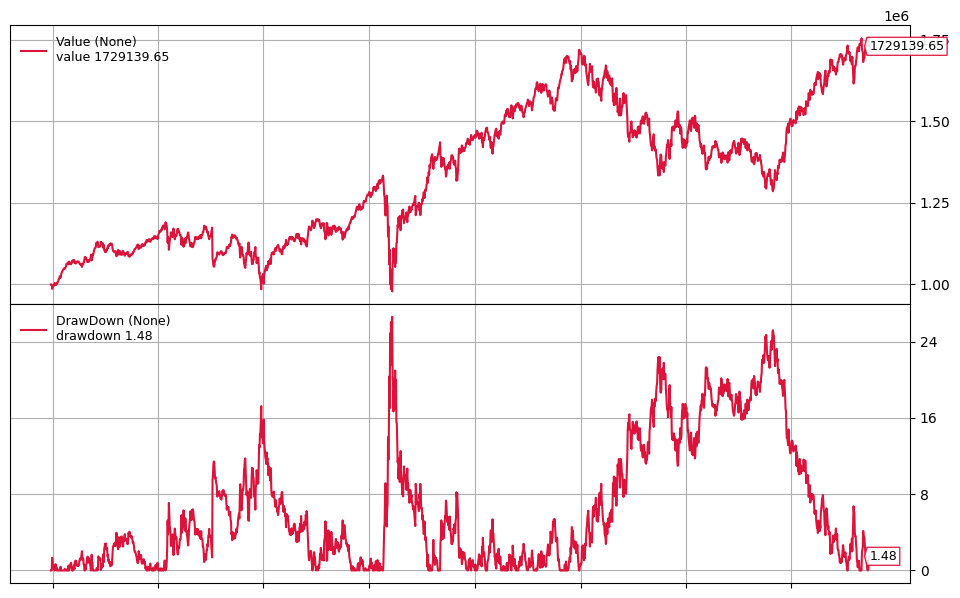

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Strategy': 'MV',
  'Max DrawDown': 0.2659529105742697,
  'CAGR': 0.0480936561283742,
  'Sharpe Ratio': 0.46532738579611116}]

           Date       MV
0    2013-01-02  0.0000%
1    2013-01-03  0.0000%
2    2013-01-04  0.0000%
3    2013-01-07  0.0000%
4    2013-01-08  0.0000%
...         ...      ...
2950 2024-09-23  0.1074%
2951 2024-09-24 -0.1280%
2952 2024-09-25 -0.7014%
2953 2024-09-26 -0.6589%
2954 2024-09-27  0.3195%

[2955 rows x 2 columns]


weights
Industry                       
Basic Materials         0.0000%
Bond                    2.0890%
Communication Services  0.0000%
Consumer Cyclical       0.0000%
Consumer Defensive     20.0000%
Energy                 20.0000%
Financial Services     17.9110%
Healthcare             20.0000%
Industrials             0.0000%
Technology             20.0000%

[<backtrader.feeds.pandafeed.PandasData object at 0x7feb101235d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b50550>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb002f66d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb0075de50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb101ea610>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb006da7d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b6c790>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b5c290>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae05a9890>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b754d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb00386c50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07763d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07769d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073e1d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073c890>, <backtrad

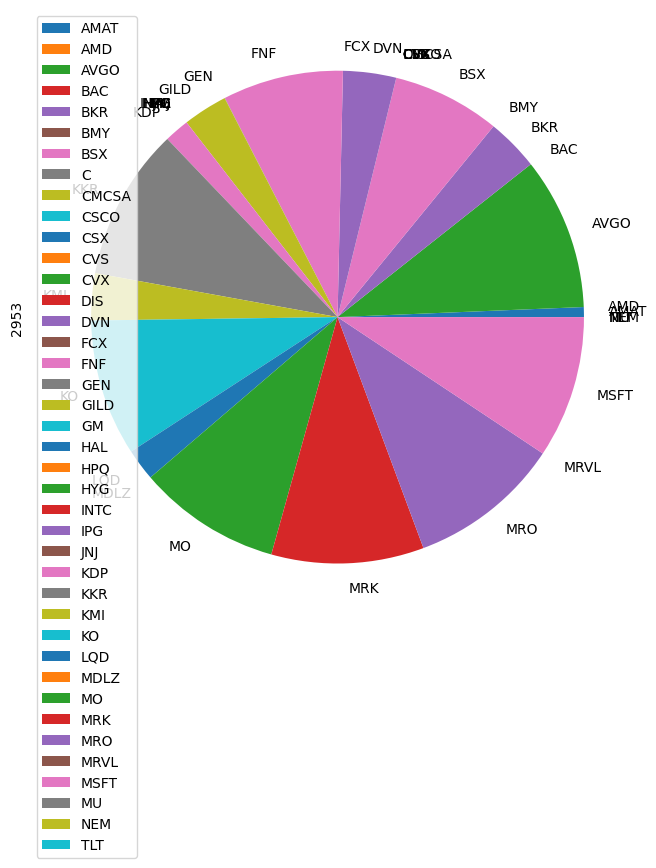

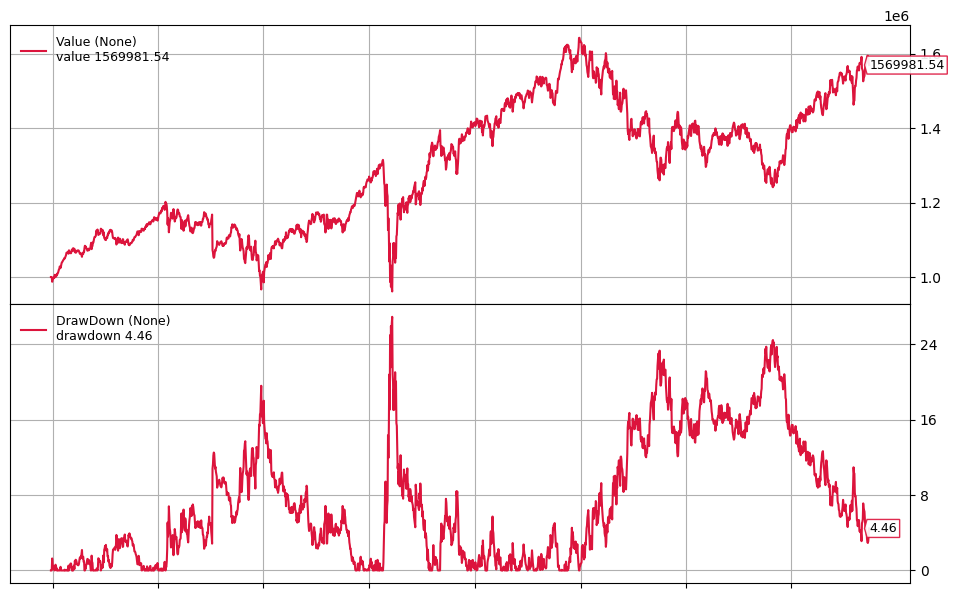

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Strategy': 'MV',
  'Max DrawDown': 0.2659529105742697,
  'CAGR': 0.0480936561283742,
  'Sharpe Ratio': 0.46532738579611116},
 {'Strategy': 'MAD',
  'Max DrawDown': 0.26909339194841875,
  'CAGR': 0.03948941501811751,
  'Sharpe Ratio': 0.3889718494317125}]

           Date      MAD
0    2013-01-02  0.0000%
1    2013-01-03  0.0000%
2    2013-01-04  0.0000%
3    2013-01-07  0.0000%
4    2013-01-08  0.0000%
...         ...      ...
2950 2024-09-23  0.0825%
2951 2024-09-24 -0.2001%
2952 2024-09-25 -0.6337%
2953 2024-09-26 -0.7606%
2954 2024-09-27  0.3092%

[2955 rows x 2 columns]


weights
Industry                       
Basic Materials         0.0000%
Bond                    2.8936%
Communication Services  0.0000%
Consumer Cyclical       0.0000%
Consumer Defensive     20.0000%
Energy                 19.2784%
Financial Services     17.8281%
Healthcare             20.0000%
Industrials             0.0000%
Technology             20.0000%

[<backtrader.feeds.pandafeed.PandasData object at 0x7feb101235d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b50550>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb002f66d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb0075de50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb101ea610>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb006da7d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b6c790>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b5c290>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae05a9890>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b754d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb00386c50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07763d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07769d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073e1d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073c890>, <backtrad

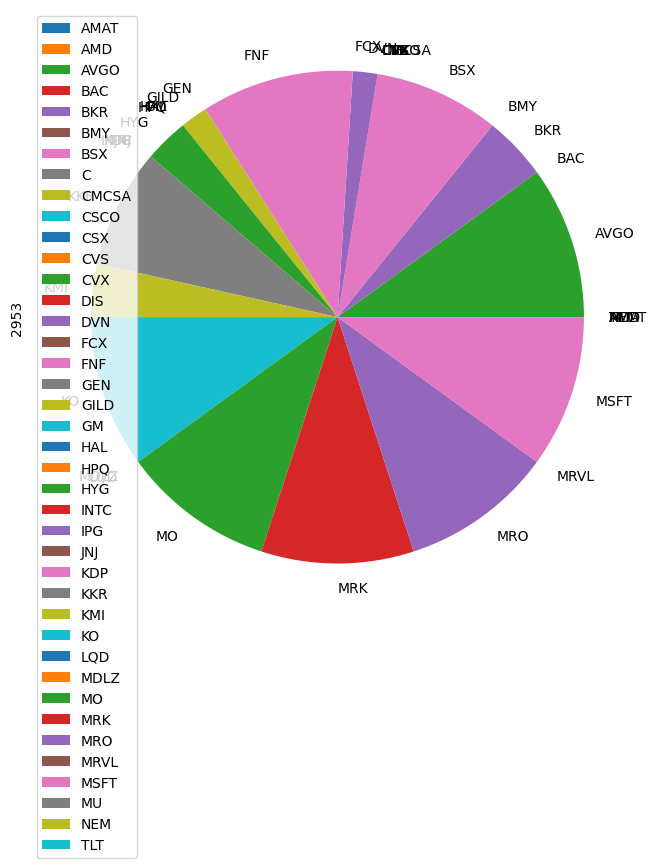

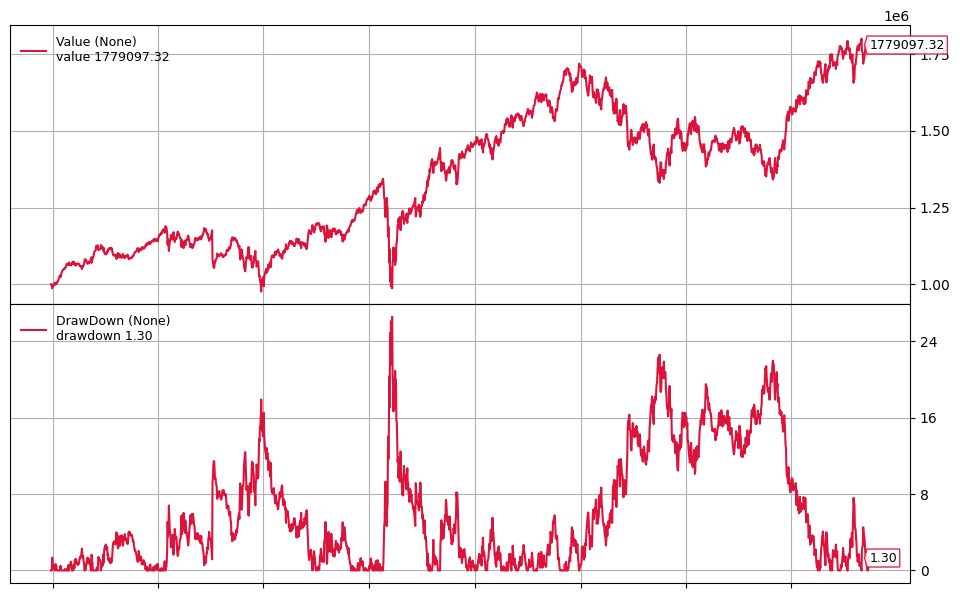

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Strategy': 'MV',
  'Max DrawDown': 0.2659529105742697,
  'CAGR': 0.0480936561283742,
  'Sharpe Ratio': 0.46532738579611116},
 {'Strategy': 'MAD',
  'Max DrawDown': 0.26909339194841875,
  'CAGR': 0.03948941501811751,
  'Sharpe Ratio': 0.3889718494317125},
 {'Strategy': 'MSV',
  'Max DrawDown': 0.2655041346234348,
  'CAGR': 0.05064819847899235,
  'Sharpe Ratio': 0.4852196077898233}]

           Date      MSV
0    2013-01-02  0.0000%
1    2013-01-03  0.0000%
2    2013-01-04  0.0000%
3    2013-01-07  0.0000%
4    2013-01-08  0.0000%
...         ...      ...
2950 2024-09-23  0.1085%
2951 2024-09-24 -0.1197%
2952 2024-09-25 -0.6828%
2953 2024-09-26 -0.5061%
2954 2024-09-27  0.3259%

[2955 rows x 2 columns]


weights
Industry                       
Basic Materials         0.0000%
Bond                    4.7717%
Communication Services  0.0000%
Consumer Cyclical       0.0000%
Consumer Defensive     20.0000%
Energy                 19.8948%
Financial Services     15.3334%
Healthcare             20.0000%
Industrials             0.0000%
Technology             20.0000%

[<backtrader.feeds.pandafeed.PandasData object at 0x7feb101235d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b50550>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb002f66d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb0075de50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb101ea610>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb006da7d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b6c790>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b5c290>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae05a9890>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b754d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb00386c50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07763d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07769d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073e1d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073c890>, <backtrad

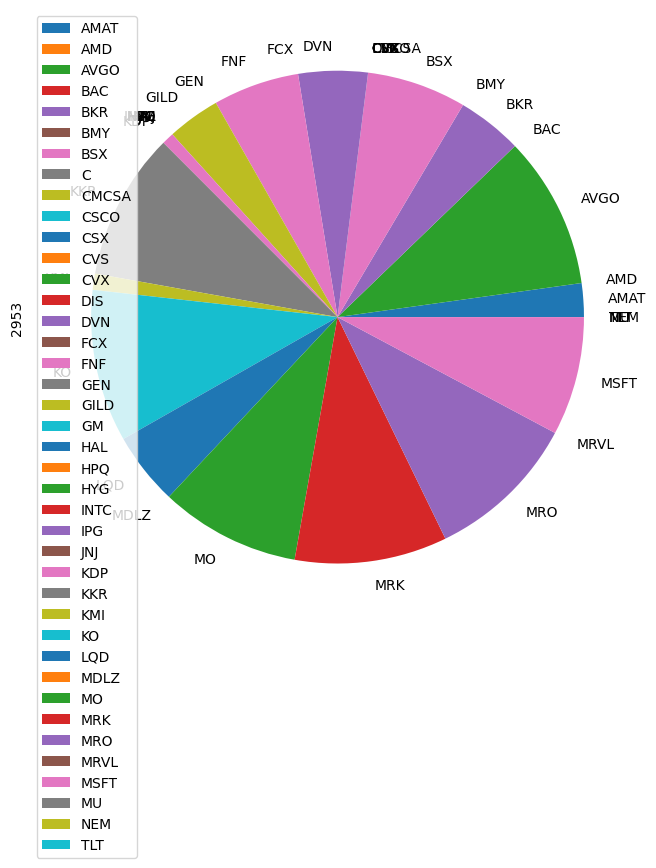

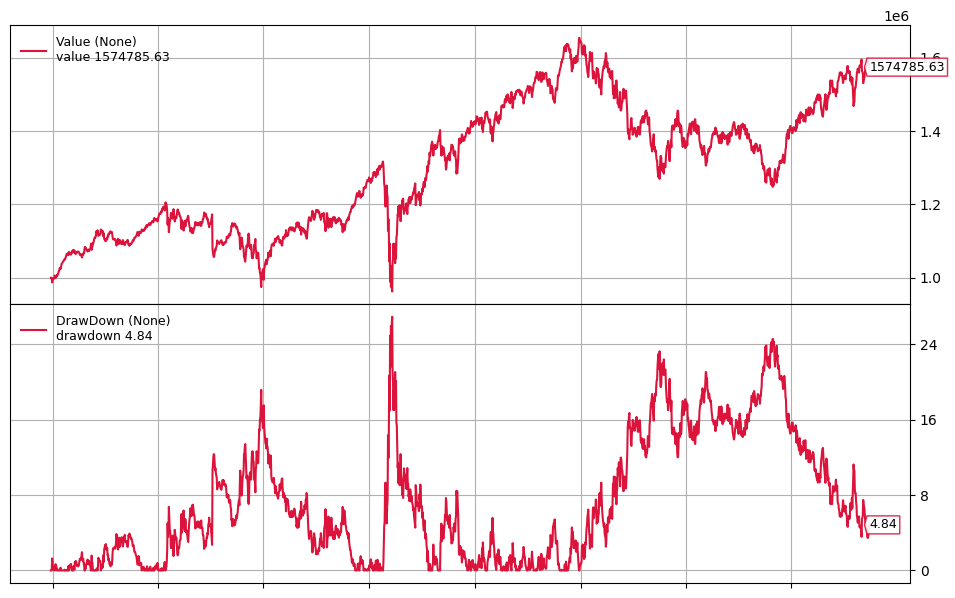

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Strategy': 'MV',
  'Max DrawDown': 0.2659529105742697,
  'CAGR': 0.0480936561283742,
  'Sharpe Ratio': 0.46532738579611116},
 {'Strategy': 'MAD',
  'Max DrawDown': 0.26909339194841875,
  'CAGR': 0.03948941501811751,
  'Sharpe Ratio': 0.3889718494317125},
 {'Strategy': 'MSV',
  'Max DrawDown': 0.2655041346234348,
  'CAGR': 0.05064819847899235,
  'Sharpe Ratio': 0.4852196077898233},
 {'Strategy': 'FLPM',
  'Max DrawDown': 0.269230158964334,
  'CAGR': 0.03965196054103542,
  'Sharpe Ratio': 0.3945570428586819}]

           Date     FLPM
0    2013-01-02  0.0000%
1    2013-01-03  0.0000%
2    2013-01-04  0.0000%
3    2013-01-07  0.0000%
4    2013-01-08  0.0000%
...         ...      ...
2950 2024-09-23  0.0696%
2951 2024-09-24 -0.1810%
2952 2024-09-25 -0.5848%
2953 2024-09-26 -0.6813%
2954 2024-09-27  0.1867%

[2955 rows x 2 columns]


weights
Industry                       
Basic Materials         0.0000%
Bond                    4.7452%
Communication Services  0.0000%
Consumer Cyclical       0.0000%
Consumer Defensive     20.0000%
Energy                 20.0000%
Financial Services     15.2548%
Healthcare             20.0000%
Industrials             0.0000%
Technology             20.0000%

[<backtrader.feeds.pandafeed.PandasData object at 0x7feb101235d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b50550>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb002f66d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb0075de50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb101ea610>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb006da7d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b6c790>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b5c290>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae05a9890>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b754d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb00386c50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07763d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07769d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073e1d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073c890>, <backtrad

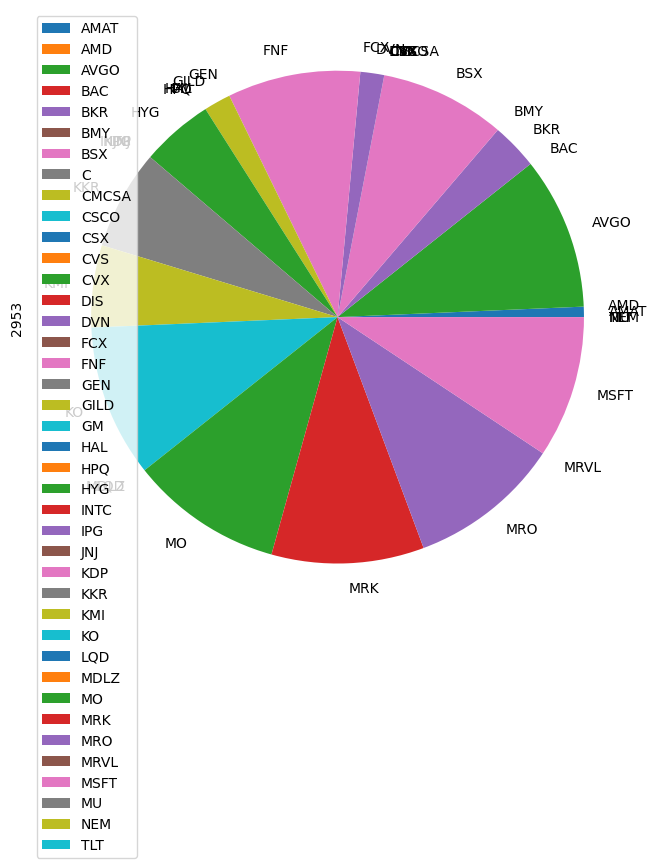

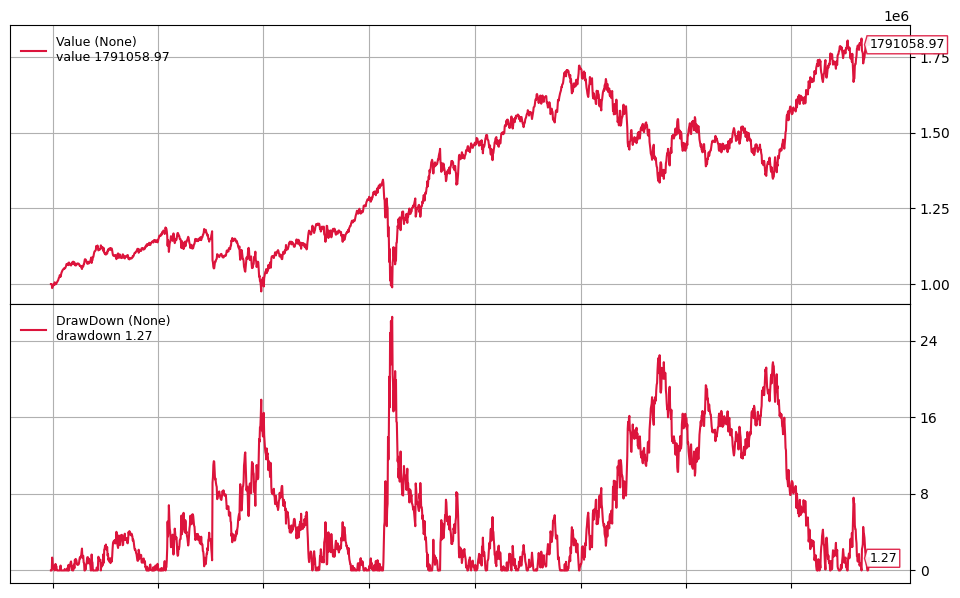

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Strategy': 'MV',
  'Max DrawDown': 0.2659529105742697,
  'CAGR': 0.0480936561283742,
  'Sharpe Ratio': 0.46532738579611116},
 {'Strategy': 'MAD',
  'Max DrawDown': 0.26909339194841875,
  'CAGR': 0.03948941501811751,
  'Sharpe Ratio': 0.3889718494317125},
 {'Strategy': 'MSV',
  'Max DrawDown': 0.2655041346234348,
  'CAGR': 0.05064819847899235,
  'Sharpe Ratio': 0.4852196077898233},
 {'Strategy': 'FLPM',
  'Max DrawDown': 0.269230158964334,
  'CAGR': 0.03965196054103542,
  'Sharpe Ratio': 0.3945570428586819},
 {'Strategy': 'SLPM',
  'Max DrawDown': 0.2647422524810967,
  'CAGR': 0.051247392922325614,
  'Sharpe Ratio': 0.4898312969975878}]

           Date     SLPM
0    2013-01-02  0.0000%
1    2013-01-03  0.0000%
2    2013-01-04  0.0000%
3    2013-01-07  0.0000%
4    2013-01-08  0.0000%
...         ...      ...
2950 2024-09-23  0.1140%
2951 2024-09-24 -0.1059%
2952 2024-09-25 -0.6952%
2953 2024-09-26 -0.4735%
2954 2024-09-27  0.3243%

[2955 rows x 2 columns]


weights
Industry                       
Basic Materials         0.0000%
Bond                    5.6475%
Communication Services  0.0000%
Consumer Cyclical       0.0000%
Consumer Defensive     20.0000%
Energy                 19.6032%
Financial Services     14.9913%
Healthcare             20.0000%
Industrials             0.0000%
Technology             19.7580%

[<backtrader.feeds.pandafeed.PandasData object at 0x7feb101235d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b50550>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb002f66d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb0075de50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb101ea610>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb006da7d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b6c790>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b5c290>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae05a9890>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b754d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb00386c50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07763d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07769d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073e1d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073c890>, <backtrad

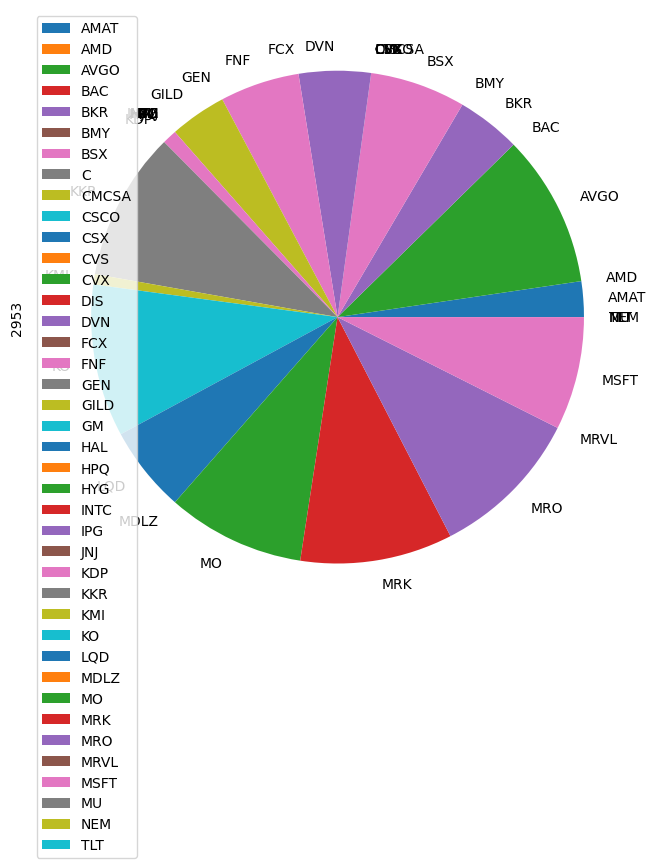

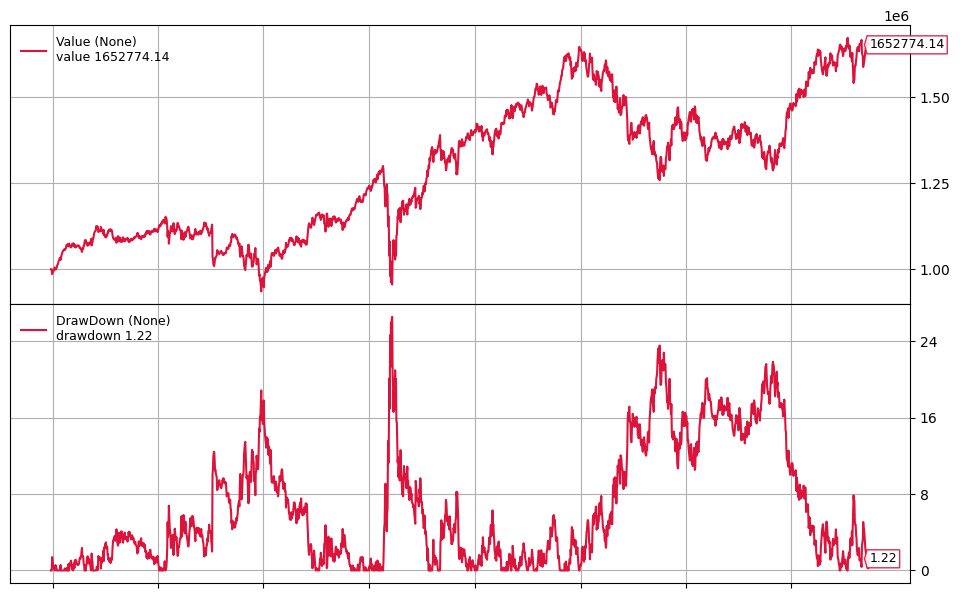

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Strategy': 'MV',
  'Max DrawDown': 0.2659529105742697,
  'CAGR': 0.0480936561283742,
  'Sharpe Ratio': 0.46532738579611116},
 {'Strategy': 'MAD',
  'Max DrawDown': 0.26909339194841875,
  'CAGR': 0.03948941501811751,
  'Sharpe Ratio': 0.3889718494317125},
 {'Strategy': 'MSV',
  'Max DrawDown': 0.2655041346234348,
  'CAGR': 0.05064819847899235,
  'Sharpe Ratio': 0.4852196077898233},
 {'Strategy': 'FLPM',
  'Max DrawDown': 0.269230158964334,
  'CAGR': 0.03965196054103542,
  'Sharpe Ratio': 0.3945570428586819},
 {'Strategy': 'SLPM',
  'Max DrawDown': 0.2647422524810967,
  'CAGR': 0.051247392922325614,
  'Sharpe Ratio': 0.4898312969975878},
 {'Strategy': 'CVaR',
  'Max DrawDown': 0.26541610279655553,
  'CAGR': 0.044082802848653575,
  'Sharpe Ratio': 0.4271926769805677}]

           Date     CVaR
0    2013-01-02  0.0000%
1    2013-01-03  0.0000%
2    2013-01-04  0.0000%
3    2013-01-07  0.0000%
4    2013-01-08  0.0000%
...         ...      ...
2950 2024-09-23  0.1459%
2951 2024-09-24  0.0236%
2952 2024-09-25 -0.8464%
2953 2024-09-26 -0.1616%
2954 2024-09-27  0.3404%

[2955 rows x 2 columns]


weights
Industry                       
Basic Materials         0.0000%
Bond                   10.0000%
Communication Services  0.0000%
Consumer Cyclical       0.0000%
Consumer Defensive     20.0000%
Energy                 20.0000%
Financial Services     13.5182%
Healthcare             20.0000%
Industrials             0.0000%
Technology             16.4818%

[<backtrader.feeds.pandafeed.PandasData object at 0x7feb101235d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b50550>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb002f66d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb0075de50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb101ea610>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb006da7d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b6c790>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b5c290>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae05a9890>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b754d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb00386c50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07763d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07769d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073e1d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073c890>, <backtrad

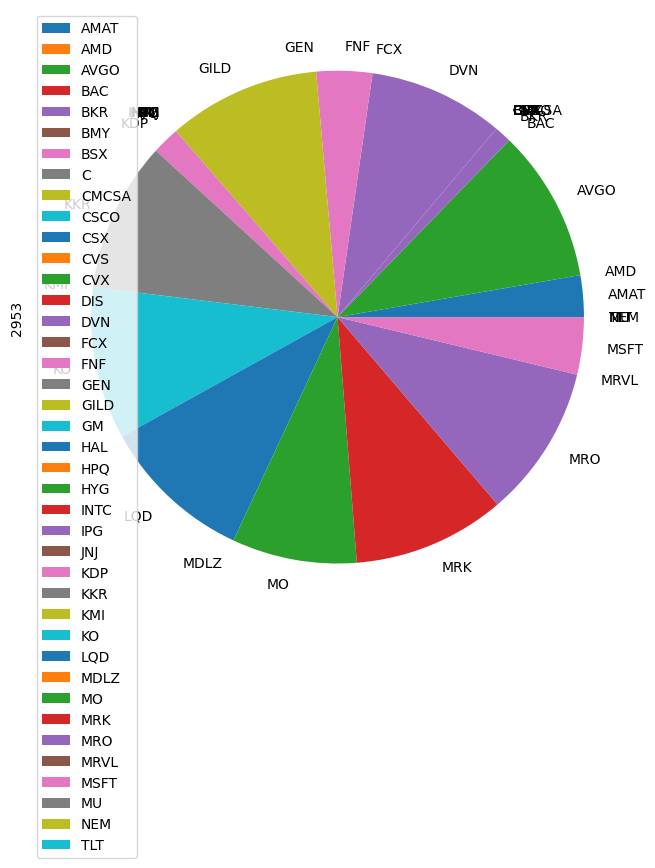

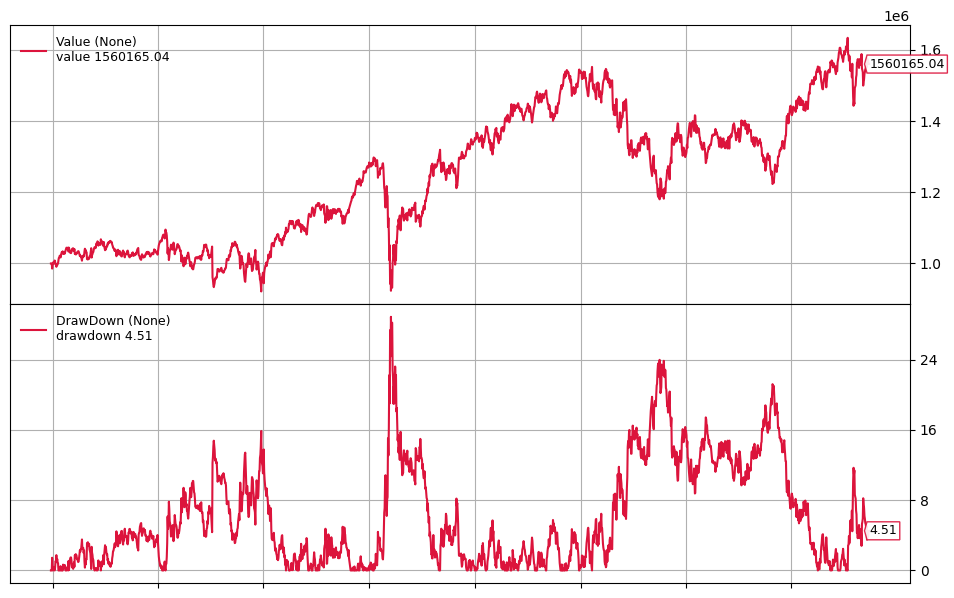

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Strategy': 'MV',
  'Max DrawDown': 0.2659529105742697,
  'CAGR': 0.0480936561283742,
  'Sharpe Ratio': 0.46532738579611116},
 {'Strategy': 'MAD',
  'Max DrawDown': 0.26909339194841875,
  'CAGR': 0.03948941501811751,
  'Sharpe Ratio': 0.3889718494317125},
 {'Strategy': 'MSV',
  'Max DrawDown': 0.2655041346234348,
  'CAGR': 0.05064819847899235,
  'Sharpe Ratio': 0.4852196077898233},
 {'Strategy': 'FLPM',
  'Max DrawDown': 0.269230158964334,
  'CAGR': 0.03965196054103542,
  'Sharpe Ratio': 0.3945570428586819},
 {'Strategy': 'SLPM',
  'Max DrawDown': 0.2647422524810967,
  'CAGR': 0.051247392922325614,
  'Sharpe Ratio': 0.4898312969975878},
 {'Strategy': 'CVaR',
  'Max DrawDown': 0.26541610279655553,
  'CAGR': 0.044082802848653575,
  'Sharpe Ratio': 0.4271926769805677},
 {'Strategy': 'WR',
  'Max DrawDown': 0.2885990304005377,
  'CAGR': 0.038258029306184015,
  '

           Date       WR
0    2013-01-02  0.0000%
1    2013-01-03  0.0000%
2    2013-01-04  0.0000%
3    2013-01-07  0.0000%
4    2013-01-08  0.0000%
...         ...      ...
2950 2024-09-23 -0.1138%
2951 2024-09-24 -0.1459%
2952 2024-09-25 -0.6340%
2953 2024-09-26  0.0039%
2954 2024-09-27 -0.4529%

[2955 rows x 2 columns]


weights
Industry                       
Basic Materials         0.0000%
Bond                    0.0000%
Communication Services  5.0408%
Consumer Cyclical       0.0000%
Consumer Defensive     15.5664%
Energy                 20.0000%
Financial Services     19.3929%
Healthcare             20.0000%
Industrials             0.0000%
Technology             20.0000%

[<backtrader.feeds.pandafeed.PandasData object at 0x7feb101235d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b50550>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb002f66d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb0075de50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb101ea610>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb006da7d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b6c790>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b5c290>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae05a9890>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b754d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb00386c50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07763d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07769d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073e1d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073c890>, <backtrad

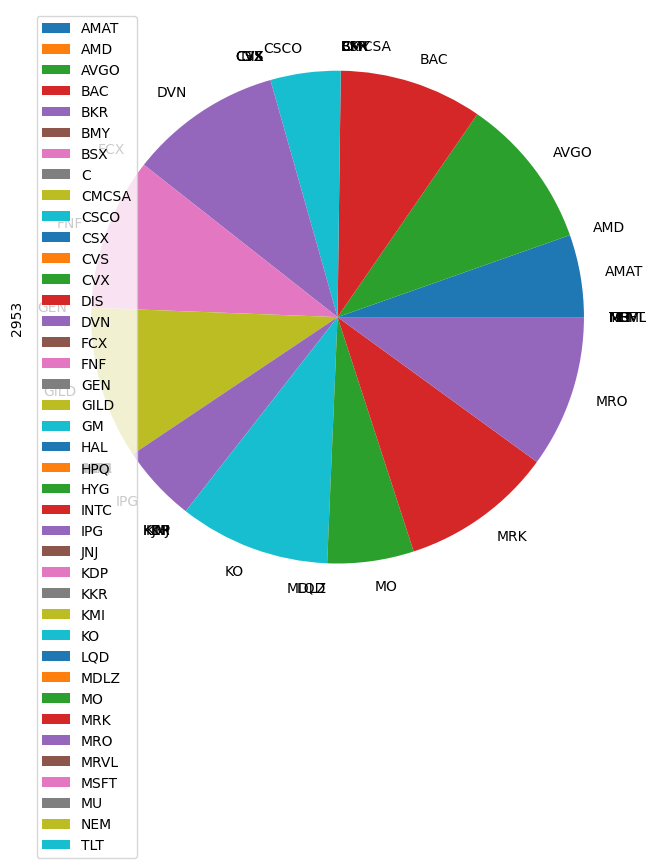

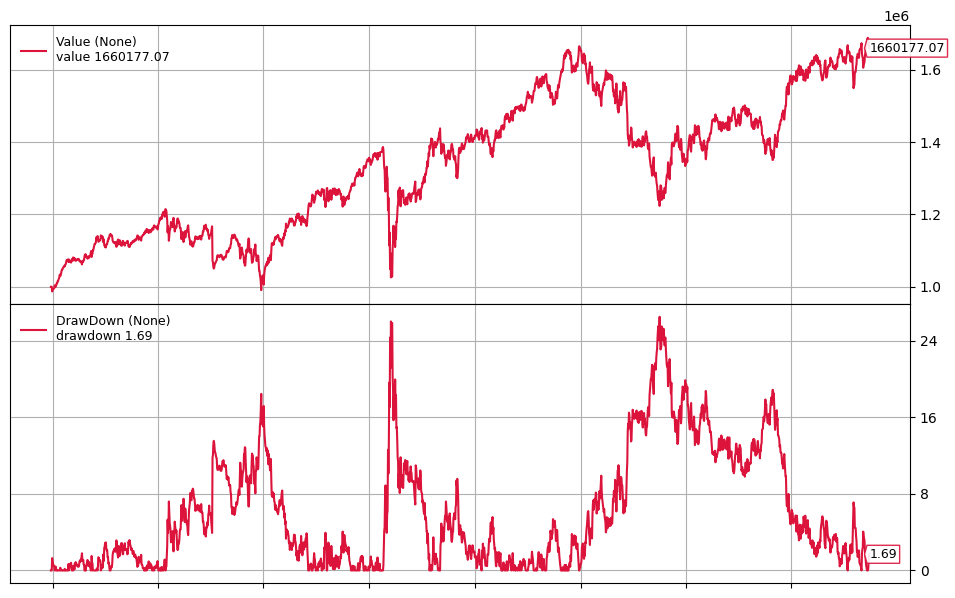

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Strategy': 'MV',
  'Max DrawDown': 0.2659529105742697,
  'CAGR': 0.0480936561283742,
  'Sharpe Ratio': 0.46532738579611116},
 {'Strategy': 'MAD',
  'Max DrawDown': 0.26909339194841875,
  'CAGR': 0.03948941501811751,
  'Sharpe Ratio': 0.3889718494317125},
 {'Strategy': 'MSV',
  'Max DrawDown': 0.2655041346234348,
  'CAGR': 0.05064819847899235,
  'Sharpe Ratio': 0.4852196077898233},
 {'Strategy': 'FLPM',
  'Max DrawDown': 0.269230158964334,
  'CAGR': 0.03965196054103542,
  'Sharpe Ratio': 0.3945570428586819},
 {'Strategy': 'SLPM',
  'Max DrawDown': 0.2647422524810967,
  'CAGR': 0.051247392922325614,
  'Sharpe Ratio': 0.4898312969975878},
 {'Strategy': 'CVaR',
  'Max DrawDown': 0.26541610279655553,
  'CAGR': 0.044082802848653575,
  'Sharpe Ratio': 0.4271926769805677},
 {'Strategy': 'WR',
  'Max DrawDown': 0.2885990304005377,
  'CAGR': 0.038258029306184015,
  '

           Date      MDD
0    2013-01-02  0.0000%
1    2013-01-03  0.0000%
2    2013-01-04  0.0000%
3    2013-01-07  0.0000%
4    2013-01-08  0.0000%
...         ...      ...
2950 2024-09-23  0.1051%
2951 2024-09-24 -0.1793%
2952 2024-09-25 -0.9328%
2953 2024-09-26 -0.5855%
2954 2024-09-27  0.2466%

[2955 rows x 2 columns]


weights
Industry                       
Basic Materials         0.0000%
Bond                    2.2120%
Communication Services  1.7709%
Consumer Cyclical       0.0000%
Consumer Defensive     20.0000%
Energy                 20.0000%
Financial Services     16.0170%
Healthcare             20.0000%
Industrials             0.0000%
Technology             20.0000%

[<backtrader.feeds.pandafeed.PandasData object at 0x7feb101235d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b50550>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb002f66d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb0075de50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb101ea610>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb006da7d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b6c790>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b5c290>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae05a9890>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b754d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb00386c50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07763d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07769d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073e1d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073c890>, <backtrad

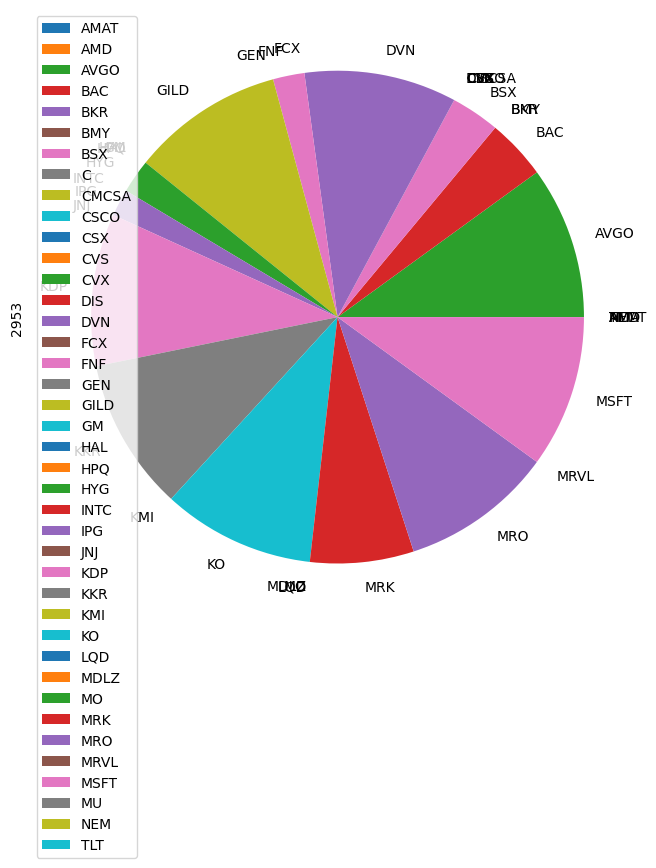

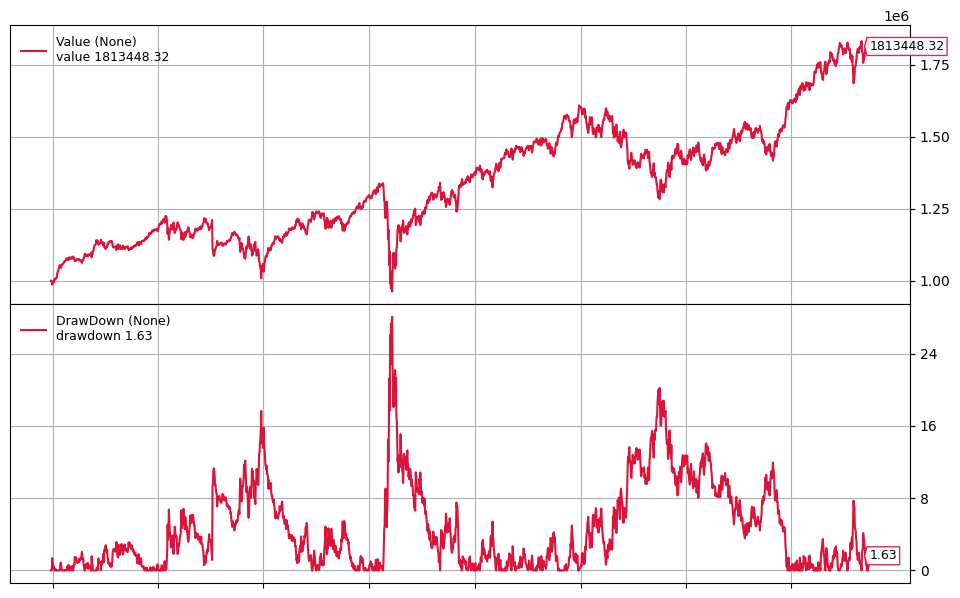

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Strategy': 'MV',
  'Max DrawDown': 0.2659529105742697,
  'CAGR': 0.0480936561283742,
  'Sharpe Ratio': 0.46532738579611116},
 {'Strategy': 'MAD',
  'Max DrawDown': 0.26909339194841875,
  'CAGR': 0.03948941501811751,
  'Sharpe Ratio': 0.3889718494317125},
 {'Strategy': 'MSV',
  'Max DrawDown': 0.2655041346234348,
  'CAGR': 0.05064819847899235,
  'Sharpe Ratio': 0.4852196077898233},
 {'Strategy': 'FLPM',
  'Max DrawDown': 0.269230158964334,
  'CAGR': 0.03965196054103542,
  'Sharpe Ratio': 0.3945570428586819},
 {'Strategy': 'SLPM',
  'Max DrawDown': 0.2647422524810967,
  'CAGR': 0.051247392922325614,
  'Sharpe Ratio': 0.4898312969975878},
 {'Strategy': 'CVaR',
  'Max DrawDown': 0.26541610279655553,
  'CAGR': 0.044082802848653575,
  'Sharpe Ratio': 0.4271926769805677},
 {'Strategy': 'WR',
  'Max DrawDown': 0.2885990304005377,
  'CAGR': 0.038258029306184015,
  '

           Date      ADD
0    2013-01-02  0.0000%
1    2013-01-03  0.0000%
2    2013-01-04  0.0000%
3    2013-01-07  0.0000%
4    2013-01-08  0.0000%
...         ...      ...
2950 2024-09-23  0.1040%
2951 2024-09-24 -0.2912%
2952 2024-09-25 -0.6372%
2953 2024-09-26 -0.7055%
2954 2024-09-27  0.1509%

[2955 rows x 2 columns]


weights
Industry                       
Basic Materials         0.0000%
Bond                   10.0000%
Communication Services  0.0000%
Consumer Cyclical       0.0000%
Consumer Defensive     20.0000%
Energy                 20.0000%
Financial Services     10.0000%
Healthcare             20.0000%
Industrials             0.0000%
Technology             20.0000%

[<backtrader.feeds.pandafeed.PandasData object at 0x7feb101235d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b50550>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb002f66d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb0075de50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb101ea610>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb006da7d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b6c790>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b5c290>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae05a9890>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb11b754d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feb00386c50>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07763d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae07769d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073e1d0>, <backtrader.feeds.pandafeed.PandasData object at 0x7feae073c890>, <backtrad

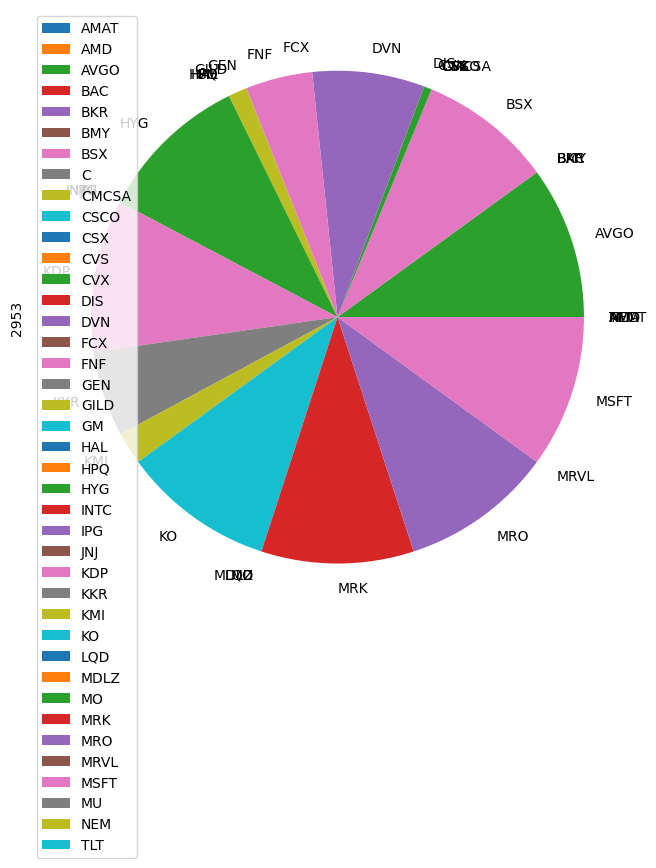

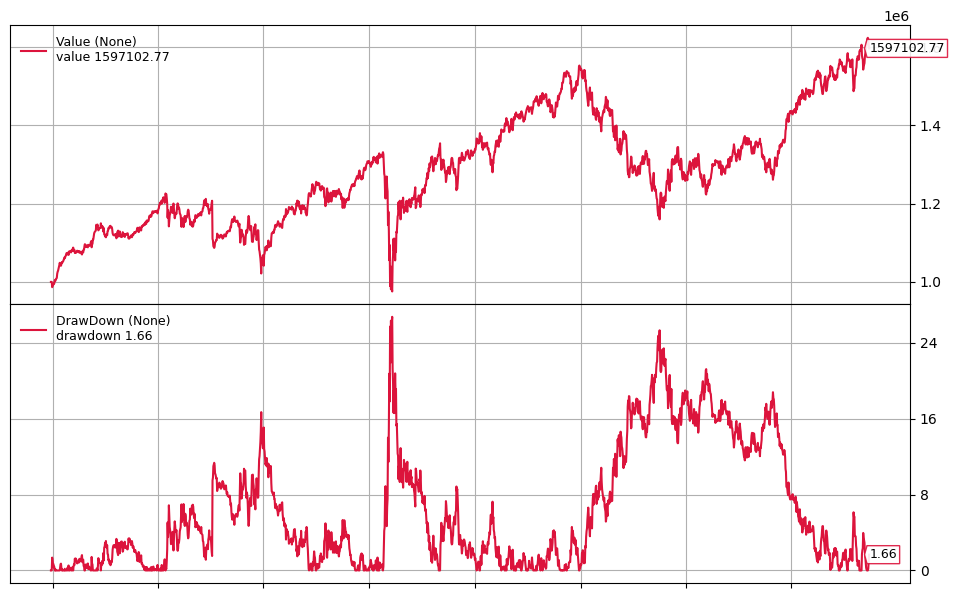

[{'Strategy': 'SPY',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Strategy': 'MV',
  'Max DrawDown': 0.2659529105742697,
  'CAGR': 0.0480936561283742,
  'Sharpe Ratio': 0.46532738579611116},
 {'Strategy': 'MAD',
  'Max DrawDown': 0.26909339194841875,
  'CAGR': 0.03948941501811751,
  'Sharpe Ratio': 0.3889718494317125},
 {'Strategy': 'MSV',
  'Max DrawDown': 0.2655041346234348,
  'CAGR': 0.05064819847899235,
  'Sharpe Ratio': 0.4852196077898233},
 {'Strategy': 'FLPM',
  'Max DrawDown': 0.269230158964334,
  'CAGR': 0.03965196054103542,
  'Sharpe Ratio': 0.3945570428586819},
 {'Strategy': 'SLPM',
  'Max DrawDown': 0.2647422524810967,
  'CAGR': 0.051247392922325614,
  'Sharpe Ratio': 0.4898312969975878},
 {'Strategy': 'CVaR',
  'Max DrawDown': 0.26541610279655553,
  'CAGR': 0.044082802848653575,
  'Sharpe Ratio': 0.4271926769805677},
 {'Strategy': 'WR',
  'Max DrawDown': 0.2885990304005377,
  'CAGR': 0.038258029306184015,
  '

           Date     CDaR
0    2013-01-02  0.0000%
1    2013-01-03  0.0000%
2    2013-01-04  0.0000%
3    2013-01-07  0.0000%
4    2013-01-08  0.0000%
...         ...      ...
2950 2024-09-23  0.1062%
2951 2024-09-24 -0.1902%
2952 2024-09-25 -0.8492%
2953 2024-09-26 -0.6324%
2954 2024-09-27  0.3851%

[2955 rows x 2 columns]


weights
Industry                       
Basic Materials         0.0000%
Bond                    7.2880%
Communication Services  0.0133%
Consumer Cyclical       0.0000%
Consumer Defensive     20.0000%
Energy                 19.6479%
Financial Services     13.0507%
Healthcare             20.0000%
Industrials             0.0000%
Technology             20.0000%

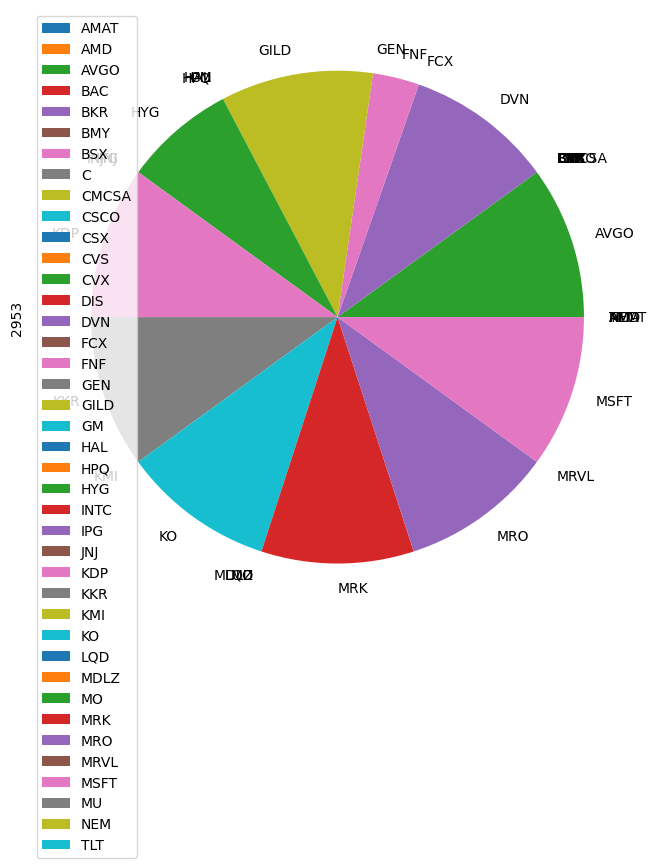

In [27]:
############################################################
# Backtesting All Strategy
############################################################

for j in rms:
    
    assets = returns.columns.tolist()
    weights = models[j]

    result0 = backtest(assets_prices,
                    AssetAllocation,
                    start=start_test,
                    end=end_test,
                    plot=True)
    
    metric_list.append(RetreiveStats(result0, j))
    display(metric_list)

    Dret = RetreiveDailyReturn(result0, j)
    print(Dret)
    Dret.to_csv(f"{j}_ret.csv", index=False)
    
    ############################################################
    # Plotting the composition of the last MV portfolio
    ############################################################

    w = pd.DataFrame(models[j].iloc[-1,:])

    # We need matplotlib >= 3.3.0 to use this function
    #ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
    #                 height=6, width=10, ax=None)

    w.plot.pie(subplots=True, figsize=(8, 8))
    
    ############################################################
    # Composition per Industry
    ############################################################

    w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
    w_classes = w_classes.groupby(['Industry']).sum()
    w_classes.columns = ['weights']
    display(w_classes)

In [28]:
metric_df = pd.DataFrame(metric_list)
display(metric_df)

Strategy  Max DrawDown    CAGR  Sharpe Ratio
0       SPY      34.0194% 8.1418%      60.7480%
1        MV      26.5953% 4.8094%      46.5327%
2       MAD      26.9093% 3.9489%      38.8972%
3       MSV      26.5504% 5.0648%      48.5220%
4      FLPM      26.9230% 3.9652%      39.4557%
5      SLPM      26.4742% 5.1247%      48.9831%
6      CVaR      26.5416% 4.4083%      42.7193%
7        WR      28.8599% 3.8258%      40.0471%
8       MDD      26.5051% 4.4397%      39.5130%
9       ADD      28.0807% 5.2206%      53.1985%
10     CDaR      26.7464% 4.1076%      40.9609%

In [29]:
metric_df.to_csv("Port_Metric.csv", index=False)

In [30]:
for i in models.keys():
    print(i)
    models[i].to_csv(f"model_{i}.csv")

MV
MAD
MSV
FLPM
SLPM
CVaR
WR
MDD
ADD
CDaR
